In [1]:
import networkx as nx
import py_scripts_yann
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy

from pylab import *
from matplotlib2tikz import save as tikz_save

Upgrade to   matplotlib2tikz 0.7.6    available! (installed: 0.6.11)

matplotlib2tikz's API changes in this upgrade. Changes to your code may be necessary.

To upgrade matplotlib2tikz with pip, type

   pip install -U matplotlib2tikz

To upgrade _all_ pip-installed packages, use

   pipdate/pipdate3

To disable these checks, set SecondsBetweenChecks in /mnt/DATA/ysweeney/.config/pipdated/config.ini to -1.


In [5]:
import networkx as nx
import py_scripts_yann
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

res = py_scripts_yann.load_pickle('/home/ysweeney/CNL-brain1/data/topdown_learning/diverse_rates_net_runs/87/broad_tuning_scaling_rate_2e-5_Wmax_5_4_orientatations_4_stimuli_48N_mixed_ind_OU_15_0.pkl')

pos = nx.spring_layout(nx.from_numpy_matrix(corr_coeff>0.1))

corr_coeff_early = numpy.corrcoef(dff[:,:10000])

fig,axes = plt.subplots(1,3,figsize=(24,8))  # image is 8 x 8 inches
axes[0].axis('off')
nx.draw_networkx_nodes(adj_corrs, pos, node_size=100, cmap=plt.cm.RdYlBu, node_color=list(partition_early.values()),vmin=0,vmax=5,ax=axes[0])
nx.draw_networkx_edges(nx.from_numpy_matrix(corr_coeff_early>0.1), pos, alpha=0.2,ax=axes[0])
#nx.draw_networkx_edges(adj_corrs, pos, alpha=0.1)
axes[0].set_title('early recording')
#plt.savefig('early_recording_1.png')
#plt.show(adj_corrs)

corr_coeff_early_2 = numpy.corrcoef(dff[:,10000:15000])

#pos = nx.spring_layout(nx.from_numpy_matrix(corr_coeff_late>0.25),pos=pos)

#plt.figure(figsize=(8, 8))  # image is 8 x 8 inches
axes[1].axis('off')
nx.draw_networkx_nodes(adj_corrs, pos, node_size=100, cmap=plt.cm.RdYlBu, node_color=list(partition_early_2_consolidated.values()),vmin=0,vmax=5,ax=axes[1])
nx.draw_networkx_edges(nx.from_numpy_matrix(corr_coeff_early_2>0.1), pos, alpha=0.2,ax=axes[1])
#nx.draw_networkx_edges(adj_corrs, pos, alpha=0.2)
axes[1].set_title('middle recording')
#plt.show(adj_corrs)
#plt.savefig('early_recording_2.png')

corr_coeff_laye = numpy.corrcoef(dff[:,-10000:])

#plt.figure(figsize=(8, 8))  # image is 8 x 8 inches
axes[2].axis('off')
nx.draw_networkx_nodes(adj_corrs, pos, node_size=100, cmap=plt.cm.RdYlBu, node_color=list(partition_late_consolidated.values()),vmin=0,vmax=5,ax=axes[2])
nx.draw_networkx_edges(nx.from_numpy_matrix(corr_coeff_late>0.1), pos, alpha=0.2,ax=axes[2])
#nx.draw_networkx_edges(adj_corrs, pos, alpha=0.2)
axes[2].set_title('late recording')
#plt.show(adj_corrs)

plt.savefig('ensemble_evolution.png')


IOError: [Errno 2] No such file or directory: '/home/ysweeney/CNL-brain1/data/topdown_learning/diverse_rates_net_runs/87/broad_tuning_scaling_rate_2e-5_Wmax_5_4_orientatations_4_stimuli_48N_mixed_ind_OU_15_0.pkl'

KeyError: 0

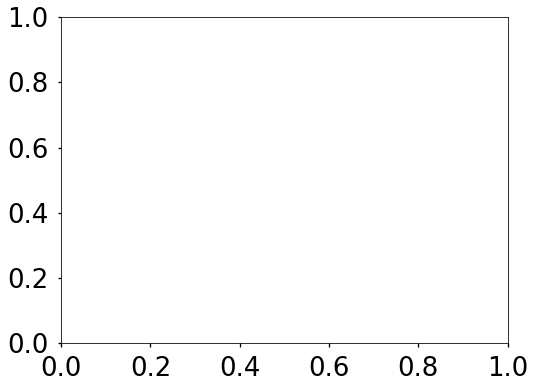

In [12]:
save_fig=False

sns.set_context('talk',font_scale=2.0)

f, ax = plt.subplots(figsize=(8, 6))

plt.pcolor(res[0]['W_rec_plastic'],cmap='OrRd')
ax_pc = plt.colorbar()

ax.set_ylabel('presynaptic neuron ID')
ax.set_xlabel('postsynaptic neuron ID')
ax.set_xticks([])
ax.set_yticks([])

ax_pc.set_ticks([0.0,0.02,0.04])

sns.set_style(style='white')


if save_fig:
    tikz_save('manuscript/figures/W_plastic_2rates.tex',
           figureheight = '\\figureheight',
           figurewidth = '\\figurewidth')
    plt.savefig('manuscript/figures/W_plastic_2rates_OrRd.png')

In [3]:
%matplotlib inline

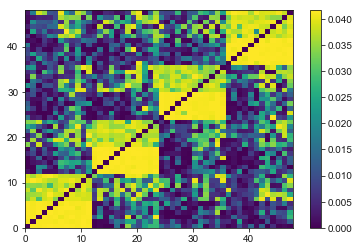

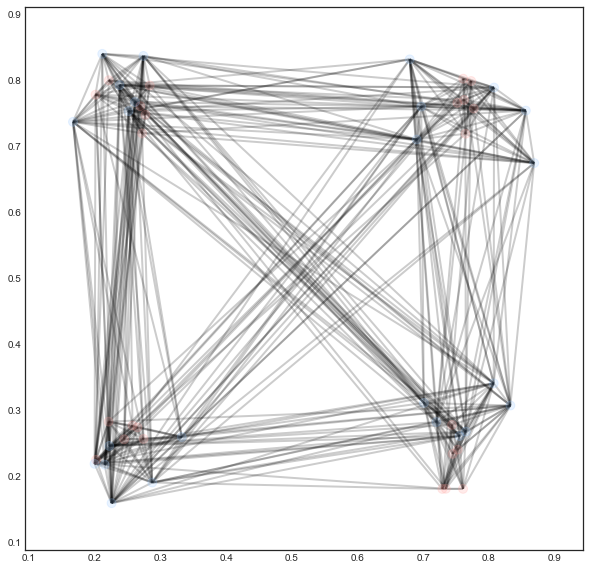

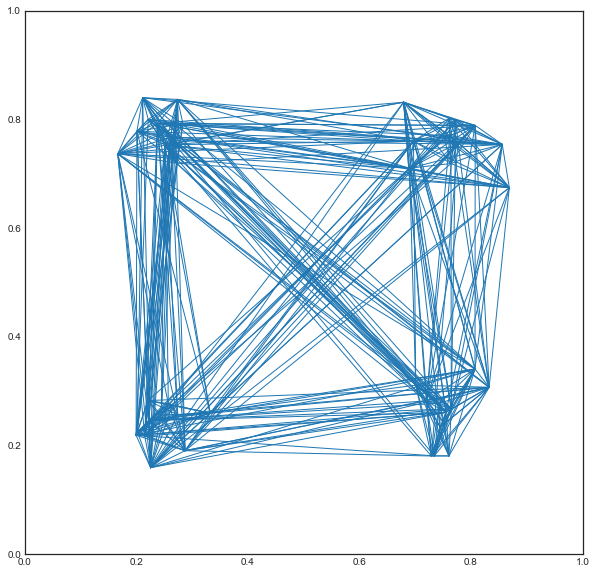

In [46]:
plt.pcolor(res[0]['W_rec_plastic'])
plt.colorbar()

sns.set_style(style='white')

W = res[0]['W_rec_plastic']

#pos = nx.spring_layout(nx.from_numpy_matrix(W>0.02))

N = W.shape[0]
N_orientations = len(res[0]['sim_pars']['phi_stimuli'])
pos = []
delta_x = 0.025

W = np.array(W>0.03)

edges,weights = zip(*nx.get_edge_attributes(nx.from_numpy_matrix(W),'weight').items())

com_list = [(.25,.25),(0.25,0.75),(0.75,0.75),(0.75,0.25)]

#com_list = [(.25,.25),(0.35,0.35),(0.25,0.75),(0.35,0.65),(0.75,0.75),(0.65,0.65),(0.75,0.25),(0.65,0.35)]

node_color=['r','r','r','r','r','r','b','b','b','b','b','b']
            
#for i in xrange(2*N_orientations):
for i in xrange(N_orientations):
    #for j in xrange(int(N/N_orientations)):
    for j in xrange(int(0.5*N/N_orientations)):
        #pos.append(np.array([i*(1./N_orientations)+np.random.random()*delta_x,i*(1./N_orientations)+np.random.random()*delta_x]))
        #pos.append(np.array([com_list[i][0]+np.random.normal(0.0,delta_x),com_list[i][1]+np.random.normal(0.0,delta_x)]))
        pos.append(np.array([com_list[i][0]+np.random.normal(0.0,delta_x),com_list[i][1]+np.random.normal(0.0,delta_x)]))
    for j in xrange(int(0.5*N/N_orientations)): 
        pos.append(np.array([com_list[i][0]+np.random.normal(0.0,2*delta_x),com_list[i][1]+np.random.normal(0.0,2*delta_x)]))

plt.figure(figsize=(10,10))
nx.draw_networkx(nx.from_numpy_matrix(W), node_size=80,pos=pos,with_labels=False,edge_color=weights,width=2.0, edge_cmap=plt.cm.Greys_r,node_color=node_color*4,alpha=0.2)


G = nx.from_numpy_matrix(W)

plt.figure(figsize=(10,10))
ax = plt.gca()
for u,v in G.edges():
    x = [pos[u][0],pos[v][0]]
    y = [pos[u][1],pos[v][1]]
    l = plt.Line2D(x,y,linewidth=1,solid_capstyle='round')
    ax.add_line(l)

#fig,axes = plt.subplots(1,1,figsize=(24,8))  # image is 8 x 8 inches
#axes[0].axis('off')
#nx.draw_networkx_edges(adj_corrs, pos, alpha=0.1)
#axes[0].set_title('early recording')

In [ ]:
import networkx as nx
import numpy as np
import matplotlib as matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import sys, os




'''
Image settings:
'''

'''
    - s_min and s_max set the range of nodes size depending on their final
        degree if VaryNodesSize is True;
    - min_ew max_ew set the minimum and maximum width of the represented edges
        if VaryEdgesSize is True;
'''

VaryNodesSize = True
s_min = 6.
s_max = 12.

VaryEdgesSize = True
min_ew = 2.
max_ew = 8.

'''
    min_d sets the minimum distance of an edge from the circle and
        IT MUST FALLS IN THE (.1, max_d) interval

    max_d sets the maximum distance of an edge from the center of the circle and
        IT MUST FALLS IN THE (min_d, .95) interval
'''
min_d = .15
max_d = .825

FigFileName = 'My_Graph.pdf'  # Where to save the figure and its extension...

##################################################
##################################################

Sources = []
Targets = []
Weights = []

#IFile = sys.argv[1]
#if not os.path.exists(IFile):
#    print 'Please provide an existing file!'
#    print 'Usage:'
#    print 'python2 Plot_Graph.py ../path/to/edge_lists_file.dat'
#    sys.exit()

#if not os.path.isfile(IFile):
#    print 'Please provide a regular file!'
#    print 'Usage:'
#    print 'python2 Plot_Graph.py ../path/to/edge_lists_file.dat'
#    sys.exit()

#try:
#    f = open(IFile, 'r')
#except:
#    print 'Error opening %s file in reading mode!' % IFile

#for i, l in enumerate(f):
#    v = l.strip().split()
#    if len(v) < 2:
#        print 'Error reading input file at line %d' % i
#        print 'Only %d values found while 3 are requested!' % len(v)
#        f.close()
#        sys.exit()#
#
#    Sources.append(v[0])
#    Targets.append(v[1])
#    Weights.append(float(v[2]))
#f.close()
W = 1.0*res[0]['W_rec_plastic']
W[W<0.035] = 0.0
W*=50.0
G = nx.from_numpy_matrix(W)


#for s,t,weight in zip(Sources, Targets, Weights):
#    G.add_edges_from([(s,t)], w=weight)

degrees = [G.degree(n) for n in G.nodes()]
k_max = max(degrees)

# Pos is a dictionary containing the positions of the nodes...
Pos = nx.shell_layout(G)

ew = [G[e[0]][e[1]]['weight'] for e in G.edges()]
w_min = min(ew)
w_max = max(ew)
ec = [plt.cm.Blues(.5 + .45*(float(W)/w_max)) for W in ew]
ec = [plt.cm.Blues(.5 + .45*(float(W)/w_max)) for W in ew]
ec = [G[e[0]][e[1]]['weight'] for e in G.edges()]
ec = ['y' if e[1]%12 > 5 else 'purple' for e in G.edges()]

ns = [s_min*(1 + (s_max-s_min)*k/k_max) for k in degrees]
nc = [plt.cm.Oranges(.75) if k == k_max-1 else plt.cm.Blues(.6)\
      for k in degrees]

nc = [plt.cm.Blues(.75)]*12 + [plt.cm.Oranges(.75)]*12 + [plt.cm.Greens(.75)]*12 + [plt.cm.Reds(.75)]*12

nx.draw(G, edge_color=ec, width=ew, node_color=nc, node_size=80,pos=Pos,alpha=1.0,arrows=True)
plt.gcf().set_size_inches(9,9)


step = 1e-3
center = [.5,.5]
radius = .5

def circle(r, c, theta):
    return np.array([np.cos(theta)*r+c[0], np.sin(theta)*r+c[1]])

radi = np.arange(0,2.*np.pi,step)
Coord = np.array([circle(radius, center, th) for th in radi])
xc = Coord[:,0]
yc = Coord[:,1]


def distanza(p1,p2):
    return np.sqrt(((p1-p2)**2.).sum())

def medio(p1,p2):
    return (p1+p2)/2.

def Vertex(p1,p2,c):
    m = medio(p1,p2)
    direttrice = c-m
    return m+direttrice*(min_d+max_d*(1.-distanza(m,c)/distanza(c,p1)))

def gimme_angle(p,c):
    r = distanza(p,c)
    [dx,dy] = p-c

    if dx == .0:
        if dy > .0:
            return np.pi/2.
        else:
            return np.pi*3./2.
    elif dx>.0:
        if dy>=.0:
            return np.arctan(dy/dx)
        else:
            return 2.*np.pi+np.arctan(dy/dx)
    elif dx<.0:
        return np.pi+np.arctan(dy/dx)



# the center and radius of the circle...
centro = np.array([10.0,10.0])
raggio = 10.0

# minimum (second minimum) distances...
min_ds = sorted([distanza(Pos[G.nodes()[-1]],Pos[n])\
        for n in G.nodes()[:-1]])[1]
min_ds = 10.0

def xy_edge(i,j,c,r):
    i=np.array(i)
    j=np.array(j)
    c=np.array(c)

    m = medio(i,j)
    if distanza(m,c)<25.0:
        x = np.linspace(i[0],j[0],10)
        y = np.linspace(i[1],j[1],10)
        return x,y
    elif distanza(i,j)<min_ds:
        ti = gimme_angle(i,c)
        tj = gimme_angle(j,c)
        if max(ti,tj)-min(ti,tj) > np.pi:
            radi = np.linspace(max(ti,tj)-2.*np.pi,min(ti,tj))
        else:
            radi = np.linspace(min(ti,tj),max(ti,tj))

        return r*np.cos(radi)+c[0],r*np.sin(radi)+c[1]

    Vertice = Vertex(i,j,c)

    a = distanza(Vertice, m)/((distanza(i,j)/2.)**2.)

    yp = np.linspace(-distanza(i,j)/2., distanza(i,j)/2.,100)
    xp = a*(yp**2.)
    xp += distanza(c,Vertice)

    theta_m = gimme_angle(medio(i,j),c)
    xpr = np.cos(theta_m)*xp - np.sin(theta_m)*yp
    ypr = np.sin(theta_m)*xp + np.cos(theta_m)*yp

    xpr += c[0]
    ypr += c[1]

    return xpr,ypr


# Plotting!
plt.figure(figsize=(12,12))
VaryEdgesSize= False
VaryNodesSize= False

edge_weight = lambda w: (w-w_min)/w_max*(max_ew-min_ew) + min_ew
for e in G.edges():
    x,y=xy_edge(10*Pos[e[0]],10*Pos[e[1]],centro,raggio)
    plt.plot(x,y,'-',c=plt.cm.Blues(.9),\
            lw=edge_weight(G[e[0]][e[1]]['weight']) if VaryEdgesSize else min_ew,\
            alpha=.2)

for i, n in enumerate(G.nodes()):
    plt.plot(10*Pos[n][0],10*Pos[n][1],'o', c=nc[i],\
            ms=ns[i] if VaryNodesSize else 15, )

#plt.xlim(-.1,1.1)
#plt.ylim(-.1,1.1)
#plt.axis('off')
#plt.tight_layout()
#plt.savefig(FigFileName, bbox_inches='tight')
#print 'Figure saved in %s' % FigFileName


UnboundLocalError: local variable 'e' referenced before assignment

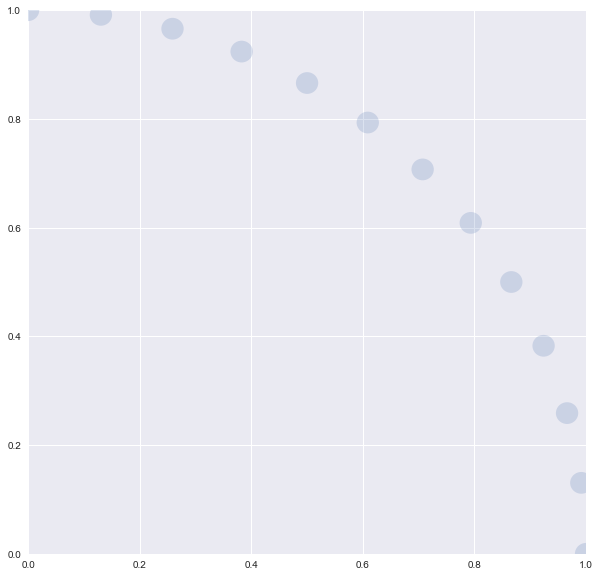

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Circle
import numpy as np

def draw_network(G,pos,ax,sg=None):

    for n in G:
        c=Circle(pos[n],radius=0.02,alpha=0.2)
        ax.add_patch(c)
        G.node[n]['patch']=c
        x,y=pos[n]
    seen={}
    for (u,v,d) in G.edges(data=True):
        n1=G.node[u]['patch']
        n2=G.node[v]['patch']
        rad=0.1
        if (u,v) in seen:
            rad=seen.get((u,v))
            rad=(rad+np.sign(rad)*0.1)*-1
        alpha=0.5
        color='k'

        e = FancyArrowPatch(n1.center,n2.center,patchA=n1,patchB=n2,
                            arrowstyle='-|>',
                            connectionstyle='arc3,rad=%s'%rad,
                            mutation_scale=10.0,
                            lw=2,
                            alpha=alpha,
                            color=color)
        seen[(u,v)]=rad
        ax.add_patch(e)
    return e


#G=nx.from_numpy_matrix(res[0]['W_rec_plastic'])
#W = res[0]['W_rec_plastic']
#W[W<]
G=nx.DiGraph(res[0]['W_rec_plastic']>0.35)


plt.figure(figsize=(10,10))
pos=nx.circular_layout(G)
ax=plt.gca()
draw_network(G,pos,ax)
ax.autoscale()
plt.axis('equal')
plt.axis('off')
plt.show()

In [14]:
W = np.random.binomial(2,0.2,(48,48))
import networkx as nx
import numpy as np
import matplotlib as matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import sys, os




'''
Image settings:
'''

'''
    - s_min and s_max set the range of nodes size depending on their final
        degree if VaryNodesSize is True;
    - min_ew max_ew set the minimum and maximum width of the represented edges
        if VaryEdgesSize is True;
'''

VaryNodesSize = True
s_min = 6.
s_max = 12.

VaryEdgesSize = True
min_ew = 2.
max_ew = 8.

'''
    min_d sets the minimum distance of an edge from the circle and
        IT MUST FALLS IN THE (.1, max_d) interval

    max_d sets the maximum distance of an edge from the center of the circle and
        IT MUST FALLS IN THE (min_d, .95) interval
'''
min_d = .15
max_d = .825


small_pos_keys = []
large_pos_keys = []
for i in xrange(48):
    if i%12>5:
        small_pos_keys.append(i)
    else:
        large_pos_keys.append(i)


        
pos_circ_large = nx.circular_layout(small_pos_keys,scale=0.6)
pos_circ_small = nx.circular_layout(large_pos_keys,scale=1.0)
pos_circ_large.update(pos_circ_small)

W_thresh = 0.038
W = np.ones(W.shape)
W[W<W_thresh] = 0.0
#W*=50.0
G = nx.from_numpy_matrix(W)
#G = nx.from_numpy_matrix(W.transpose(),create_using=nx.DiGraph())


#for s,t,weight in zip(Sources, Targets, Weights):
#    G.add_edges_from([(s,t)], w=weight)

degrees = [G.degree(n) for n in G.nodes()]
k_max = max(degrees)

# Pos is a dictionary containing the positions of the nodes...
Pos = nx.shell_layout(G)

ew = [((G[e[0]][e[1]]['weight']-W_thresh))*0.4 for e in G.edges()]
w_min = min(ew)
w_max = max(ew)

ec = [plt.cm.Blues(.5 + .45*(float(W_i)/w_max)) for W_i in ew]
#ec = ['blue' if G.edges()[i][0]%12 > 5 else 'purple' for idx in xrange(len(G.edges()))]
#ec = [G[e[0]][e[1]]['weight'] for e in G.edges()]
#ec = [plt.cm.Purples(ew[i]) if G.edges()[i][1]%12 > 5 else 'purple' for i in xrange(len(G.edges()))]

ec = ['gray' if e[1]%12 > 5 else 'black' for e in G.edges()]

#ns = [s_min*(1 + (s_max-s_min)*k/k_max) for k in degrees]

#nc = [plt.cm.Oranges(.75) if k == k_max-1 else plt.cm.Blues(.6)\
#      for k in degrees]
ns = [900 if k%12>5 else 300 for k in xrange(48)]
nshape = ['o' if k%12>5 else 'x' for k in xrange(48)]

fast_nodes = []
slow_nodes = []

for k in xrange(48):
    if k%12>5:
        fast_nodes.append(k)
    else:
        slow_nodes.append(k)

nc = [plt.cm.Blues(.75)]*12 + [plt.cm.Greens(.75)]*12 + [plt.cm.Purples(.75)]*12 + [plt.cm.Reds(.75)]*12
#nc = [plt.cm.Blues(0.75)]*6 + [plt.cm.Blues(0.5)]*6 + [plt.cm.Oranges(.75)]*12 + [plt.cm.Greens(.75)]*12 + [plt.cm.Reds(.75)]*12
nc_split = [plt.cm.Blues(.75)]*6 + [plt.cm.Greens(.75)]*6 + [plt.cm.Purples(.75)]*6 + [plt.cm.Reds(.75)]*6

nx.draw(G, edge_color=ec, width=ew, node_color=nc, node_size=ns,pos=pos_circ_large,alpha=1.0,arrows=True)
#nx.draw_networkx_nodes(G, edge_color=ec, width=ew, nodelist=slow_nodes, node_color=nc_split, node_shape='o',pos=pos_circ_large,alpha=1.0,arrows=True)
#nx.draw_networkx_nodes(G, edge_color=ec, width=ew, nodelist=fast_nodes, node_color=nc_split, node_shape='v',pos=pos_circ_large,alpha=1.0,arrows=True)

plt.gcf().set_size_inches(10,10)

import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

fast_patch = mlines.Line2D([], [], color='gray',
                          markersize=15, label='Fast synapses',lw=4)
slow_patch = mlines.Line2D([], [], color='black',
                          markersize=15, label='Slow synapses',lw=4)
fast_node_patch =  mlines.Line2D([],[], color='gray', linestyle='', marker='o',markersize=25, label='Fast neurons')
slow_node_patch =  mlines.Line2D([],[], color='black', linestyle='', marker='o',markersize=17, label='Slow neurons')

#fast_node_patch = matplotlib.markers([],color='gray',
#                          label='Fast synapses')
#slow_node_patch = mpatches.Circle([],color='gray',
#                          label='Slow synapses')

#plt.legend(handles=[fast_patch,slow_patch],loc='upper right')
#legend_node = plt.legend(handles=[fast_node_patch,slow_node_patch],loc='upper right',ncol=1)
#legend_syn = plt.legend(handles=[fast_patch,slow_patch],loc='upper left',ncol=1)
#plt.gca().add_artist(legend_node)

tikz_save('manuscript/figures/W_net_uniform.tex',
           figureheight = '\\figureheight',
           figurewidth = '\\figurewidth')
plt.savefig('manuscript/figures/W_net_uniform.png')

/mnt/DATA/ysweeney/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/mnt/DATA/ysweeney/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/mnt/DATA/ysweeney/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/mnt/DATA/ysweeney/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/mnt/DATA/ysweeney/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/mnt/DATA/ysweeney/anaconda2/lib/python2.7/site-pa

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}


Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}


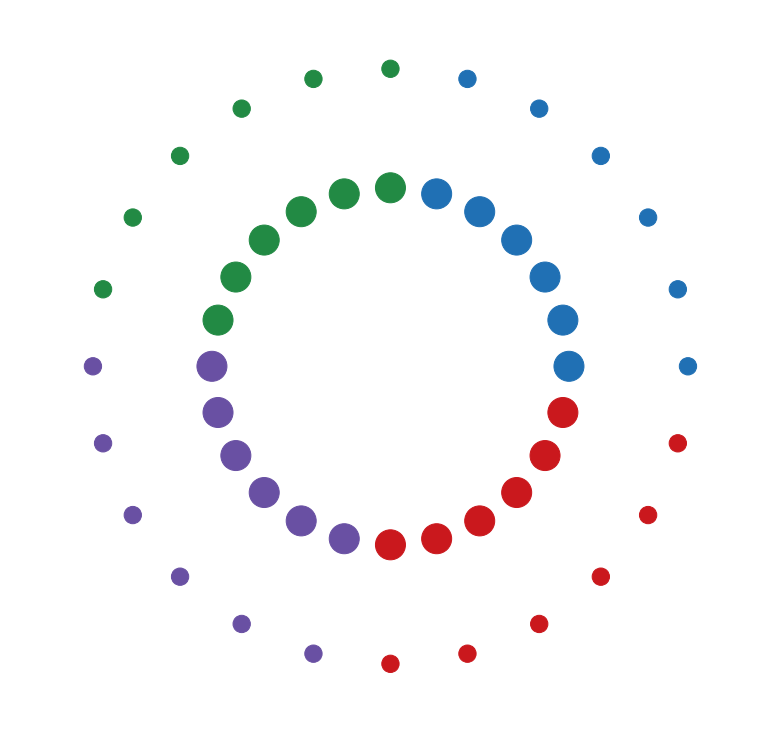

In [48]:
W = 1.0*res[0]['W_rec_plastic']

import networkx as nx
import numpy as np
import matplotlib as matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import sys, os




'''
Image settings:
'''

'''
    - s_min and s_max set the range of nodes size depending on their final
        degree if VaryNodesSize is True;
    - min_ew max_ew set the minimum and maximum width of the represented edges
        if VaryEdgesSize is True;
'''

VaryNodesSize = True
s_min = 6.
s_max = 12.

VaryEdgesSize = True
min_ew = 2.
max_ew = 8.

'''
    min_d sets the minimum distance of an edge from the circle and
        IT MUST FALLS IN THE (.1, max_d) interval

    max_d sets the maximum distance of an edge from the center of the circle and
        IT MUST FALLS IN THE (min_d, .95) interval
'''
min_d = .15
max_d = .825


small_pos_keys = []
large_pos_keys = []
for i in xrange(48):
    if i%12>5:
        small_pos_keys.append(i)
    else:
        large_pos_keys.append(i)


        
pos_circ_large = nx.circular_layout(small_pos_keys,scale=0.6)
pos_circ_small = nx.circular_layout(large_pos_keys,scale=1.0)
pos_circ_large.update(pos_circ_small)

W_thresh = 0.038
W[W<W_thresh] = 0.0
#W*=50.0
G = nx.from_numpy_matrix(W)
#G = nx.from_numpy_matrix(W.transpose(),create_using=nx.DiGraph())


#for s,t,weight in zip(Sources, Targets, Weights):
#    G.add_edges_from([(s,t)], w=weight)

degrees = [G.degree(n) for n in G.nodes()]
k_max = max(degrees)

# Pos is a dictionary containing the positions of the nodes...
Pos = nx.shell_layout(G)

ew = [((G[e[0]][e[1]]['weight']-W_thresh))*1000.0 for e in G.edges()]
w_min = min(ew)
w_max = max(ew)

ec = [plt.cm.Blues(.5 + .45*(float(W_i)/w_max)) for W_i in ew]
#ec = ['blue' if G.edges()[i][0]%12 > 5 else 'purple' for idx in xrange(len(G.edges()))]
#ec = [G[e[0]][e[1]]['weight'] for e in G.edges()]
#ec = [plt.cm.Purples(ew[i]) if G.edges()[i][1]%12 > 5 else 'purple' for i in xrange(len(G.edges()))]

ec = ['gray' if e[1]%12 > 5 else 'black' for e in G.edges()]

#ns = [s_min*(1 + (s_max-s_min)*k/k_max) for k in degrees]

#nc = [plt.cm.Oranges(.75) if k == k_max-1 else plt.cm.Blues(.6)\
#      for k in degrees]
ns = [900 if k%12>5 else 300 for k in xrange(48)]
nshape = ['o' if k%12>5 else 'x' for k in xrange(48)]

fast_nodes = []
slow_nodes = []

for k in xrange(48):
    if k%12>5:
        fast_nodes.append(k)
    else:
        slow_nodes.append(k)

nc = [plt.cm.Blues(.75)]*12 + [plt.cm.Greens(.75)]*12 + [plt.cm.Purples(.75)]*12 + [plt.cm.Reds(.75)]*12
#nc = [plt.cm.Blues(0.75)]*6 + [plt.cm.Blues(0.5)]*6 + [plt.cm.Oranges(.75)]*12 + [plt.cm.Greens(.75)]*12 + [plt.cm.Reds(.75)]*12
nc_split = [plt.cm.Blues(.75)]*6 + [plt.cm.Greens(.75)]*6 + [plt.cm.Purples(.75)]*6 + [plt.cm.Reds(.75)]*6

nx.draw(G, edge_color=ec, width=0, node_color=nc, node_size=ns,pos=pos_circ_large,alpha=1.0,arrows=True)
#nx.draw_networkx_nodes(G, edge_color=ec, width=ew, nodelist=slow_nodes, node_color=nc_split, node_shape='o',pos=pos_circ_large,alpha=1.0,arrows=True)
#nx.draw_networkx_nodes(G, edge_color=ec, width=ew, nodelist=fast_nodes, node_color=nc_split, node_shape='v',pos=pos_circ_large,alpha=1.0,arrows=True)

plt.gcf().set_size_inches(10,10)

import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

#fast_patch = mlines.Line2D([], [], color='gray',
#                          markersize=15, label='Fast synapses',lw=4)
#slow_patch = mlines.Line2D([], [], color='black',
#                          markersize=15, label='Slow synapses',lw=4)
fast_node_patch =  mlines.Line2D([],[], color='gray', linestyle='', marker='o',markersize=25, label='Fast neurons')
slow_node_patch =  mlines.Line2D([],[], color='black', linestyle='', marker='o',markersize=17, label='Slow neurons')

#fast_node_patch = matplotlib.markers([],color='gray',
#                          label='Fast synapses')
#slow_node_patch = mpatches.Circle([],color='gray',
#                          label='Slow synapses')

#plt.legend(handles=[fast_patch,slow_patch],loc='upper right')
#legend_node = plt.legend(handles=[fast_node_patch,slow_node_patch],loc='upper right',ncol=1)
#legend_syn = plt.legend(handles=[fast_patch,slow_patch],loc='upper left',ncol=1)
#plt.gca().add_artist(legend_node)

tikz_save('manuscript/figures/W_net_noedges.tex',
           figureheight = '\\figureheight',
           figurewidth = '\\figurewidth')
plt.savefig('manuscript/figures/W_net_noedges.pdf')

In [ ]:
small_pos_keys = []
large_pos_keys = []
for i in xrange(48):
    if i%12>5:
        small_pos_keys.append(i)
    else:
        large_pos_keys.append(i)


        
pos_circ_large = nx.circular_layout(small_pos_keys,scale=0.75)
pos_circ_small = nx.circular_layout(large_pos_keys,a=1.0)
pos_circ_large.update(pos_circ_small)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))
W = res[0]['W_rec_plastic']
N_or = 4
N = 48
N_per = int(N/N_or)

spec_i = []
nonspec_i = [] 
for i in xrange(N_or):
    for j in xrange(int(N/N_or)):
        spec_i.append(sum(W[i*(N_per)+j,i*N_per:(i+1)*N_per]))
        nonspec_i.append(sum(W[i*(N_per)+j,:i*N_per])+sum(W[i*(N_per)+j,(i+1)*N_per:]))

slow_idx = []
fast_idx = []
for i in xrange(N):
    if i%N_per<N_per/2:
        slow_idx.append(i)
    else:
        fast_idx.append(i)
        
# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 6), sharex=True)

# Generate some sequential data
x = np.array(list("ABCDEFGHI"))
y1 = np.arange(1, 10)
sns.barplot(x, y1, palette="BuGn_d", ax=ax1)
ax1.set_ylabel("Sequential")

# Center the data to make it diverging
y2 = y1 - 5
sns.barplot(x, y2, palette="RdBu_r", ax=ax2)
ax2.set_ylabel("Diverging")

# Randomly reorder the data to make it qualitative
y3 = rs.choice(y1, 9, replace=False)
sns.barplot(x, y3, palette="Set3", ax=ax3)
ax3.set_ylabel("Qualitative")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=3)

NameError: name 'res' is not defined

AttributeError: Unknown property vert

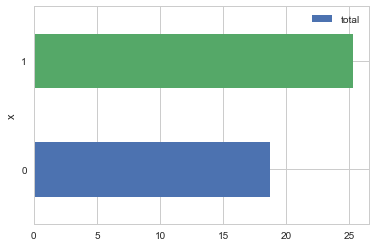

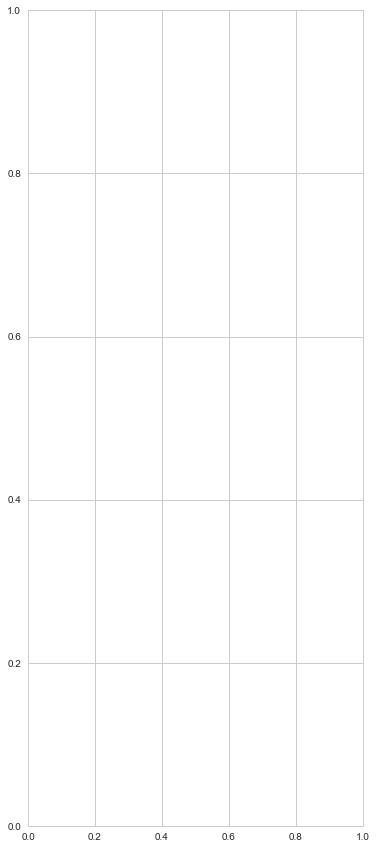

In [60]:
data_conn = {'x':[0,1],
             'total': [np.sum(np.array(spec_i)[slow_idx])+np.sum(np.array(nonspec_i)[slow_idx]),np.sum(np.array(spec_i)[fast_idx])+np.sum(np.array(nonspec_i)[fast_idx])],
             'specific': [np.sum(np.array(spec_i)[slow_idx]),np.sum(np.array(spec_i)[fast_idx])]
       }
import pandas as pd

df = pd.DataFrame(data_conn)
df.plot("x", "total", kind="barh", color=sns.color_palette("deep", 3))



f, ax = plt.subplots(figsize=(6, 15))

sns.set_color_codes("pastel")
sns.barplot(x="x", y="total", data=data_conn,
            label="Non-Specific", color="b",vert=False)

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="x", y="specific", data=data_conn,
            label="Specific", color="b",vert=False)

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(-1, 3), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

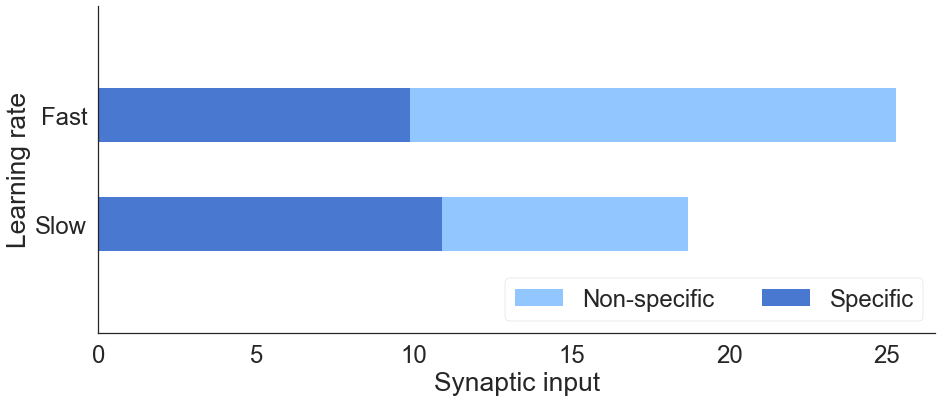

In [61]:


sns.set(style="white",context='poster',font_scale=1.5)
f, ax = plt.subplots(figsize=(15, 6))


sns.set_color_codes("pastel")
df.plot("x", "total", kind="barh", color='b',ax=ax,label='Non-specific')
sns.set_color_codes("muted")
df.plot("x", "specific", kind="barh", color='b',ax=ax,label='Specific')

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylim=(-1, 2), ylabel="Learning rate",
       xlabel="Synaptic input")
ax.set_yticklabels(['Slow','Fast'])
sns.despine(left=False, bottom=False)

In [19]:
#diverse_res = py_scripts_yann.load_pickle('/home/ysweeney/CNL-brain1/data/topdown_learning/diverse_rates_net_runs/122/broad_tuning_scaling_rate_2e-5_Wmax_5_4_orientatations_4_stimuli_48N_diverse_ind_OU_15_0.pkl')
#diverse_res = py_scripts_yann.load_pickle('/home/ysweeney/CNL-brain3/data/topdown_learning/diverse_rates_net_runs/134/broad_tuning_scaling_rate_2e-5_Wmax_5_4_orientatations_4_stimuli_48N_diverse__logscale_ind_OU_15_9.pkl')
#diverse_res = py_scripts_yann.load_pickle('/home/ysweeney/CNL-brain3/data/topdown_learning/diverse_rates_net_runs/136/broad_tuning_scaling_rate_2e-5_Wmax_5_4_orientatations_4_stimuli_48N_diverse_logscale_p1_to_15_ind_OU_15_10.pkl')

#diverse_dir = '/home/ysweeney/CNL-brain3/data/topdown_learning/diverse_rates_net_runs/136/'
#diverse_dir = '/home/ysweeney/CNL-brain3/data/topdown_learning/diverse_rates_net_runs/137/'
#diverse_dir = '/home/ysweeney/CNL-brain3/data/topdown_learning/diverse_rates_net_runs/142/'
#diverse_dir = '/home/ysweeney/CNL-brain3/data/topdown_learning/diverse_rates_net_runs/145/
diverse_dir = '/mnt/DATA/ysweeney/data/topdown_learning/diverse_rates_net_runs/136/'


import glob
diverse_files = glob.glob(diverse_dir+'*.pkl')

diverse_res = py_scripts_yann.load_pickle(diverse_files[0])

W = diverse_res[0]['W_rec_plastic']
N_or = 4
N = 48
N_per = int(N/N_or)

def get_connect_coupling(_W,_res,only_connect=False):
    spec_i = []
    nonspec_i = [] 
    for i in xrange(N_or):
        for j in xrange(int(N/N_or)):
            spec_i.append(sum(_W[i*(N_per)+j,i*N_per:(i+1)*N_per]))
            nonspec_i.append(sum(_W[i*(N_per)+j,:i*N_per])+sum(_W[i*(N_per)+j,(i+1)*N_per:]))

    if only_connect:
        return {'spec':spec_i,'nonspec':nonspec_i} 
            
    sim_pars_pass = _res['sim_pars'].copy()
    sim_pars_pass['set_W_rec_plastic'] = True
    sim_pars_pass['T'] = 100000
    sim_pars_pass['sample_res'] = 1
    sim_pars_pass['ind_sigma_OU'] = 5.0

    sim_pars_pass['W_rec_plastic_passed'] = _W

    results_frozen = run_single_neuron_associative_learning.run_network_frozen_stims(sim_pars_pass,'random_single')
    pop_coupling = run_single_neuron_associative_learning.get_population_coupling(results_frozen)  
    rates = results_frozen['rates_rec']

    stim_response_i = np.zeros((N,N_or))
    OSI_i = np.zeros(N)

    for idx in xrange(N):
        stim_pref =  idx/(N/N_or)
        stim_range = range(N_or)[-stim_pref+2:] + range(N_or)[:-stim_pref+2]
        order = np.argsort(stim_range)
        stim_response_i[idx,:] = np.array([np.mean(rates[results_frozen['presented_stimA']==sx,idx],axis=0) for sx in range(N_or)])
        OSI_i[idx] = (np.max(stim_response_i[idx])-np.min(stim_response_i[idx]))/np.mean(stim_response_i[idx])
    
    return {'spec':spec_i,'nonspec':nonspec_i,'pop_coupling':pop_coupling,'OSI':OSI_i,'stim_response':stim_response_i}

alpha_i = (diverse_res[0]['sim_pars']['alpha_i']).round(12)
alpha_vals = set(alpha_i.flatten())
alpha_vals = set([round(x,12) for x in alpha_vals])

diverse_data = {'alpha':[],
               'total':[],
               'spec':[],
               'pop_coupling':[],
                'pop_coupling_sem': [],
                'OSI': [],
                'stim_response': []
               }

diverse_results = []

diverse_results_sample_times = {}
sample_times = np.arange(0.0,1.0,0.01)
for x in sample_times:
    diverse_results_sample_times[str(x)]=[]
    
for res_file in diverse_files:
    print 'running analysis ', res_file
    res_i = py_scripts_yann.load_pickle(res_file)
    diverse_results.append(get_connect_coupling(res_i[0]['W_rec_plastic'],res_i[0]))
    
    N_w_samples = res_i[0]['weights_rec'].shape[0]
    for sample_time in sample_times:
        print 'for time ', sample_time
        diverse_results_sample_times[str(sample_time)].append(get_connect_coupling(res_i[0]['weights_rec'][int(N_w_samples*sample_time),:].reshape(N,N),res_i[0],only_connect=True))
    
idx = 0

#### THIS ONLY WORKS FOR FULLY DIVERSE RATES
for alpha in np.sort(np.array(list(alpha_vals))):
    diverse_data['alpha'].append(alpha*1e8)
    total = []
    spec = []
    pc = []
    OSI = []
    stim_response = []
    # for i in xrange(N_or):
    #     total.append(nonspec_i[((i*N_per)+idx*2):((i*N_per)+idx*2)+2])
    #     spec.append(spec_i[((i*N_per)+idx*2):((i*N_per)+idx*2)+2])
    #     pc.append(pop_coupling[((i*N_per)+idx*2):((i*N_per)+idx*2)+2])
    for i in xrange(N_or):
        for res_i in diverse_results:
            total.append(res_i['nonspec'][((i*N_per)+idx)])
            spec.append(res_i['spec'][((i*N_per)+idx)])
            #pc.append(res_i['pop_coupling'][((i*N_per)+idx)])
            #OSI.append(res_i['OSI'][((i*N_per)+idx)])
            #stim_response.append(res_i['stim_response'][((i*N_per)+idx)])

    diverse_data['pop_coupling'].append(np.mean(pc))
    diverse_data['pop_coupling_sem'].append(scipy.stats.sem(pc))
    diverse_data['total'].append(np.mean(total))
    diverse_data['spec'].append(np.mean(spec))
    diverse_data['OSI'].append(OSI)
    diverse_data['stim_response'].append(np.mean(np.array(stim_response),axis=0))

    idx += 1


running analysis  /mnt/DATA/ysweeney/data/topdown_learning/diverse_rates_net_runs/136/broad_tuning_scaling_rate_2e-5_Wmax_5_4_orientatations_4_stimuli_48N_diverse_logscale_p1_to_15_ind_OU_15_3.pkl


NameError: global name 'run_single_neuron_associative_learning' is not defined

In [453]:
diverse_data = {'alpha':[],
               'total':[],
               'spec':[],
               'pop_coupling':[],
                'pop_coupling_sem': [],
                'mean_OSI': [],
                'sem_OSI': [],
                'stim_response': []
               }

idx = 0
for alpha in np.sort(np.array(list(alpha_vals))):
    diverse_data['alpha'].append(alpha*1e8)
    total = []
    spec = []
    pc = []
    OSI = []
    stim_response = []
    # for i in xrange(N_or):
    #     total.append(nonspec_i[((i*N_per)+idx*2):((i*N_per)+idx*2)+2])
    #     spec.append(spec_i[((i*N_per)+idx*2):((i*N_per)+idx*2)+2])
    #     pc.append(pop_coupling[((i*N_per)+idx*2):((i*N_per)+idx*2)+2])
    for i in xrange(N_or):
        for res_i in diverse_results:
            total.append(res_i['nonspec'][((i*N_per)+idx)])
            spec.append(res_i['spec'][((i*N_per)+idx)])
            pc.append(res_i['pop_coupling'][((i*N_per)+idx)])
            OSI.append(res_i['OSI'][((i*N_per)+idx)])
            stim_response.append(res_i['stim_response'][((i*N_per)+idx)])

    diverse_data['pop_coupling'].append(np.mean(pc))
    diverse_data['pop_coupling_sem'].append(scipy.stats.sem(pc))
    diverse_data['total'].append(np.mean(total))
    diverse_data['spec'].append(np.mean(spec))
    diverse_data['mean_OSI'].append(np.mean(OSI))
    diverse_data['sem_OSI'].append(scipy.stats.sem(OSI))
    diverse_data['stim_response'].append(np.mean(np.array(stim_response),axis=0))

    idx += 1


In [816]:
## For 2 rates

diverse_data = {'alpha':[],
               'total':[],
               'spec':[],
               'pop_coupling':[],
                'pop_coupling_sem': [],
                'OSI': [],
                'stim_response': []
               }

idx = 0
for alpha in np.sort(np.array(list(alpha_vals))):
    diverse_data['alpha'].append(alpha*1e8)
    total = []
    spec = []
    pc = []
    OSI = []
    stim_response = []
    # for i in xrange(N_or):
    #     total.append(nonspec_i[((i*N_per)+idx*2):((i*N_per)+idx*2)+2])
    #     spec.append(spec_i[((i*N_per)+idx*2):((i*N_per)+idx*2)+2])
    #     pc.append(pop_coupling[((i*N_per)+idx*2):((i*N_per)+idx*2)+2])
    for i in xrange(N_or):
        for res_i in diverse_results:
            total.append(res_i['nonspec'][((i*N_per)+idx*6):(((i*N_per)+idx*6)+6)])
            spec.append(res_i['spec'][((i*N_per)+idx*6):(((i*N_per)+idx*6)+6)])
            #pc.append(res_i['pop_coupling'][((i*N_per)+idx)])
            #OSI.append(res_i['OSI'][((i*N_per)+idx)])
            #stim_response.append(res_i['stim_response'][((i*N_per)+idx)])

    #diverse_data['pop_coupling'].append(np.mean(pc))
    #diverse_data['pop_coupling_sem'].append(scipy.stats.sem(pc))
    diverse_data['total'].append((np.array(total)))
    diverse_data['spec'].append((np.array(spec)))
    #diverse_data['OSI'].append(OSI)
    #diverse_data['stim_response'].append(np.mean(np.array(stim_response),axis=0))

    idx += 1

TypeError: Empty 'DataFrame': no numeric data to plot

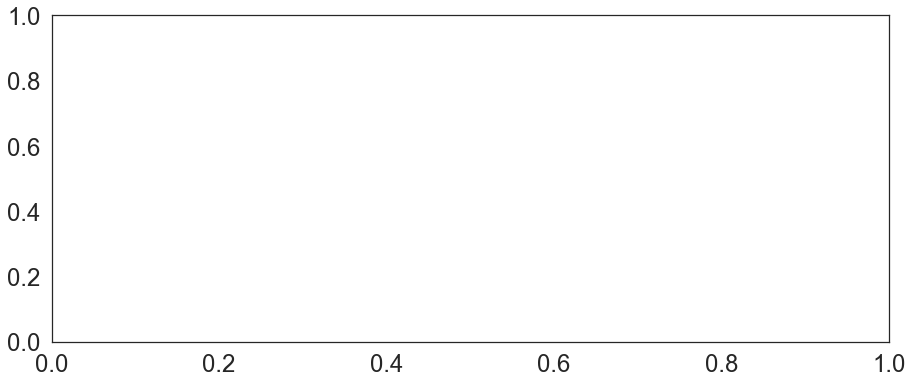

In [116]:
save_fig=False

import pandas as pd
df = pd.DataFrame(diverse_data)
import scipy

sns.set(style="white",context='poster',font_scale=1.5)
f, ax = plt.subplots(figsize=(15, 6))
#ax_pc = ax.twinx()

sns.set_color_codes("pastel")
df.plot("alpha", "total", kind="bar", color='b',ax=ax,label='Non-specific') 
sns.set_color_codes("muted")
df.plot("alpha", "spec", kind="bar", color='b',ax=ax,label='Specific')

ax.legend(ncol=1, loc="upper left", frameon=False)
ax.set(xlim=(-1, 12), xlabel="Learning rate",
       ylabel="Synaptic input")
ax.set_xticklabels([x for x in df['alpha']])

sns.set_color_codes("dark")
#ax_pc.scatter(range(0,12),scipy.stats.zscore(1.0*df['pop_coupling']),color='r',s=100)
#ax_pc.errorbar(range(0,12),1.0*df['pop_coupling'],yerr=5*df['pop_coupling_sem'], fmt='o',color=sns.palettes.desaturate('r',1.0))
#ax_pc.errorbar(range(0,12),1.0*df['mean_OSI'],yerr=5*df['sem_OSI'], fmt='o',color=sns.palettes.desaturate('g',1.0))

#ax_pc.scatter(range(0,12),1.0*df['OSI'],color='g',s=100)
#ax_pc.set_ylabel('Population coupling',color='r')
#ax_pc.tick_params('y',colors='r')

#ax_pc.set_ylim(0.15,1.3)

sns.despine(left=False,right=True,bottom=False)
plt.tight_layout()


if save_fig:
    tikz_save('manuscript/figures/rate_coupling_link_only_connectivity.tex',
           figureheight = '\\figureheight',
           figurewidth = '\\figurewidth')
    plt.savefig('manuscript/figures/rate_coupling_link_only_connectivity.pdf')

In [ ]:
import run_single_neuron_associative_learning

run_single_neuron_associative_learning.get_population_coupling(diverse_res[0])

In [819]:
sns.set_color_codes?

NameError: name 'df' is not defined

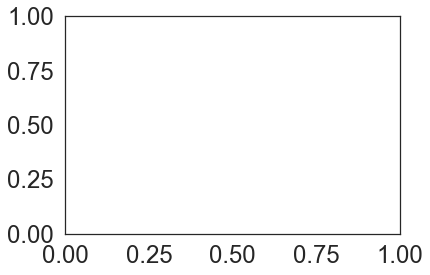

In [54]:
ax = plt.axes()
ax.scatter(range(0,6),1.0*df['pop_coupling'],color='r',s=100)
sns.despine(left=False, bottom=False)

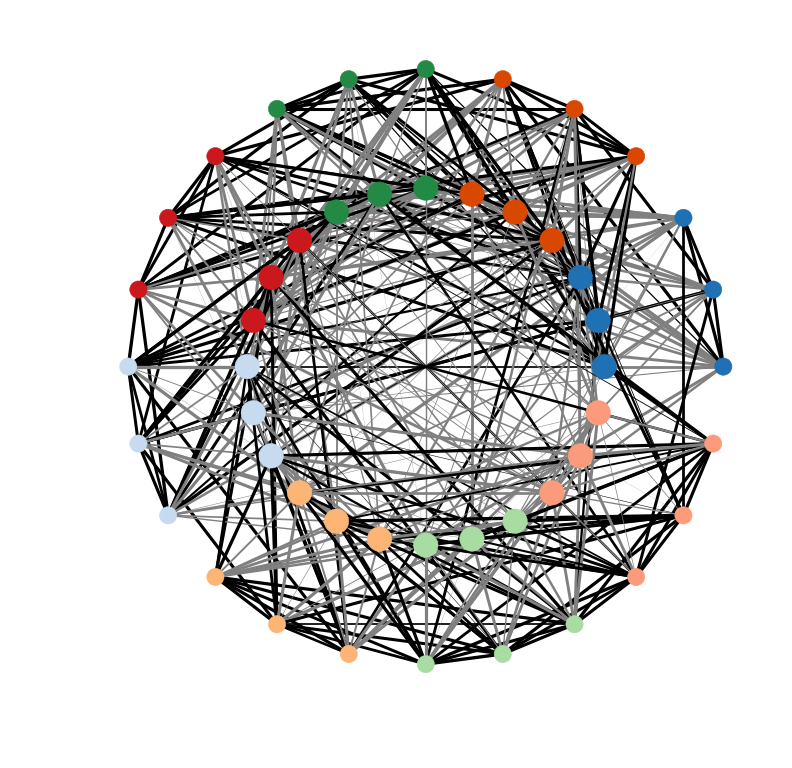

In [832]:
res = py_scripts_yann.load_pickle('/home/ysweeney/CNL-brain3/data/topdown_learning/diverse_rates_net_runs/97/broad_tuning_scaling_rate_2e-5_Wmax_5_8_orientatations_8_stimuli_48N_mixed_p1_1_ind_OU_15_15nets_0.pkl_decoding_high_OU_ratios_low_FF_T_200k_W_scale_1')

W = 1.0*res[0]['W_rec_plastic']

small_pos_keys = []
large_pos_keys = []
for i in xrange(48):
    if i%6>2:
        small_pos_keys.append(i)
    else:
        large_pos_keys.append(i)


        
pos_circ_large = nx.circular_layout(small_pos_keys,scale=0.6)
pos_circ_small = nx.circular_layout(large_pos_keys,scale=1.0)
pos_circ_large.update(pos_circ_small)

W_thresh = 0.035
W[W<W_thresh] = 0.0
#W*=50.0
G = nx.from_numpy_matrix(W)
#G = nx.from_numpy_matrix(W.transpose(),create_using=nx.DiGraph())


#for s,t,weight in zip(Sources, Targets, Weights):
#    G.add_edges_from([(s,t)], w=weight)

degrees = [G.degree(n) for n in G.nodes()]
k_max = max(degrees)

# Pos is a dictionary containing the positions of the nodes...
Pos = nx.shell_layout(G)

ew = [((G[e[0]][e[1]]['weight']-W_thresh))*500.0 for e in G.edges()]
w_min = min(ew)
w_max = max(ew)

ec = [plt.cm.Blues(.5 + .45*(float(W_i)/w_max)) for W_i in ew]
#ec = ['blue' if G.edges()[i][0]%12 > 5 else 'purple' for idx in xrange(len(G.edges()))]
#ec = [G[e[0]][e[1]]['weight'] for e in G.edges()]
#ec = [plt.cm.Purples(ew[i]) if G.edges()[i][1]%12 > 5 else 'purple' for i in xrange(len(G.edges()))]

ec = ['gray' if e[1]%6 > 2 else 'black' for e in G.edges()]

ns = [s_min*(1 + (s_max-s_min)*k/k_max) for k in degrees]
nc = [plt.cm.Oranges(.75) if k == k_max-1 else plt.cm.Blues(.6)\
      for k in degrees]
ns = [600 if k%6>2 else 300 for k in xrange(48)]

nc = [plt.cm.Blues(.75)]*12 + [plt.cm.Oranges(.75)]*12 + [plt.cm.Greens(.75)]*12 + [plt.cm.Reds(.75)]*12
nc = [plt.cm.Blues(.75)]*6 + [plt.cm.Oranges(.75)]*6 + [plt.cm.Greens(.75)]*6 + [plt.cm.Reds(.75)]*6 + [plt.cm.Blues(.35)]*6 + [plt.cm.Oranges(.35)]*6 + [plt.cm.Greens(.35)]*6 + [plt.cm.Reds(.35)]*6

#nc = [plt.cm.Blues(0.75)]*6 + [plt.cm.Blues(0.5)]*6 + [plt.cm.Oranges(.75)]*12 + [plt.cm.Greens(.75)]*12 + [plt.cm.Reds(.75)]*12

nx.draw(G, edge_color=ec, width=ew, node_color=nc, node_size=ns,pos=pos_circ_large,alpha=1.0,arrows=True)
plt.gcf().set_size_inches(10,10)


In [81]:
import run_single_neuron_associative_learning

diverse_res = py_scripts_yann.load_pickle('/home/ysweeney/CNL-brain3/data/topdown_learning/diverse_rates_net_runs/136/broad_tuning_scaling_rate_2e-5_Wmax_5_4_orientatations_4_stimuli_48N_diverse_logscale_p1_to_15_ind_OU_15_10.pkl')[0]

diverse_res = py_scripts_yann.load_pickle('/home/ysweeney/CNL-brain3/data/topdown_learning/diverse_rates_net_runs/97/broad_tuning_scaling_rate_2e-5_Wmax_5_8_orientatations_8_stimuli_48N_mixed_p1_1_ind_OU_15_15nets_0.pkl_decoding_high_OU_ratios_low_FF_T_200k_W_scale_1')[0]


sim_pars_pass = diverse_res['sim_pars'].copy()
sim_pars_pass['set_W_rec_plastic'] = True
sim_pars_pass['T'] = 10000
sim_pars_pass['sample_res'] = 1
sim_pars_pass['W_rec_plastic_passed'] = diverse_res['W_rec_plastic']

results_frozen = run_single_neuron_associative_learning.run_network_frozen_stims(sim_pars_pass,'random_single')


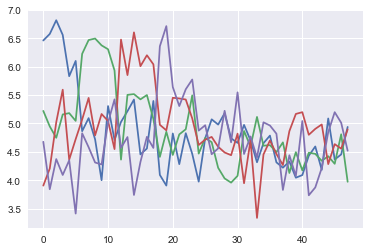

In [82]:
rates = results_frozen['rates_rec']
plt.plot(np.mean(rates[results_frozen['presented_stimA']==0,:],axis=0))
plt.plot(np.mean(rates[results_frozen['presented_stimA']==1,:],axis=0))
plt.plot(np.mean(rates[results_frozen['presented_stimA']==2,:],axis=0))
plt.plot(np.mean(rates[results_frozen['presented_stimA']==3,:],axis=0))

tuning_curves = {
    'i':[],
    'stim_responses': [],
    'stim_responses_0': [],
    'stim_responses_1': [],
    'stim_responses_2': [],
    'stim_responses_3': []
}
for i in xrange(48):
    tuning_curves['i'].append(i)
    tuning_curves['stim_responses'].append([rates[results_frozen['presented_stimA']==sx,0]for sx in range(8)])
    tuning_curves['stim_responses_0'].append(rates[results_frozen['presented_stimA']==0])
    tuning_curves['stim_responses_1'].append(rates[results_frozen['presented_stimA']==1])
    tuning_curves['stim_responses_2'].append(rates[results_frozen['presented_stimA']==2])
    tuning_curves['stim_responses_3'].append(rates[results_frozen['presented_stimA']==3])
                                             
import pandas as pd

df = pd.DataFrame(tuning_curves)

In [40]:
[np.mean(rates[results_frozen['presented_stimA']==sx,0],axis=0) for sx in range(4)]

[6.351776721306285, 4.5208572818352879, 4.7069719699909225, 4.433904167591483]

[7, 0, 1, 2, 3, 4, 5, 6]
[3, 4, 5, 6, 7, 0, 1, 2]


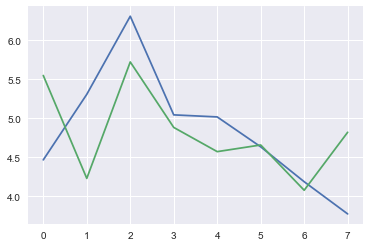

In [164]:
import scipy

N_stim = 8

for idx in xrange(10,48,20):
    stim_pref =  idx/(48/N_stim)
    stim_range = range(N_stim)[-stim_pref:] + range(N_stim)[:-stim_pref]
    print stim_range
    #sns.plt.fill_between(stim_range, np.array([np.mean(rates[results_frozen['presented_stimA']==sx,idx],axis=0) for sx in range(N_stim)])-1*np.array([scipy.stats.sem(rates[results_frozen['presented_stimA']==sx,idx],axis=0) for sx in range(N_stim)]), np.array([np.mean(rates[results_frozen['presented_stimA']==sx,idx],axis=0) for sx in range(N_stim)])+1*np.array([scipy.stats.sem(rates[results_frozen['presented_stimA']==sx,idx],axis=0) for sx in range(N_stim)]), alpha=0.2)
    sns.plt.plot(range(8), np.array([np.mean(rates[results_frozen['presented_stimA']==sx,idx],axis=0) for sx in range(N_stim)])[stim_range],'-')
    #sns.plt.plot(stim_range, [np.mean(rates[results_frozen['presented_stimA']==sx,idx],axis=0) for sx in range(N_stim)],'--')


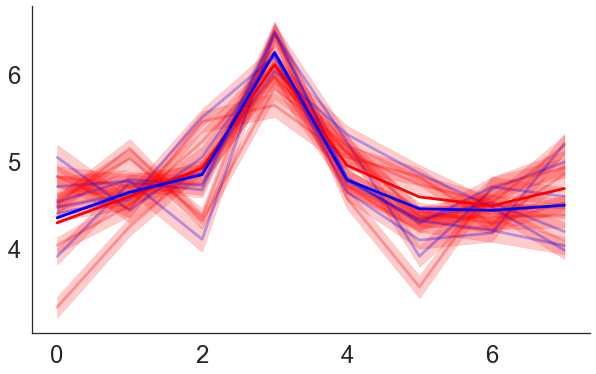

In [223]:
import scipy

N_stim = 8


sns.set(style="white",context='poster',font_scale=1.5)
f, ax = plt.subplots(figsize=(10, 6))

avg_fast = np.zeros((N_stim,48))
avg_slow = np.zeros((N_stim,48))
    
    
OSI_i = np.zeros(48)

for idx in xrange(48):
    stim_pref =  idx/(48/N_stim)
    stim_range = range(N_stim)[-stim_pref+3:] + range(N_stim)[:-stim_pref+3]
    order = np.argsort(stim_range)
    stim_response = np.array([np.mean(rates[results_frozen['presented_stimA']==sx,idx],axis=0) for sx in range(N_stim)])
    
    if idx%6>2:
        avg_fast[:,idx] = stim_response[order]
    else:
        avg_slow[:,idx] = stim_response[order]
    OSI_i[idx] = (np.max(stim_response)-np.min(stim_response))/np.sum(stim_response)

for idx in xrange(0,48,8):
    stim_pref =  idx/(48/N_stim)
    stim_range = range(N_stim)[-stim_pref+3:] + range(N_stim)[:-stim_pref+3]
    order = np.argsort(stim_range)
    ax.fill_between(np.array(stim_range)[order], (np.array([np.mean(rates[results_frozen['presented_stimA']==sx,idx],axis=0) for sx in range(N_stim)])-1*np.array([scipy.stats.sem(rates[results_frozen['presented_stimA']==sx,idx],axis=0) for sx in range(N_stim)]))[order], (np.array([np.mean(rates[results_frozen['presented_stimA']==sx,idx],axis=0) for sx in range(N_stim)])+1*np.array([scipy.stats.sem(rates[results_frozen['presented_stimA']==sx,idx],axis=0) for sx in range(N_stim)]))[order], color='r',alpha=0.2)
    #sns.plt.plot(range(8), np.array([np.mean(rates[results_frozen['presented_stimA']==sx,idx],axis=0) for sx in range(N_stim)])[stim_range],'-')
    ax.plot(np.array(stim_range)[order], np.array([np.mean(rates[results_frozen['presented_stimA']==sx,idx],axis=0) for sx in range(N_stim)])[order],'b-',alpha=0.3)
    
for idx in xrange(4,48,8):
    stim_pref =  idx/(48/N_stim)
    stim_range = range(N_stim)[-stim_pref+3:] + range(N_stim)[:-stim_pref+3]
    order = np.argsort(stim_range)
    ax.fill_between(np.array(stim_range)[order], (np.array([np.mean(rates[results_frozen['presented_stimA']==sx,idx],axis=0) for sx in range(N_stim)])-1*np.array([scipy.stats.sem(rates[results_frozen['presented_stimA']==sx,idx],axis=0) for sx in range(N_stim)]))[order], (np.array([np.mean(rates[results_frozen['presented_stimA']==sx,idx],axis=0) for sx in range(N_stim)])+1*np.array([scipy.stats.sem(rates[results_frozen['presented_stimA']==sx,idx],axis=0) for sx in range(N_stim)]))[order], color='r',alpha=0.2)
    #sns.plt.plot(range(8), np.array([np.mean(rates[results_frozen['presented_stimA']==sx,idx],axis=0) for sx in range(N_stim)])[stim_range],'-')
    ax.plot(np.array(stim_range)[order], np.array([np.mean(rates[results_frozen['presented_stimA']==sx,idx],axis=0) for sx in range(N_stim)])[order],'r-',alpha=0.3)

sns.despine(left=False, bottom=False)

#f, ax = plt.subplots(figsize=(10, 6))

#ax.fill_between(np.array(stim_range)[order], (np.array([np.mean(rates[results_frozen['presented_stimA']==sx,idx],axis=0) for sx in range(N_stim)])-1*np.array([scipy.stats.sem(rates[results_frozen['presented_stimA']==sx,idx],axis=0) for sx in range(N_stim)]))[order], (np.array([np.mean(rates[results_frozen['presented_stimA']==sx,idx],axis=0) for sx in range(N_stim)])+1*np.array([scipy.stats.sem(rates[results_frozen['presented_stimA']==sx,idx],axis=0) for sx in range(N_stim)]))[order], color='r',alpha=0.2)
ax.plot(range(N_stim), 2*np.mean(avg_fast,axis=1),'r-',alpha=1.0)
ax.plot(range(N_stim), 2*np.mean(avg_slow,axis=1),'b-',alpha=1.0)



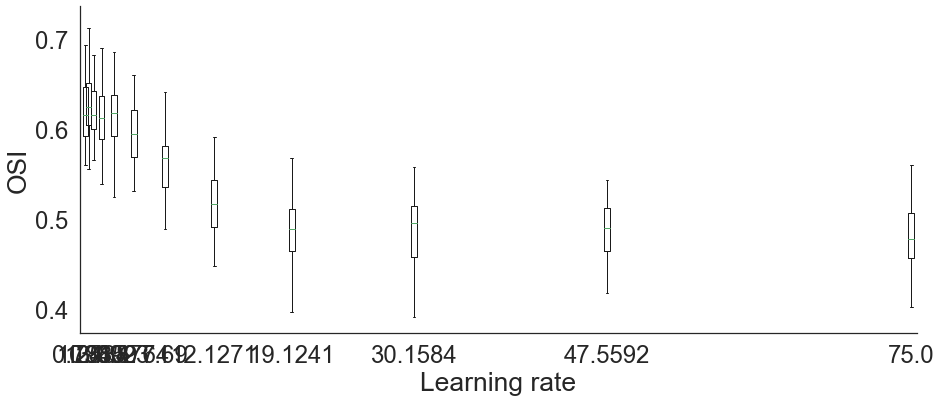

In [451]:
f, ax = plt.subplots(figsize=(15, 6))

ax.boxplot(np.transpose(np.array(diverse_data['OSI'])),positions=diverse_data['alpha'],vert=True,meanline=True)
ax.set(ylabel='OSI',xlabel='Learning rate')
#ax.set_xticklabels(np.logspace(0.5,75,5))
#ax.set_xticklabels([round(float(x),2) for x in diverse_data['alpha']] )
sns.despine(bottom=False,left=False)

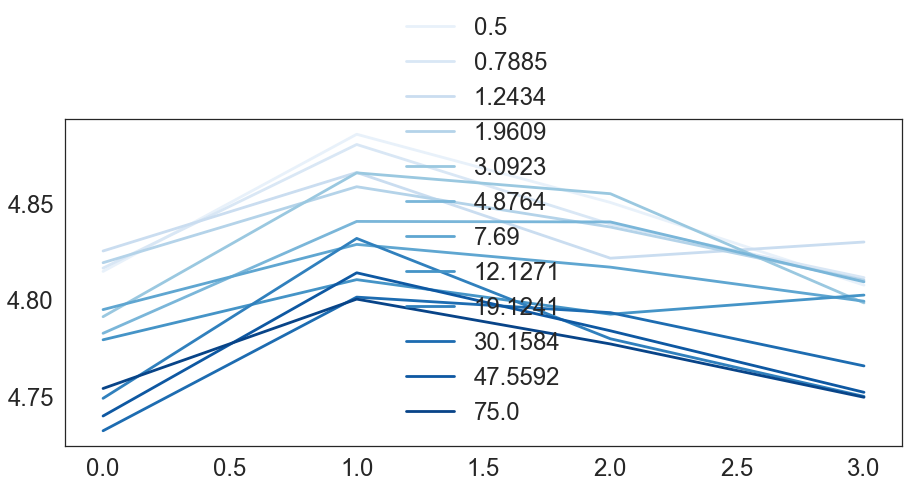

In [457]:
f, ax = plt.subplots(figsize=(15, 6))

response_palette = sns.color_palette("Blues",12)

i=0
for response in diverse_data['stim_response']:
    ax.plot(range(4), response,alpha=1.0,c=response_palette[i],label=diverse_data['alpha'][i])
    i+=1

plt.legend()

In [21]:
#(diverse_results_sample_times_4or['0.1'][0].keys())
#samples_pc = np.zeros((N,len(sample_times)))
#samples_OSI = np.zeros((N,len(sample_times)))
#samples_spec = np.zeros((N,5*len(sample_times)))
#samples_total = np.zeros((N,5*len(sample_times)))

N_nets = len(diverse_results_sample_times[diverse_results_sample_times.keys()[0]])
samples_spec = np.zeros((N,N_nets,len(sample_times)))
samples_total = np.zeros((N,N_nets,len(sample_times)))

for t in xrange(len(sample_times)):
    for idx in xrange(len(diverse_results_sample_times[str(sample_times[t])])):
    #samples_pc[:,t] = diverse_results_sample_times[str(sample_times[t])][0]['pop_coupling']
    #samples_OSI[:,t] = diverse_results_sample_times[str(sample_times[t])][0]['OSI']
        samples_spec[:,idx,t] = diverse_results_sample_times[str(sample_times[t])][idx]['spec']
        samples_total[:,idx,t] = diverse_results_sample_times[str(sample_times[t])][idx]['nonspec']
    #for i in xrange(5):
    #    samples_spec[:,t*5+i] = diverse_results_sample_times[str(sample_times[t])][0]['spec']
    #    samples_total[:,t*5+i] = diverse_results_sample_times[str(sample_times[t])][0]['nonspec']

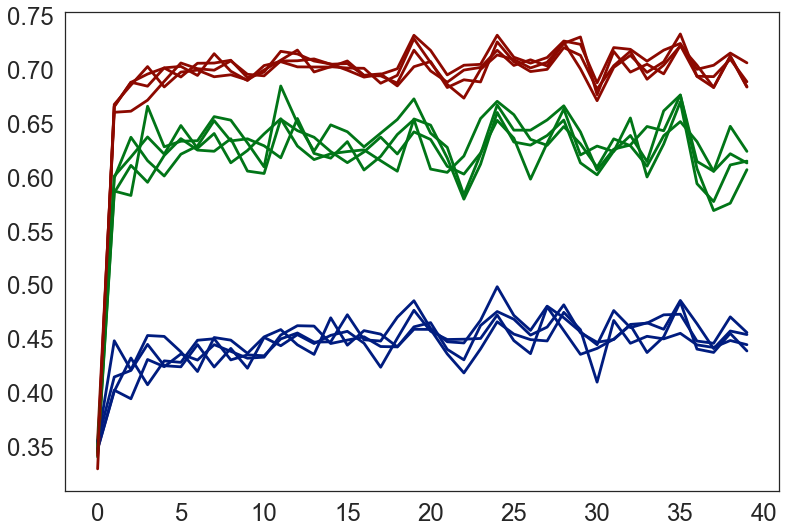

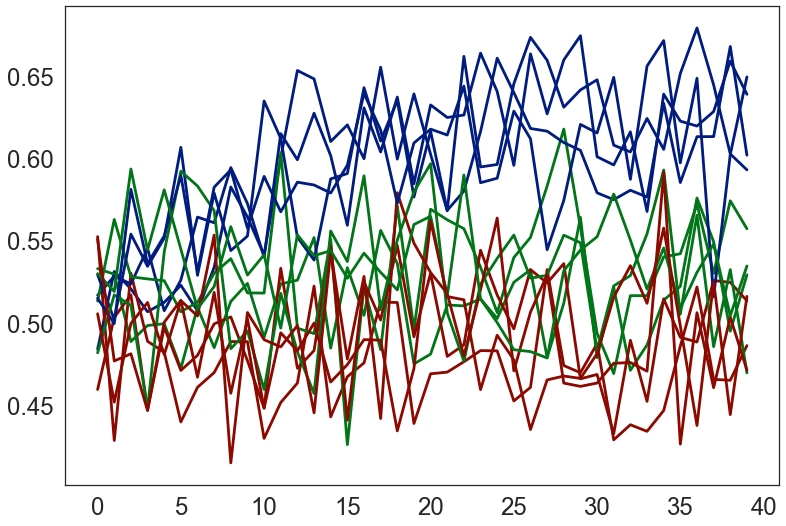

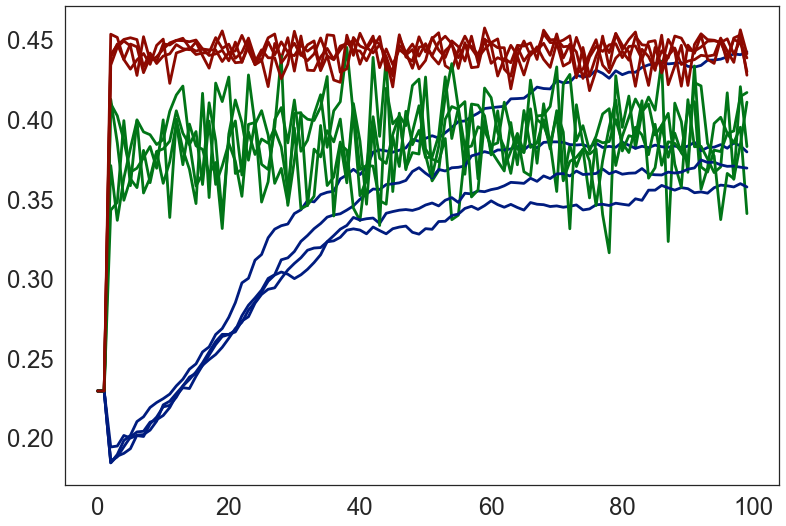

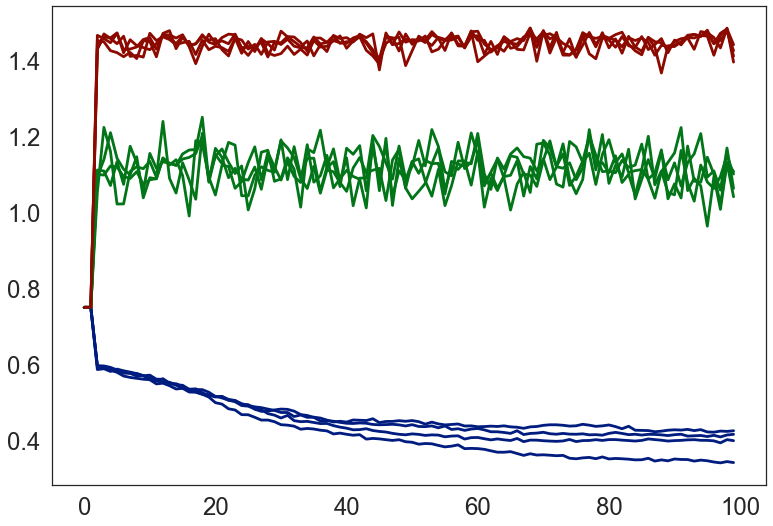

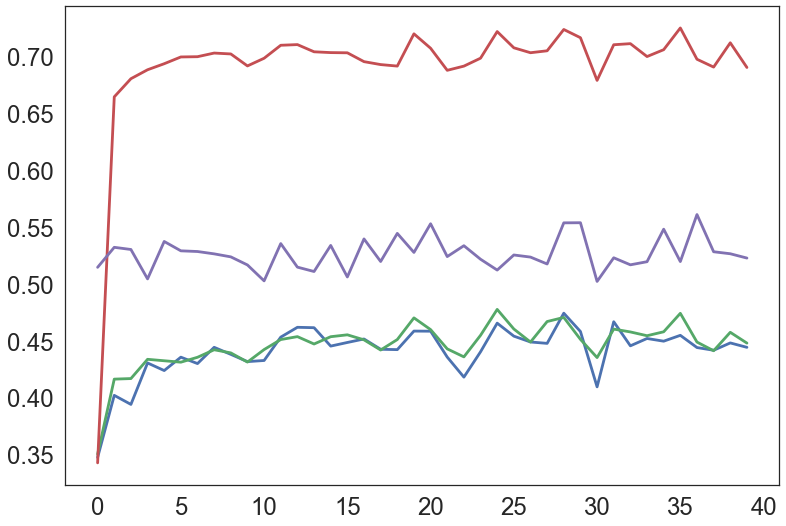

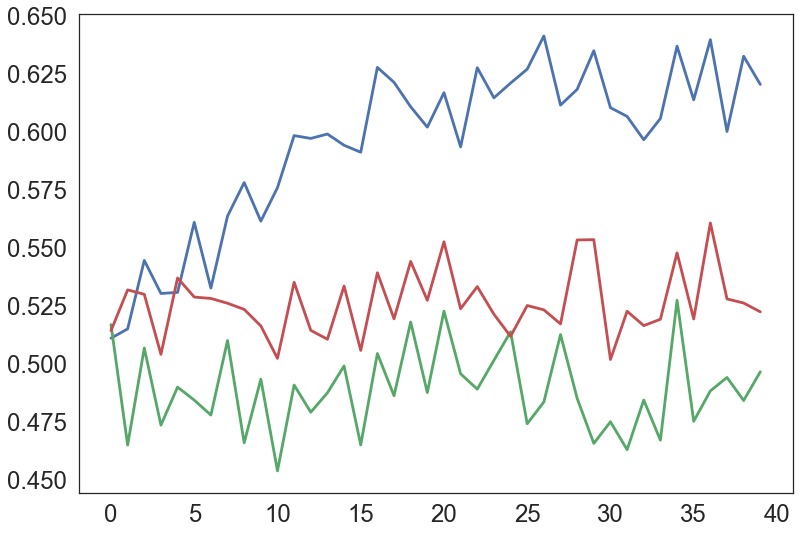

In [519]:
for i in xrange(N_or):
    plt.plot(samples_pc[i*N_per,:],'b')
    plt.plot(samples_pc[i*N_per+7,:],'g')
    plt.plot(samples_pc[i*N_per+11,:],'r')

plt.figure()

for i in xrange(N_or):
    plt.plot(samples_OSI[i*N_per,:],'b')
    plt.plot(samples_OSI[i*N_per+7,:],'g')
    plt.plot(samples_OSI[i*N_per+11,:],'r')

plt.figure()
for i in xrange(N_or):
    plt.plot(samples_spec[i*N_per,:],'b')
    plt.plot(samples_spec[i*N_per+7,:],'g')
    plt.plot(samples_spec[i*N_per+11,:],'r')
    
plt.figure()
for i in xrange(N_or):
    plt.plot(samples_total[i*N_per,:],'b')
    plt.plot(samples_total[i*N_per+7,:],'g')
    plt.plot(samples_total[i*N_per+11,:],'r')

plt.figure()
plt.plot(samples_pc[0,:])
plt.plot(np.mean(samples_pc[range(0,N,N_per)],axis=0))
plt.plot(np.mean(samples_pc[range(11,N,N_per)],axis=0))
plt.plot(np.mean(samples_OSI[range(7,N,N_per)],axis=0))
plt.figure()
plt.plot(np.mean(samples_OSI[range(0,N,N_per)],axis=0))
plt.plot(np.mean(samples_OSI[range(11,N,N_per)],axis=0))
plt.plot(np.mean(samples_OSI[range(7,N,N_per)],axis=0))

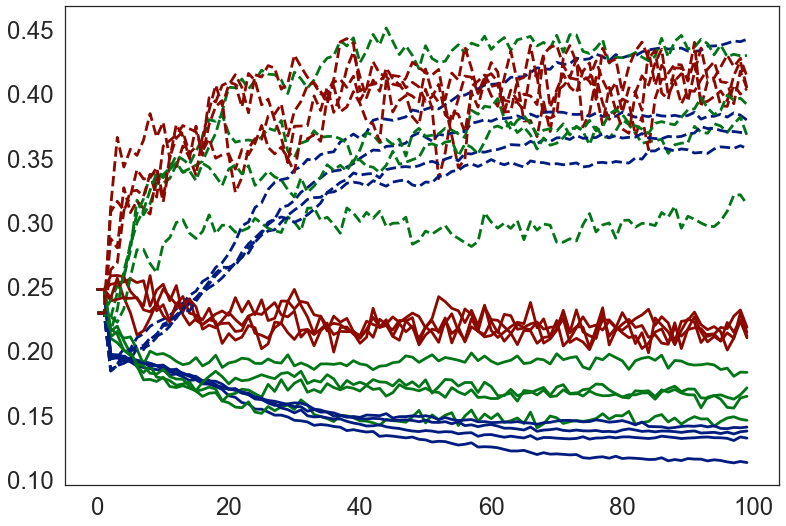

In [530]:
plt.figure()
for i in xrange(N_or):
    plt.plot(0.33*samples_total[i*N_per,:],'b')
    plt.plot(0.33*samples_total[i*N_per +3,:],'g')
    plt.plot(0.33*samples_total[i*N_per +5,:],'r')
    plt.plot(samples_spec[i*N_per,:],'b--')
    plt.plot(samples_spec[i*N_per +3,:],'g--')
    plt.plot(samples_spec[i*N_per +5,:],'r--')

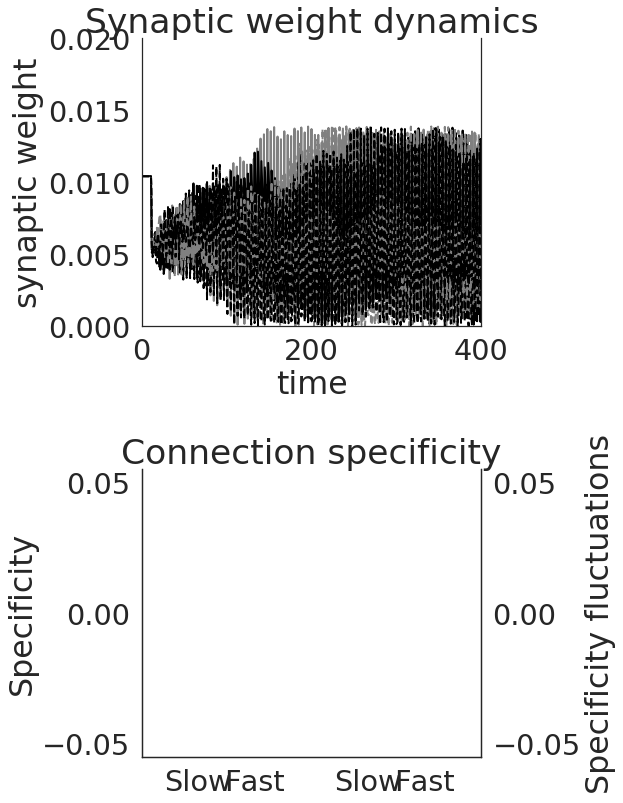

In [27]:
save_fig=False
%matplotlib inline
#diverse_res = py_scripts_yann.load_pickle('/mnt/DATA/ysweeney/data/multimodal/topdown_learning/diverse_rates_net_runs/144/broad_tuning_scaling_rate_2e-5_Wmax_5_8_orientatations_4_stimuli_48N_divere_rates_logscale_p1_to_15_ind_OU_15_1.pkl')

diverse_res = py_scripts_yann.load_pickle('/mnt/DATA/ysweeney/data/topdown_learning/diverse_rates_net_runs/141/broad_tuning_scaling_rate_2e-5_Wmax_5_8_orientatations_8_stimuli_96N_2rates_logscale_p1_to_p5_ind_OU_15_1.pkl')



#W_rec = diverse_res[0]['weights_rec'].reshape((500,48,48))
W_rec = diverse_res[0]['weights_rec'].reshape((1400,48,48))
N_or = 4
N_per = 12

sns.set(style="white",context='poster',font_scale=1.8)
f, ax = plt.subplots(2,1,figsize=(10, 12))
ax_1twin = ax[1].twinx()

or_colors = [plt.cm.Blues(.75),plt.cm.Oranges(.75),plt.cm.Greens(.75),plt.cm.Reds(.75)]

ax[0].plot(W_rec[:,4,6],c='gray',alpha=1.0,label='slow synapses',lw=2)
ax[0].plot(W_rec[:,1,6],c='black',alpha=1.0,label='fast synapses',lw=2)# or c=or_colors[i]

for i in xrange(1,N_or):
    ax[0].plot(W_rec[:,4,N_per*i + 6],'--',c='gray',alpha=1.0,lw=2)
    ax[0].plot(W_rec[:,1,N_per*i + 6],'--',c='black',alpha=1.0,lw=2) # or c=or_colors[i]

    #ax.plot(samples_spec[i*N_per,:],'b--')
    #ax.plot(samples_spec[i*N_per+5,:],'b')


#ax.plot(W_rec[:,0,N_per*i + 1],c='blue',alpha=1.0)
#ax.plot(W_rec[:,5,N_per*i + 1],c='blue',alpha=1.0)

fast_patch = mlines.Line2D([], [], linestyle='-', color='gray',
                          markersize=15, label='Fast synapses',lw=4)
slow_patch = mlines.Line2D([], [], linestyle='-', color='black',
                          markersize=15, label='Slow synapses',lw=4)
spec_patch = mlines.Line2D([], [], linestyle='-', color='lightgray',
                          markersize=15, label='Specific',lw=6)
nonspec_patch = mlines.Line2D([], [], linestyle='-', color='lightgray',
                          markersize=15, label='Non-specific',lw=2)

#ax[0].legend(handles=[slow_patch,fast_patch,spec_patch,nonspec_patch],ncol=2,loc='upper right')

#ax.legend(loc='upper right',ncol=2)
ax[0].set(title='Synaptic weight dynamics', ylabel='synaptic weight',ylim=[0,0.02],xlim=[0,400],xlabel='time')

slow_idcs = []
fast_idcs = []
for i in xrange(48):
    if i%N_per>=int(N_per/2):
        fast_idcs.append(i)
    else:
        slow_idcs.append(i)
slow_spec_means = np.mean(samples_spec[slow_idcs,:,40:]-(samples_total[slow_idcs,:,40:]-samples_spec[slow_idcs,:,40:]),axis=2)#/(samples_total[slow_idcs,:,50:]-samples_spec[slow_idcs,:,50:])
fast_spec_means=  np.mean(samples_spec[fast_idcs,:,40:]-(samples_total[fast_idcs,:,40:]-samples_spec[fast_idcs,:,40:]),axis=2)#/(samples_total[fast_idcs,:,50:]-samples_spec[fast_idcs,:,50:])

slow_spec_fluct= np.std(samples_spec[slow_idcs,:,40:]-(samples_total[slow_idcs,:,40:]-samples_spec[slow_idcs,:,40:]),axis=2)#/(samples_total[slow_idcs,:,50:]-samples_spec[slow_idcs,:,50:])
fast_spec_fluct =  np.std(samples_spec[fast_idcs,:,40:]-(samples_total[fast_idcs,:,40:]-samples_spec[fast_idcs,:,40:]),axis=2)#/(samples_total[fast_idcs,:,50:]-samples_spec[fast_idcs,:,50:])

#bplot1 =ax[1].boxplot([slow_spec_means,fast_spec_means],positions=[1,2],vert=True,boxprops = dict(linewidth=2),flierprops = dict(linewidth=3),medianprops = dict(linestyle='--',color='black'))
bplot1 =ax[1].bar(range(2),[np.mean(slow_spec_means),np.mean(fast_spec_means)],yerr=[np.std(slow_spec_means),np.std(fast_spec_means)],color=['black','gray'],ecolor=['black','gray'])
ax[1].set(title='Connection specificity',ylabel='Specificity',xticks=[0.0,1.0,3,4],xticklabels=['Slow','Fast']*2)



#bplot2 = ax_1twin.boxplot([slow_spec_fluct,fast_spec_fluct],positions=[3,4],vert=True,boxprops = dict(linewidth=2),flierprops = dict(linewidth=3),medianprops = dict(linestyle='--',color='black'))
bplot1 =ax_1twin.bar(range(3,5),[np.mean(slow_spec_fluct),np.mean(fast_spec_fluct)],yerr=[np.std(slow_spec_fluct),np.std(fast_spec_fluct)],color=['black','gray'],ecolor=['black','gray'])
ax_1twin.set_xlim(-1,5)
ax_1twin.set(ylabel='Specificity fluctuations')
sns.despine(left=False,bottom=False,right=False)
plt.tight_layout()

#colors = ['black', 'gray']
#for bplot in (bplot1, bplot2):
#    for patch, color in zip(bplot['boxes'], colors):
#        patch.set_facecolor(color)

if save_fig:
    tikz_save('manuscript/figures/weight_samples.tex',
           figureheight = '\\figureheight',
           figurewidth = '\\figurewidth')
    plt.savefig('manuscript/figures/weight_samples_dotted.png',dpi=400)

{'boxes': [<matplotlib.lines.Line2D at 0x7f40e3b35110>,
 'caps': [<matplotlib.lines.Line2D at 0x7f40e3b54090>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f40e3b44390>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f40e3b54d10>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f40e3b35310>,
  <matplotlib.lines.Line2D at 0x7f40e347b650>]}

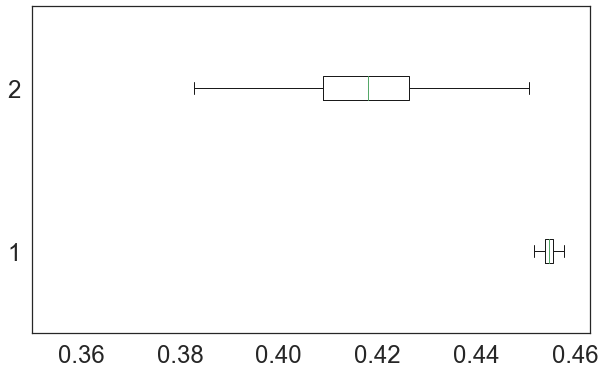

In [851]:
sns.set(style="white",context='poster',font_scale=1.5)
f, ax = plt.subplots(figsize=(10, 6))


plt.boxplot([samples_spec[0:6,:,50:],samples_spec[6:12,:,50:]],vert=False)
#plt.ylim(0.3,0.5)
#plt.plot(np.mean(samples_spec,axis=1))

In [871]:
np.std(slow_spec_means)

0.00031646652580697565

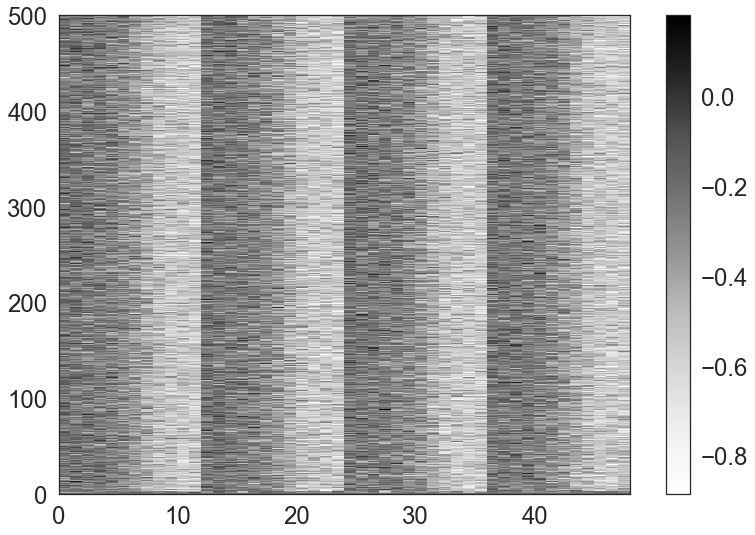

In [889]:
plt.pcolor(diverse_res[0]['weights_inh_rec'])
plt.colorbar()

In [37]:
import launch_RF_net_multiproc

RF_results = launch_RF_net_multiproc.consolidate_distrib_results('/home/ysweeney/CNL-brain1/data/topdown_learning/RF_net_runs/37/RF_net_N_500_10_ori_groups_scaling_rate_2p5x_target_500_T_50k_sample_res_10_1',5,False)

#RF_results = launch_RF_net_multiproc.consolidate_distrib_results('/mnt/DATA/ysweeney/data/topdown_learning/RF_net_runs/91/RF_net_N_250_10_ori_groups_scaling_rate_2p5x_target_375_T_100k_sample_res_5_eta1base_2p0e-5_uniform_prune_thresh_1_bimodal_alpha_OU_sigma_5p0',15,False)
#RF_results = launch_RF_net_multiproc.consolidate_distrib_results('/mnt/DATA/ysweeney/data/topdown_learning/RF_net_runs/126/RF_net_N_100_scaling_rate_2p5x_target_1p5N_T_400k_sample_res_10_eta_4e-5_simple_RFstruct_dense_0.pkl',15,False)
#RF_results = launch_RF_net_multiproc.consolidate_distrib_results('/home/ysweeney/CNL-brain1/data/topdown_learning/RF_net_runs/51/RF_net_N_500_10_ori_groups_scaling_rate_2p5x_target_750_T_100k_sample_res_5_eta1base_2p5e-5_uniform_pruning',15,False)

KeyError: 'selectivities_results_uncorr'

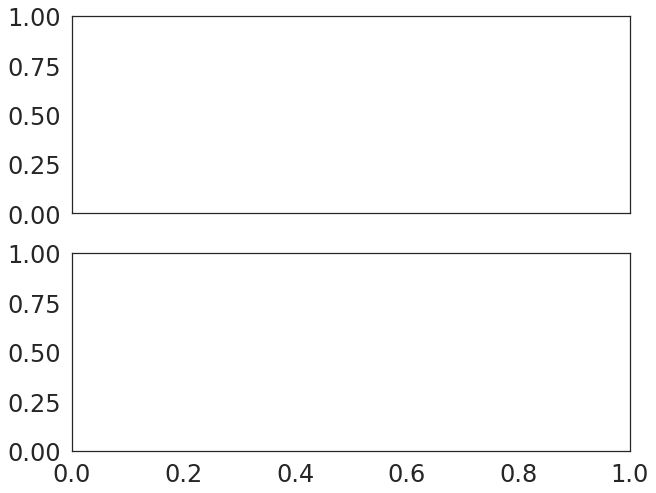

In [408]:
save_fig=False
num_exps = len(RF_results)

f, ax = plt.subplots(2,1,figsize=(10, 8),sharex=True)
#ax_2 = ax.twinx()

sns.set_color_codes("deep")
sns.set(style="white",context='poster',font_scale=1.5)

#ax.hist([[RF_results[i]['selectivities_results_corr'][0]['pop_coupling_partial_rval'] for i in xrange(num_exps)],[RF_results[i]['selectivities_results_uncorr'][0]['pop_coupling_partial_rval'] for i in xrange(num_exps)],[RF_results[i]['selectivities_results_anticorr'][0]['pop_coupling_partial_rval'] for i in xrange(num_exps)]],8,color=['r','b','c'])#,histtype='step',lw=4)
#plt.hist([[RF_results[i]['selectivities_results_corr'][0]['pop_coupling_partial_rval'] for i in xrange(num_exps)],[RF_results[i]['selectivities_results_uncorr'][0]['pop_coupling_partial_rval'] for i in xrange(num_exps)],[RF_results[i]['selectivities_results_anticorr'][0]['pop_coupling_partial_rval'] for i in xrange(num_exps)]],8,color=['r','b','c'])#,histtype='step',lw=4)

rval_corr =np.array([RF_results[i]['selectivities_results_corr'][0]['pop_coupling_partial_rval'] for i in xrange(num_exps)])
rval_uncorr =np.array([RF_results[i]['selectivities_results_uncorr'][0]['pop_coupling_partial_rval'] for i in xrange(num_exps)])
rval_anticorr =np.array([RF_results[i]['selectivities_results_uniform'][0]['pop_coupling_partial_rval'] for i in xrange(num_exps)])
pval_corr =np.array([RF_results[i]['selectivities_results_corr'][0]['pop_coupling_partial_pval'] for i in xrange(num_exps)])
pval_uncorr =np.array([RF_results[i]['selectivities_results_uncorr'][0]['pop_coupling_partial_pval'] for i in xrange(num_exps)])
pval_anticorr =np.array([RF_results[i]['selectivities_results_uniform'][0]['pop_coupling_partial_pval'] for i in xrange(num_exps)])


#ax.boxplot([rval_corr[pval_corr<0.01],rval_uncorr[pval_uncorr<0.01],rval_anticorr[pval_anticorr<0.01]],positions=range(0,9,3))#,histtype='step',lw=4)
ax[1].bar(range(0,6,2),(1.0/40)*np.array([len(rval_corr[pval_corr<0.01]),len(rval_uncorr[pval_uncorr<0.01]),len(rval_anticorr[pval_anticorr<0.01])]),width=0.9,color=['r','b','c'])#,hatch="+") #,histtype='step',lw=4)
ax[0].bar(range(0,6,2),[np.mean(rval_corr[pval_corr<0.01]),np.mean(rval_uncorr[pval_uncorr<0.01]),np.mean(rval_anticorr[pval_anticorr<0.01])],width=0.9,color=['r','b','c'])#,hatch='/')#,histtype='step',lw=4)

#plt.figure()
#plt.scatter([RF_results[i]['selectivities_results_corr'][0]['pop_coupling_partial_rval'] for i in xrange(num_exps)],[RF_results[i]['selectivities_results_corr'][0]['pop_coupling_partial_pval'] for i in xrange(num_exps)])
#plt.scatter([RF_results[i]['selectivities_results_uncorr'][0]['pop_coupling_partial_rval'] for i in xrange(num_exps)],[RF_results[i]['selectivities_results_uncorr'][0]['pop_coupling_partial_pval'] for i in xrange(num_exps)])
#plt.scatter([RF_results[i]['selectivities_results_anticorr'][0]['pop_coupling_partial_rval'] for i in xrange(num_exps)],[RF_results[i]['selectivities_results_anticorr'][0]['pop_coupling_partial_pval'] for i in xrange(num_exps)])
#plt.ylim(0,0.1)

#ax[0].set_ylabel('Strength significant correlations')
#ax[1].set_ylabel('Ratio significant correlations',color='gray')
#ax.legend(['alpha  ~ aPC','independent alpha','alpha  ~ 1/aPC'])
#ax[0].set_ylim(-0.2,0.5)
#ax[1].set_yticks([0.0,0.5])

#ax_2.set_ylim(-0.2,1.0)
#ax_2.set_yticks([0.0,0.5,1.0])
#ax_2.set_yticklabels([0.0,0.5,1.0],color='gray')

ax[0].set_xticks([0,2,4])
ax[1].set_xticks([0,2,4])

#ax[1].set_xticklabels(['alpha ~ aPC','alpha independent','alpha ~ 1.0/(aPC)'],fontdict={'fontsize':20},rotation=45)
ax[1].set_xticklabels([])

ax[0].get_xaxis().set_visible(False)

sns.despine(left=False, bottom=False)

plt.tight_layout()

if save_fig:
    tikz_save('manuscript/figures/RF_rvals.tex',
           figureheight = '\\figureheight',
           figurewidth = '\\figurewidth')
    plt.savefig('manuscript/figures/RF_rvals.pdf')

ValueError: color kwarg must have one color per dataset

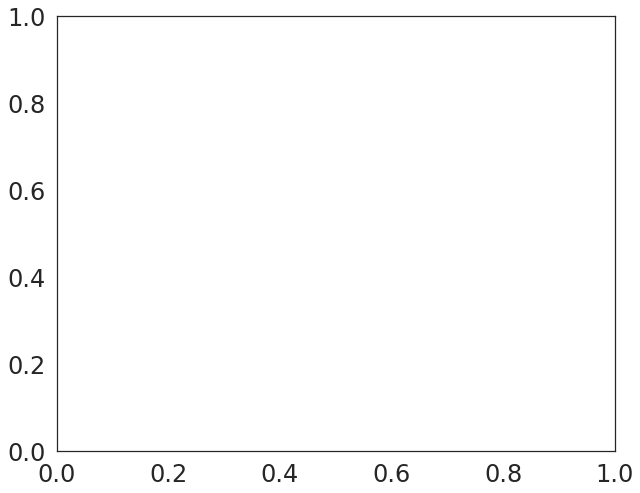

In [743]:
save_fig=False
num_exps = len(RF_results)

f, ax = plt.subplots(figsize=(10, 8))

sns.set_color_codes("deep")
sns.set(style="white",context='poster',font_scale=1.5)

#ax.hist([[RF_results[i]['selectivities_results_corr'][0]['pop_coupling_partial_rval'] for i in xrange(num_exps)],[RF_results[i]['selectivities_results_uniform'][0]['pop_coupling_partial_rval'] for i in xrange(num_exps)],[RF_results[i]['selectivities_results_anticorr'][0]['pop_coupling_partial_rval'] for i in xrange(num_exps)]],8,color=['r','b','c'])#,histtype='step',lw=4)
ax.hist([[RF_results[i]['selectivities_results_corr'][0]['pop_coupling_partial_rval'] for i in xrange(num_exps)],[RF_results[i]['selectivities_results_uniform'][0]['pop_coupling_partial_rval'] for i in xrange(num_exps)]],8,color=['b','r'])#,histtype='step',lw=4)

ax.legend(['alpha  ~ aPC','independent alpha','alpha  ~ 1/aPC'])

sns.despine(left=False, bottom=False)

plt.tight_layout()

if save_fig:
    tikz_save('manuscript/figures/RF_rvals_hist.tex',
           figureheight = '\\figureheight',
           figurewidth = '\\figurewidth')
    plt.savefig('manuscript/figures/RF_rvals_hist.pdf')

In [39]:
#RF_result = py_scripts_yann.load_pickle('/home/ysweeney/CNL-brain1/data/topdown_learning/RF_net_runs/37/RF_net_N_500_10_ori_groups_scaling_rate_2p5x_target_500_T_50k_sample_res_10_0.pkl')

import json
json_data=open('/mnt/DATA/ysweeney/data/topdown_learning/RF_net_runs/72/config.json').read()
RF_sim_pars = json.loads(json_data)['sim_pars']

IOError: [Errno 2] No such file or directory: '/mnt/DATA/ysweeney/data/topdown_learning/RF_net_runs/72/config.json'

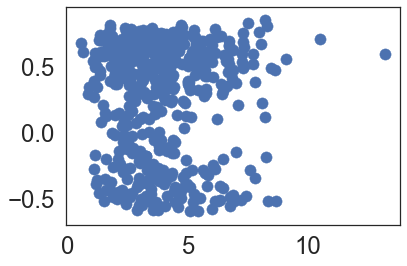

array([-0.05257388,  0.15588917,  0.60510368,  0.5112817 ,  0.62401656,
        0.1703858 ,  0.67217483,  0.09117585, -0.19925297,  0.39562568,
        0.7608415 , -0.27348126,  0.60233647,  0.31927314,  0.71112767,
       -0.49506336,  0.61602123,  0.66887706,  0.34758354,  0.7852567 ,
        0.85632948,  0.48756743,  0.71818433, -0.15082375,  0.25026061,
        0.45605559,  0.78977991, -0.27737828,  0.67147201,  0.49587794,
        0.73409937,  0.6335764 ,  0.73155664, -0.34596295,  0.55691055,
        0.53755171,  0.58726167,  0.52913586,  0.65765826, -0.47609816,
        0.68648762,  0.72738382,  0.47824947,  0.62947203, -0.02275737,
       -0.50433161, -0.55851945,  0.2474336 ,  0.34938435,  0.60973798,
        0.69050728, -0.1453051 ,  0.70427656,  0.40101905,  0.10573931,
        0.65204027,  0.75575416, -0.4917762 ,  0.73505932,  0.75637085,
       -0.06578906,  0.33172107,  0.78226962,  0.61339027, -0.24352445,
        0.7345993 ,  0.24322542, -0.48297803,  0.19649914,  0.70

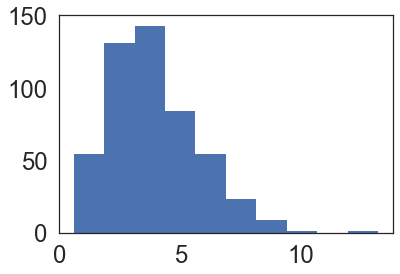

In [53]:
plt.scatter(RF_result['networks'][0].pop_coupling,RF_result['selectivities_results_uncorr'][0]['empirical_pop_coupling'])
plt.show()
plt.hist(RF_result['networks'][0].pop_coupling)
RF_result['selectivities_results_uncorr'][0]['empirical_pop_coupling']

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be

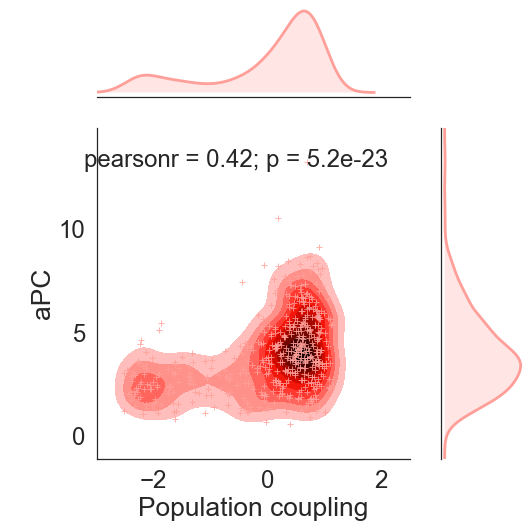

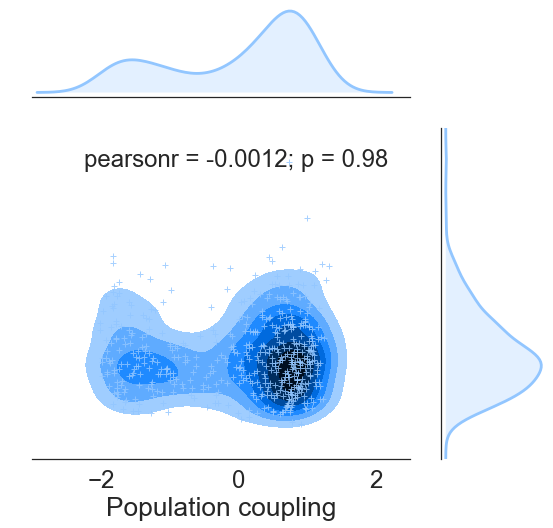

In [1139]:
save_fig=True


sns.set_color_codes("pastel")

g = sns.jointplot(scipy.stats.zscore(RF_result['selectivities_results_corr'][0]['empirical_pop_coupling']),RF_result['networks'][0].pop_coupling,size=8,ratio=3,color='r',kind='kde',xlim=(-3.0,2.5))
g.plot_joint(plt.scatter, c="r", s=30, linewidth=1, marker="+",alpha=0.8)
#sns.kdeplot(scipy.stats.zscore(RF_result['selectivities_results_corr'][0]['empirical_pop_coupling']),RF_result['networks'][0].pop_coupling,n_levels=10, ax=g.ax_joint);
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels(xlabel='Population coupling', ylabel='aPC')

#g.ax_marg_y.set_visible(False)

plt.tight_layout()
if save_fig:
    tikz_save('manuscript/figures/uncorr_link.tex',
           figureheight = '\\figureheight',
           figurewidth = '\\figurewidth')
    plt.savefig('manuscript/figures/corr_link.pdf')


g = sns.jointplot(scipy.stats.zscore(RF_result['selectivities_results_uncorr'][0]['empirical_pop_coupling']),RF_result['networks'][0].pop_coupling,size=8,ratio=3,color='b',kind='kde',xlim=(-3.0,2.5))
g.plot_joint(plt.scatter, c="b", s=30, linewidth=1, marker="+",alpha=0.8)
#g.ax_marg_y.hist(RF_result['networks'][0].pop_coupling, bins=np.arange(0, 60),orientation='horizontal')
#g.plot_marginals(sns.kdeplot,color="black",ax=g.ax_marg_x,shade=True)
#sns.kdeplot(scipy.stats.zscore(RF_result['selectivities_results_corr'][0]['empirical_pop_coupling']),RF_result['networks'][0].pop_coupling,n_levels=10, ax=g.ax_joint);
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels(xlabel='Population coupling', ylabel='')
#g.ax_marg_y.set_visible(False)
#g2 = g.plot_marginals(sns.kdeplot,color="black", shade=True)#,marginal_kws={'color':'black'},shade=True)
#g2.ax_marg_x.set_visible(False)

g.ax_joint.set_yticklabels([])
g.ax_joint.spines['left'].set_visible(False)

plt.tight_layout()
if save_fig:
    tikz_save('manuscript/figures/uncorr_link.tex',
           figureheight = '\\figureheight',
           figurewidth = '\\figurewidth')
    plt.savefig('manuscript/figures/uncorr_link.pdf')

In [42]:
import run_RF_net

import json
json_data=open('/home/ysweeney/CNL-brain3/data/topdown_learning/RF_net_runs/136/config.json').read()
RF_sim_pars = json.loads(json_data)['sim_pars']

RF_sim_pars['OU_global'] = 0.0
net_i = RF_results[0]['networks'][0]
net_i.W_conn = np.ones((100,100))
simresults_static = run_RF_net.run_RF_net(net_i,RF_sim_pars,'corr',10000,1,True)
selectivities_results_static = run_RF_net.analyse_RF_net_run_ori_group(simresults_static,net_i)

partial correlation
SpearmanrResult(correlation=0.098033000132000531, pvalue=0.028388174899655942)


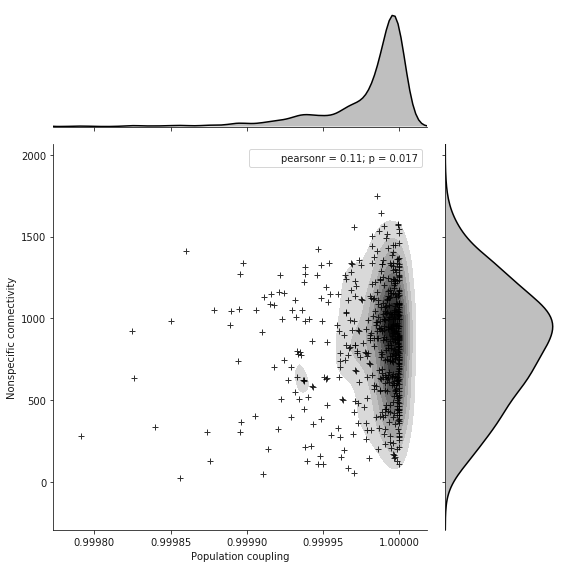

In [43]:
save_fig=False

sns.set_color_codes("pastel")

g = sns.jointplot((selectivities_results_static['empirical_pop_coupling']),np.sum(net_i.W,axis=1),size=8,ratio=3,color='black',kind='kde')#,xlim=(-3.0,2.5))
g.plot_joint(plt.scatter, c="black", s=30, linewidth=1, marker="+",alpha=0.8)
#sns.kdeplot(scipy.stats.zscore(RF_result['selectivities_results_corr'][0]['empirical_pop_coupling']),RF_result['networks'][0].pop_coupling,n_levels=10, ax=g.ax_joint);
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels(xlabel='Population coupling', ylabel='Nonspecific connectivity')

#g.ax_marg_y.set_visible(False)

plt.tight_layout()
if save_fig:
    tikz_save('manuscript/figures/uncorr_link.tex',
           figureheight = '\\figureheight',
           figurewidth = '\\figurewidth')
    plt.savefig('manuscript/figures/static_link.pdf')

In [1028]:
import json
json_data=open('/home/ysweeney/CNL-brain1/data/topdown_learning/RF_net_runs/37/config.json').read()

data = json.loads(json_data)

In [1145]:
RFs = net_i.filters

In [1530]:
RF_result_run = py_scripts_yann.load_pickle('/home/ysweeney/CNL-brain3/data/topdown_learning/RF_net_runs/26/RF_net_N_500_10_ori_groups_scaling_rate_2p5x_target_500_T_50k_sample_res_10_eta_p02_0.pkl')           

MemoryError: 

In [263]:
#plt.imshow(RFs[299][0])
#sns.despine(left=True,bottom=True)
#plt.xticks([])
#plt.yticks([])

p_c = np.zeros((len(RFs),len(RFs)))

corrs = []

def corr2(a,b):
    a = a - mean2(a)
    b = b - mean2(b)

    r = (a*b).sum() / math.sqrt((a*a).sum() * (b*b).sum());
    return r

def mean2(x):
    y = np.sum(x) / np.size(x);
    return y

def gabor_function(A,theta,phi,f,sigma_x,sigma_y,c_x,c_y,x_coords,y_coords):
    x_p = (x_coords-c_x)*np.cos(theta)-(y_coords-c_y)*np.sin(theta)
    y_p = (x_coords-c_x)*np.sin(theta)+(y_coords-c_y)*np.cos(theta)
    
    G = A*np.exp(-1*(x_p**2)/(2*sigma_x**2) -  (y_p**2)/(2*sigma_y**2) )*np.cos(2*np.pi*f*x_p + phi)
    
    return G

pop_coupling = net_i.pop_coupling
pop_coupling_add_factor = 0.002
pop_coupling_mult_factor = 1.0

W = np.zeros((len(RFs),len(RFs)))


RFs = []
kernel_params = []

x_coords,y_coords = np.meshgrid(np.arange(0.0,1.0,0.02),np.arange(0.0,1.0,0.02))
A = 1.0

N_filters = 500
N_per_group = 10

theta_list = np.linspace(0.0,np.pi-np.pi/10,int(N_filters/N_per_group))

for i in xrange(int(N_filters/N_per_group)):
    s = np.random.uniform(1,4)
    frequency = 2.0 #np.random.uniform(1.25*s)
    sigma = 2.0#0.2/s
    c_x =   np.random.uniform(0.35,0.65)
    c_y =   np.random.uniform(0.35,0.65)
    #kernel = gabor_kernel(frequency, theta=theta,offset=phi,sigma_x=sigma,sigma_y=sigma)

        # Save kernel and the power image for each image
    #results.append((kernel, [power(img, kernel) for img in images]))
    for j in xrange(N_per_group):
        #theta = np.random.uniform(0,2*np.pi) #
        theta = theta_list[i] + np.random.uniform(-0.7,0.7)
        phi = np.random.uniform(0,2*np.pi)
        kernel = gabor_function(A,theta,phi,frequency,sigma,sigma,c_x,c_y,x_coords,y_coords)
        params = 'theta=%d,\nfrequency=%.2f' % (theta * 180 / np.pi, frequency)
        kernel_params.append(params)
        RFs.append((kernel, []))

import itertools
for i,j in itertools.combinations(range(len(RFs)),2):
    #c = np.mean(signal.correlate2d(np.real(results[i][0]),np.real(results[j][0])))
    c = corr2((RFs[i][0]),(RFs[j][0]))
    #c = np.corrcoef(np.real(results[i][0]),np.real(results[j][0]))
    corrs.append(c)
   
    p_c[i,j] = pop_coupling_mult_factor*(0.55*c*c +0.22*c +0.064) #+ pop_coupling_add_factor*pop_coupling[j]
    p_c[j,i] = pop_coupling_mult_factor*(0.55*c*c +0.22*c +0.064) #+ pop_coupling_add_factor*pop_coupling[i]
    
    #if pop_coupling_mult_factor*(p_c[i,j] + pop_coupling_add_factor*pop_coupling[j]) > np.random.uniform(0,1.0):
    if p_c[i,j] > np.random.uniform(0,1.0):
        W[i,j] = 0.28*np.exp(2.5*c)
    elif pop_coupling_add_factor*pop_coupling[j] > np.random.uniform(0,1.0):
        #W[i,j] = 0.28*np.exp(2.5*np.random.uniform(-1.0,1.0))
        W[i,j] = 0.28*np.exp(2.5*np.random.normal(0,0.2))
    #if pop_coupling_mult_factor*(p_c[j,i] + pop_coupling_add_factor*pop_coupling[i]) > np.random.uniform(0,1.0):
    if p_c[j,i] > np.random.uniform(0,1.0):
        W[j,i] = 0.28*np.exp(2.5*c)
    elif pop_coupling_add_factor*pop_coupling[i] > np.random.uniform(0,1.0):
        #W[j,i] = 0.28*np.exp(2.5*np.random.uniform(-1.0,1.0))
        W[j,i] = 0.28*np.exp(2.5*np.random.normal(0,0.2))



NameError: name 'W' is not defined

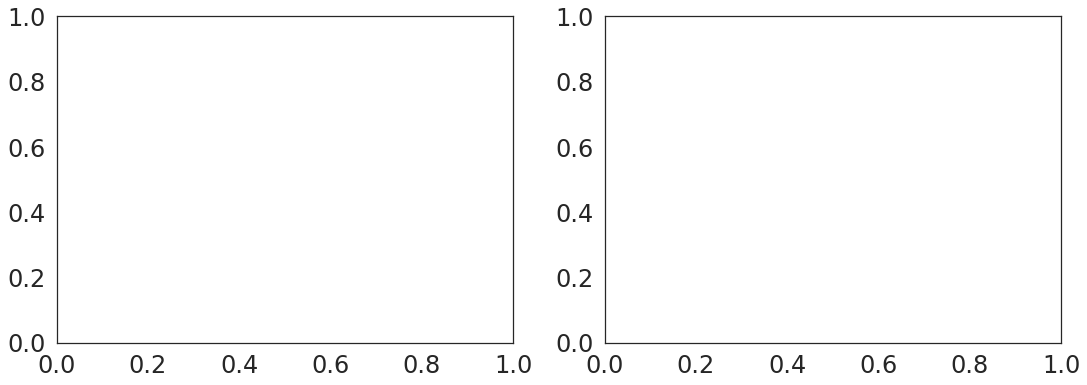

In [262]:
save_fig=False

sns.set(style="white",context='poster',font_scale=1.5)
f, ax = plt.subplots(1,2,figsize=(18, 6))

ax[1].hist(W[W>0].flatten(),25,normed=True,color='black');
ax[0].hist(corrs,50,normed=True,color='black');

ax[1].set(ylabel='PDF',xlabel='Synaptic weight')
ax[0].set(ylabel='PDF',xlabel='Receptive field correlation')

sns.despine()

plt.tight_layout()
if save_fig:
    tikz_save('manuscript/figures/RF_stats.tex',
           figureheight = '\\figureheight',
           figurewidth = '\\figurewidth')
    plt.savefig('manuscript/figures/RF_stats.pdf')

In [1501]:
#RF_result_run = py_scripts_yann.load_pickle('/home/ysweeney/CNL-brain3/data/topdown_learning/RF_net_runs/22/RF_net_N_500_10_ori_groups_scaling_rate_2p5x_target_500_T_50k_sample_res_10_eta1base_5e-6_0.pkl')               
RFs = RF_result_run['networks'][0].filters

p_c = np.zeros((len(RFs),len(RFs)))

for i,j in itertools.combinations(range(len(RFs)),2):
    c = corr2((RFs[i][0]),(RFs[j][0]))

    p_c[i,j] = pop_coupling_mult_factor*(0.55*c*c +0.22*c +0.064) #+ pop_coupling_add_factor*pop_coupling[j]
    p_c[j,i] = pop_coupling_mult_factor*(0.55*c*c +0.22*c +0.064) #+ pop_coupling_add_factor*pop_coupling[i]

plt.plot(RF_result_run['simresults_uniform']['W_t'][:,24,20:30],'black')
plt.plot(RF_result_run['simresults_uniform']['W_t'][:,20,40:50],'gray')

KeyError: 'simresults_uniform'

In [740]:
import pandas as pd

simres_string = 'simresults_corr'


T = RF_results[0][simres_string][0]['W_t'].shape[0]
t = np.arange(T)

window_len = 1
N_samples = 50

D_nonsp = np.zeros((N_samples,T))
D_sp = np.zeros((N_samples,T))
D_IE = np.zeros((N_samples,T))

for i in xrange(N_samples):
    D_nonsp[i] = pd.rolling_mean(pd.Series(RF_results[0][simres_string][0]['W_t'][:,60,20+i],t),window_len)
    D_sp[i] = pd.rolling_mean(pd.Series(RF_results[0][simres_string][0]['W_t'][:,20,30+i],t),window_len)
    D_IE[i] = pd.rolling_mean(pd.Series(RF_results[0][simres_string][0]['W_IE_t'][:,20+i],t),window_len)

plt.plot(np.transpose(D_nonsp),'black');
plt.plot(np.transpose(D_sp),'gray');
plt.plot(-1.0*np.transpose(D_IE),'green');


IndexError: list index out of range

In [699]:
#spec_unif = RF_result_run['simresults_uniform']['W_t'][-1,:,:][p_c>0.1][RF_result_run['simresults_uniform']['W_t'][-1,:,:][p_c>0.1]>0]
#nonspec_unif = RF_result_run['simresults_uniform']['W_t'][-1,:,:][p_c<0.1][RF_result_run['simresults_uniform']['W_t'][-1,:,:][p_c<0.1]>0]

#plt.boxplot([spec_unif,nonspec_unif])

net_idx = 0
simres_string = 'simresults_anticorr'


RFs = RF_results[net_idx]['networks'][0].filters

p_c = np.zeros((len(RFs),len(RFs)))

for i,j in itertools.combinations(range(len(RFs)),2):
    c = corr2((RFs[i][0]),(RFs[j][0]))

    p_c[i,j] = pop_coupling_mult_factor*(0.55*c*c +0.22*c +0.064) #+ pop_coupling_add_factor*pop_coupling[j]
    p_c[j,i] = pop_coupling_mult_factor*(0.55*c*c +0.22*c +0.064) #+ pop_coupling_add_factor*pop_coupling[i]

#plt.plot(RF_result_run['simresults_uniform']['W_t'][:,24,20:30],'black')
#plt.plot(RF_result_run['simresults_uniform']['W_t'][:,20,40:50],'gray')
spec_unif = RF_results[net_idx][simres_string]['W_t'][3,:,:][p_c>0.4]
nonspec_unif = RF_results[net_idx][simres_string]['W_t'][3,:,:][p_c<0.05]
spec_unif = spec_unif[spec_unif>0]
nonspec_unif = nonspec_unif[nonspec_unif>0]
plt.hist([spec_unif,nonspec_unif],normed=True)
spec_unif = RF_results[net_idx][simres_string]['W_t'][-1,:,:][p_c>0.4]
nonspec_unif = RF_results[net_idx][simres_string]['W_t'][-1,:,:][p_c<0.05]
spec_unif = spec_unif[spec_unif>0]
nonspec_unif = nonspec_unif[nonspec_unif>0]
plt.hist([spec_unif,nonspec_unif],normed=True)

spec_unif = RF_results[net_idx][simres_string]['W_t'][0,:,:][p_c>0.4]
nonspec_unif = RF_results[net_idx][simres_string]['W_t'][0,:,:][p_c<0.05]
spec_unif = spec_unif[spec_unif>0]
nonspec_unif = nonspec_unif[nonspec_unif>0]

plt.figure()
plt.hist([spec_unif,nonspec_unif],normed=True);



KeyError: 'simresults_anticorr'

(array([  662.,   645.,   634.,   552.,   322.,   443.,   458.,   549.,
          302.,   265.,   180.,   224.,   209.,   183.,   207.,   179.,
          238.,   222.,   292.,  1241.]),
 array([  3.48819146e-05,   1.00003314e+00,   2.00003139e+00,
          3.00002965e+00,   4.00002791e+00,   5.00002616e+00,
          6.00002442e+00,   7.00002267e+00,   8.00002093e+00,
          9.00001919e+00,   1.00000174e+01,   1.10000157e+01,
          1.20000140e+01,   1.30000122e+01,   1.40000105e+01,
          1.50000087e+01,   1.60000070e+01,   1.70000052e+01,
          1.80000035e+01,   1.90000017e+01,   2.00000000e+01]),
 <a list of 20 Patch objects>)

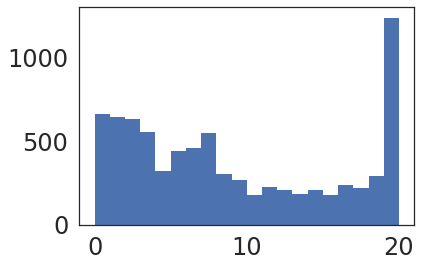

In [700]:
plt.hist(RF_results[0]['W_corr'][RF_results[0]['W_corr']>0].flatten(),20)
#plt.hist(RF_results[0]['W_anticorr'][RF_results[0]['W_anticorr']>0].flatten())
#plt.hist(RF_results[0]['W_uniform'][RF_results[0]['W_uniform']>0].flatten())

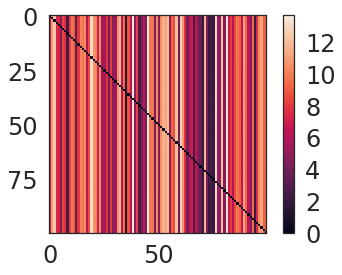

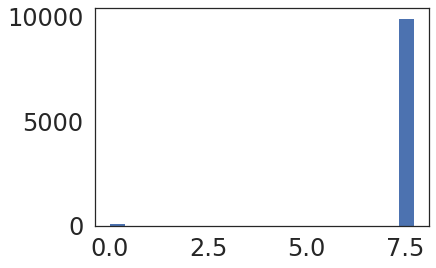

In [732]:
plt.imshow(RF_results[2]['simresults_corr'][0]['W_plastic'])
plt.colorbar()
plt.show()

plt.hist(RF_results[2]['simresults_uniform'][0]['W_plastic'].flatten(),20);

ZeroDivisionError: float division by zero

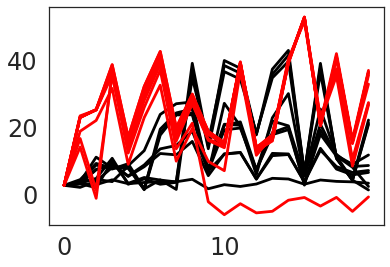

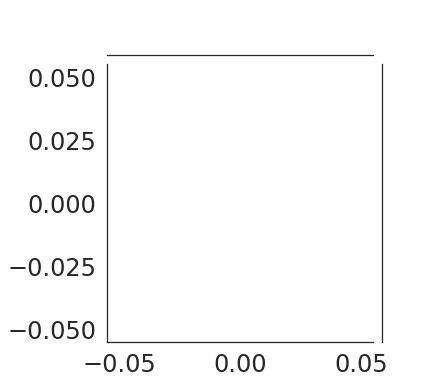

In [724]:
net_idx = 7

plt.plot(RF_results[net_idx]['selectivities_t_corr'][:,10:20],color='black')
#plt.plot(RF_results[0]['selectivities_t_anticorr'][:,10:20],color='gray')
#plt.plot(RF_results[0]['selectivities_t_uncorr'][:,10:20],color='blue')
plt.plot(RF_results[net_idx]['selectivities_t_uniform'][:,10:20],color='red')

plt.figure()
sns.jointplot(np.std(RF_results[net_idx]['selectivities_t_corr'][20:,],axis=0),RF_results[net_idx]['selectivities_results_corr'][0]['empirical_pop_coupling'])
plt.figure()
sns.jointplot(np.std(RF_results[net_idx]['selectivities_t_uniform'][20:,],axis=0),RF_results[net_idx]['selectivities_results_uniform'][0]['empirical_pop_coupling'])


plt.figure()
sns.jointplot(np.mean(RF_results[net_idx]['selectivities_t_corr'][20:,],axis=0),RF_results[net_idx]['selectivities_results_corr'][0]['empirical_pop_coupling'])
plt.figure()
sns.jointplot(np.mean(RF_results[net_idx]['selectivities_t_uniform'][20:,],axis=0),RF_results[net_idx]['selectivities_results_uniform'][0]['empirical_pop_coupling'])


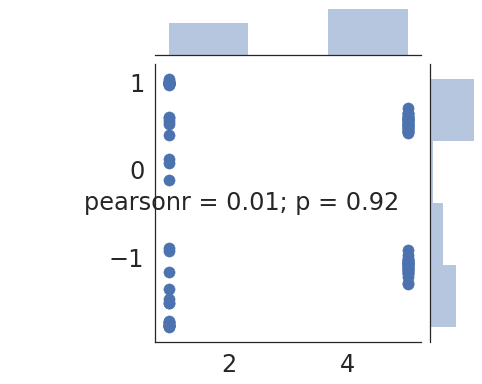

In [151]:
sns.jointplot(RF_results[5]['networks'][0].pop_coupling,RF_results[5]['selectivities_t_corr'][-1,:])
plt.show()
#plt.hist(RF_results[0]['selectivities_results_uniform'][0]['empirical_pop_coupling'])
#plt.hist(RF_results[0]['selectivities_results_corr'][0]['empirical_pop_coupling'])


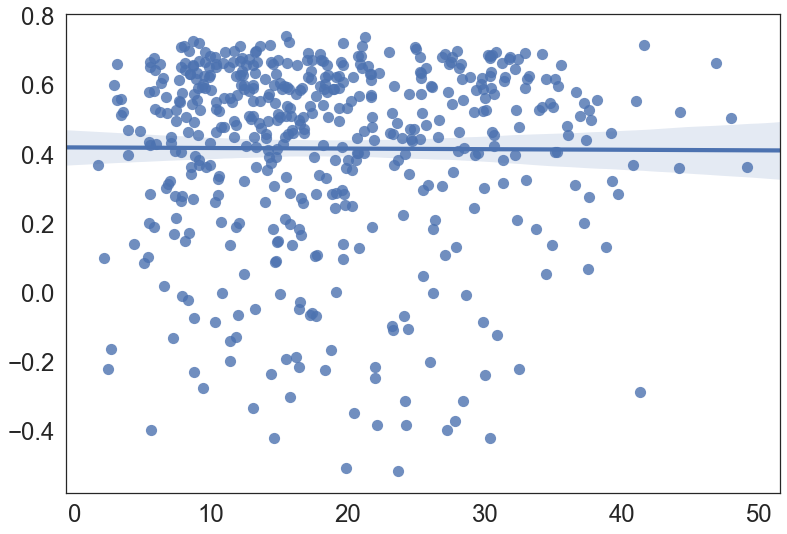

In [1839]:
sns.regplot(RF_results[0]['selectivities_t_anticorr'][-1,:],RF_results[0]['selectivities_results_anticorr'][0]['empirical_pop_coupling'])
#print scipy.stats(RF_results[0]['selectivities_t_corr'][-1,:],RF_results[0]['networks'][0].pop_coupling)

In [628]:
plt.hist([RF_results[net_idx]['simresults_corr']['W_t'][t_idx,:,:].flatten() for t_idx in [2,5,10,15,19]],range=(0.1,20))


TypeError: list indices must be integers, not str

(array([ 1.,  1.,  4.,  1.,  0.,  0.,  3.,  1.,  2.,  2.]),
 array([ 0.25033897,  0.31678493,  0.38323088,  0.44967684,  0.5161228 ,
         0.58256876,  0.64901471,  0.71546067,  0.78190663,  0.84835258,
         0.91479854]),
 <a list of 10 Patch objects>)

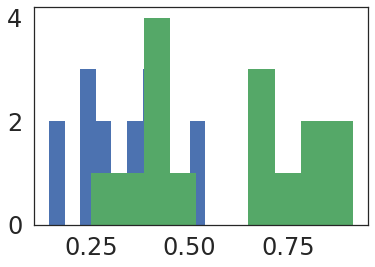

In [725]:
plt.hist([np.std(RF_results[x]['selectivities_results_corr'][0]['empirical_pop_coupling']) for x in xrange(15)])
plt.hist([np.std(RF_results[x]['selectivities_results_uniform'][0]['empirical_pop_coupling']) for x in xrange(15)])

In [475]:
np.mean(RF_results[7]['simresults_corr'][0]['W_conn'])

0.14468800000000001

In [702]:
net_idx = 8
RFs = RF_results[net_idx]['networks'][0].filters

corrs = np.zeros((len(RFs),len(RFs)))

for i,j in itertools.combinations(range(len(RFs)),2):
    corrs[i,j] = corr2((RFs[i][0]),(RFs[j][0]))
    corrs[j,i] = corrs[i,j]

4.60091648033
4.33113756804


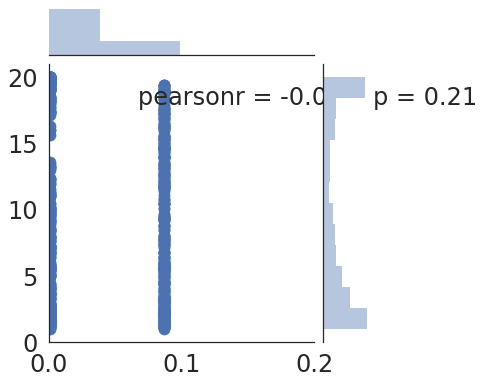

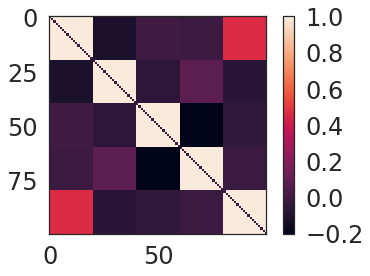

In [726]:
sns.jointplot(corrs.flatten()[RF_results[net_idx]['simresults_corr'][0]['W_t'][-1,:,:].flatten()>1.0],RF_results[net_idx]['simresults_corr'][0]['W_t'][-1,:,:].flatten()[RF_results[net_idx]['simresults_corr'][0]['W_t'][-1,:,:].flatten()>1.0],xlim=(0.0,0.2))
print np.mean(RF_results[net_idx]['simresults_corr'][0]['W_plastic'][corrs>0.2])
print np.mean(RF_results[net_idx]['simresults_corr'][0]['W_plastic'][corrs<-0.0])

plt.figure()
plt.imshow(corrs)
plt.colorbar()

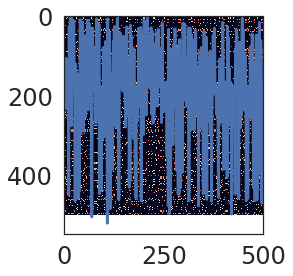

In [49]:
plt.imshow(RF_results[net_idx]['simresults_corr']['W_plastic'])
plt.plot(100*np.mean(RF_results[net_idx]['simresults_corr']['W_plastic'],axis=1))

In [326]:
net_idx = 6
plt.hist([np.sum(RF_results[net_idx]['simresults_corr']['W_conn'],axis=0),np.sum(RF_results[net_idx]['simresults_uniform']['W_conn'],axis=0)],20,normed=True);

sns.jointplot(RF_results[net_idx]['selectivities_results_corr'][0]['empirical_pop_coupling'],np.mean(RF_results[net_idx]['simresults_corr']['W_conn'],axis=0),kind='hexbin')
sns.jointplot(RF_results[net_idx]['selectivities_results_uniform'][0]['empirical_pop_coupling'],np.mean(RF_results[net_idx]['simresults_uniform']['W_conn'],axis=0),kind='hexbin')


TypeError: list indices must be integers, not str

diverse link (-0.16842369169781296, 0.093924321640976804)
uniform link (0.20270454477190655, 0.043113418381940313)
diverse width 3.7027581803
uniform width 1.18040138606
diverse link (0.20735526788070269, 0.038448738574978596)
uniform link (0.96524287226344574, 6.4388764888583615e-59)
diverse width 1.37100078121
uniform width 1.57268705489
high unif  0.428435493325
low unif  0.574146676111
high diverse  0.796704532843
low diverse 0.587543864534


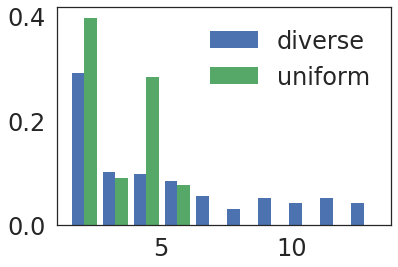

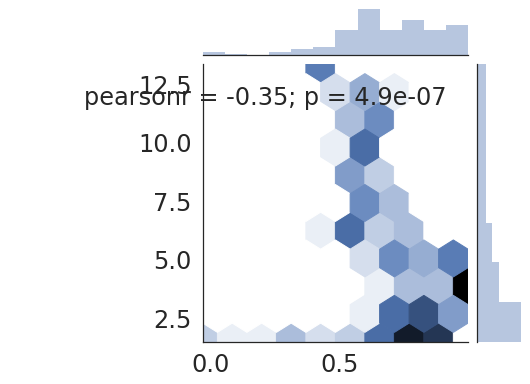

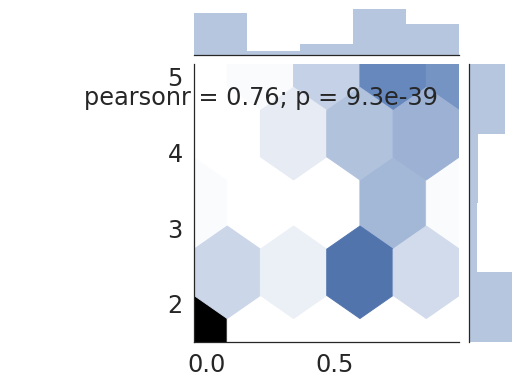

In [709]:
from scipy import stats
net_idx = 8

uniform_connprob = []
corr_connprob = []
corr_pc = []
uniform_pc = []

for net_idx in xrange(len(RF_results)):
    uniform_connprob.append(np.mean(RF_results[net_idx]['simresults_uniform'][0]['W_plastic'],axis=0))
    uniform_pc.append(RF_results[net_idx]['selectivities_results_uniform'][0]['empirical_pop_coupling'])

    #if RF_results[net_idx]['selectivities_results_corr'][0]['pop_coupling_partial_rval']>0.3:
    corr_connprob.append(np.mean(RF_results[net_idx]['simresults_corr'][0]['W_plastic'],axis=0))
    corr_pc.append(RF_results[net_idx]['selectivities_results_corr'][0]['empirical_pop_coupling'])
    
    print 'diverse link', stats.pearsonr(corr_pc[-1],corr_connprob[-1])
    print 'uniform link', stats.pearsonr(uniform_pc[-1],uniform_connprob[-1])
    print 'diverse width', np.std(corr_connprob[-1])
    print 'uniform width', np.std(uniform_connprob[-1])

plt.hist([corr_connprob,uniform_connprob],10,normed=True);
plt.legend(['diverse','uniform'])

sns.jointplot(np.array(corr_pc).flatten(),np.array(corr_connprob).flatten(),kind='hexbin')#,ylim=(0.0,0.4))
sns.jointplot(np.array(uniform_pc).flatten(),np.array(uniform_connprob).flatten(),kind='hexbin')#,ylim=(0.0,0.4))

print 'high unif ' ,np.mean(np.array(uniform_pc[uniform_connprob>0.2]))
print 'low unif ' ,np.mean(np.array(uniform_pc[uniform_connprob<0.2]))

print 'high diverse ' ,np.mean(np.array(corr_pc[corr_connprob>0.2]))
print 'low diverse' ,np.mean(np.array(corr_pc[corr_connprob<0.2]))

In [549]:
net_idx = 9
RFs = RF_results[net_idx]['networks'][0].filters
W_corr = RF_results[net_idx]['simresults_corr'][0]['W_plastic']
corrs = np.zeros((len(RFs),len(RFs)))

for i,j in itertools.combinations(range(len(RFs)),2):
    corrs[i,j] = corr2((RFs[i][0]),(RFs[j][0]))
    corrs[j,i] = corrs[i,j]


specificity = np.zeros(len(RFs))
for nrn_idx in xrange(len(RFs)):
    specificity[nrn_idx] = np.mean(W_corr[nrn_idx,np.abs(corrs[nrn_idx,:])>0.1])/(0.1+np.mean(W_corr[nrn_idx,np.abs(corrs[nrn_idx,:])<0.1]))
    
    #plt.imshow(RF_results[net_idx]['simresults_corr'][0]['W_plastic'],cmap='gray')

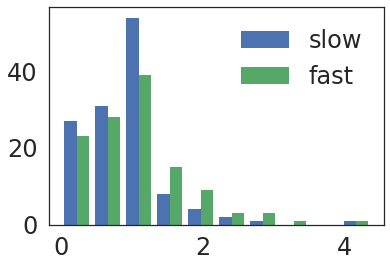

In [550]:
plt.hist([specificity[RF_results[net_idx]['networks'][0].pop_coupling<2],specificity[RF_results[net_idx]['networks'][0].pop_coupling>2]])
plt.legend(['slow','fast'])

[array([ 16.16118591,   9.27076708,  14.38267074,  13.14828827,
        15.64024645,  16.70751133,  13.21484508,  13.34263844,
        13.15841986,  13.28868501,  13.37731992,  13.6922475 ,
        13.59165612,  15.31538704,  11.1212091 ,  15.2257042 ,
        15.44409211,  13.30461445,  13.08772701,  12.97716437,
         9.45114321,  13.32590639,   8.95819913,  13.57695417,
        12.00287956,  13.33044203,  15.12755578,  15.51449119,
        13.37188205,  15.84116292,  16.16331541,  13.33311909,
        13.23888097,  13.65565953,  13.29316745,  11.06079389,
        15.87691447,  14.8284711 ,  14.58382043,  13.73575275,
        13.411957  ,  14.45399035,  16.27001797,  12.76177118,
        15.08798736,  13.82290633,  13.20289447,  14.29661258,
        14.22411833,  13.23191319,  12.97405558,  12.06394332,
        16.19173539,  13.26319072,  13.8853767 ,  14.3572935 ,
        15.56634031,  11.50684985,  13.15812798,  12.95218464,
        17.01539347,  12.98959787,  15.79849914,   8.6

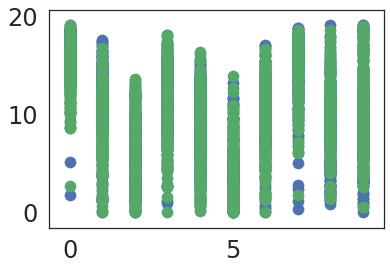

In [516]:
plt.scatter(RF_results[net_idx]['simresults_corr'][0]['presented_bar'],RF_results[net_idx]['simresults_corr'][0]['presented_bar_response'][:,0])
plt.scatter(RF_results[net_idx]['simresults_corr'][0]['presented_bar'],RF_results[net_idx]['simresults_corr'][0]['presented_bar_response'][:,2])

bars = RF_results[net_idx]['simresults_corr'][0]['presented_bar']
responses = RF_results[net_idx]['simresults_corr'][0]['presented_bar_response']

mean_responses = [np.mean(responses[bars==i],axis=0) for i in xrange(10)]
print mean_responses

In [641]:
np.histogram(uniform_connprob[0].flatten())

(array([12, 30, 52, 50, 44, 32, 14,  9,  5,  2]),
 array([ 0.12  ,  0.1324,  0.1448,  0.1572,  0.1696,  0.182 ,  0.1944,
         0.2068,  0.2192,  0.2316,  0.244 ]))

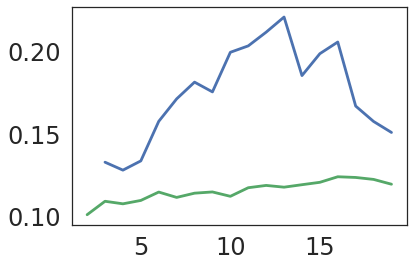

In [687]:
digit = np.digitize(np.array(corr_pc).flatten(),np.arange(-1.0,1.0,0.1))
plt.plot([np.mean(np.array(corr_connprob).flatten()[digit==i]) for i in xrange(20)])
digit = np.digitize(np.array(uniform_pc).flatten(),np.arange(-1.0,1.0,0.1))
plt.plot([np.mean(np.array(uniform_connprob).flatten()[digit==i]) for i in xrange(20)])


In [6]:
#### import glob
#ABI_results = glob.glob('/home/ysweeney/CNL-brain3/data/topdown_learning/ABI_data/analysis/*preserved_pc.pkl')
import os
data_files = os.listdir('/home/ysweeney/CNL-brain3/data/topdown_learning/ABI_data/boc/ophys_experiment_data/')

data_sets = []
for data_file in data_files:
    data_sets.append(int(data_file.partition('.')[0]))

diff_ori_dg = []
diff_tf_dg = []
mean_popcorr_diff_ori_dg_diff = []

diff_ori_sg = []
diff_sf_sg = []
mean_popcorr_diff_ori_sg_diff = []


combined_popcorr_diff_ori = []
combined_popcorr_nodiff_ori = []

combined_popcorr_diff_tf = []
combined_popcorr_nodiff_tf = []
combined_popcorr_diff_sf = []
combined_popcorr_nodiff_sf = []

combined_popcorr_diff_vis= []
combined_popcorr_nodiff_vis = []

combined_popcorrs_mean = []
combined_popcorrs_std = []
combined_ori_change = []
combined_sf_tf_change = []
combined_rates_mean = []
combined_rates_std = []
combined_peak_sf = []
combined_ori_before = []
combined_ori_after = []

combined_osi = []
combined_dsi = []
combined_vis = []

data_sets[10]

ttest_stats = []
ttest_stats_rates = []
ttest_pval = []
# 503109347 a clear example for cumulative hist difference

counter = 0
N_250_idcs = [] 
N_50_idcs = []

Ncells_exp = []


PC_thresh = 0.3

for data_set in data_sets:
    try:
        res = pd.read_pickle('/home/ysweeney/CNL-brain3/data/topdown_learning/ABI_data/analysis/'+str(data_set)+'_preserved_pc.pkl')    
        popcorr_bins_results = pd.read_pickle('/home/ysweeney/CNL-brain3/data/topdown_learning/ABI_data/analysis/'+str(data_set)+'_pc_bins.pkl')  
        rates_bins_results = pd.read_pickle('/home/ysweeney/CNL-brain3/data/topdown_learning/ABI_data/analysis/'+str(data_set)+'_rates_bins.pkl')    
    except:
        print 'no analysis for dataset ', data_set
        continue
        
    if res.has_key('ori_dg') and len(res['ori_dg'][0])>50:
        Ncells_exp.append(len(res['ori_dg'][0]))
        #if res.has_key('ori_dg') and len(res['ori_dg'][0])>250:
        N_250_idcs.append(counter)
        #else:
        #N_50_idcs.append(counter)
            
        counter +=1 

        diff_ori_dg = np.abs(res['ori_dg'][0] - res['ori_dg'][1])>0
        nodiff_ori_dg = np.abs(res['ori_dg'][0] - res['ori_dg'][1])<1
        
        diff_tf_dg = np.abs(res['tf_dg'][0] - res['tf_dg'][1])>0
        nodiff_tf_dg = np.abs(res['tf_dg'][0] - res['tf_dg'][1])<1
        #diff_ori_dg = np.abs(preserved_coupling_results[idx]['dsi_dg'][0] - preserved_coupling_results[idx]['dsi_dg'][1])>0.4
        #nodiff_ori_dg = np.abs(preserved_coupling_results[idx]['dsi_dg'][0] - preserved_coupling_results[idx]['dsi_dg'][1])<0.4
        #plt.hist([np.mean(popcorr_bins_results[idx],axis=1)[np.where(nodiff_ori_dg>0)],np.mean(popcorr_bins_results[idx],axis=1)[np.where(diff_ori_dg>0)]])
        
        #combined_popcorr_nodiff_vis.extend(np.mean(popcorr_bins,axis=1)[list(set(np.where(preserved_coupling_results[idx]['vis'][0]>0)[0]).intersection(set(np.where(preserved_coupling_results[idx]['vis'][1]>0)[0])))])
        #combined_popcorr_diff_vis.extend(np.mean(popcorr_bins,axis=1)[list(set(np.where(preserved_coupling_results[idx]['vis'][0]>0)[0]).difference(set(np.where(preserved_coupling_results[idx]['vis'][1]>0)[0])).union(set(np.where(preserved_coupling_results[idx]['vis'][1]>0)[0]).difference(set(np.where(preserved_coupling_results[idx]['vis'][0]>0)[0]))))])
        
        popcorr_bins_sorted = np.argsort(np.mean(popcorr_bins_results,axis=1))
        
        combined_popcorr_nodiff_ori.extend(list(np.mean(popcorr_bins_results,axis=1)[np.where(nodiff_ori_dg>0)]))
        combined_popcorr_diff_ori.extend(list(np.mean(popcorr_bins_results,axis=1)[np.where(diff_ori_dg>0)]))

        combined_popcorrs_mean.extend(list(np.mean(popcorr_bins_results,axis=1)))
        #combined_popcorrs_mean.extend(list(scipy.stats.zscore(np.mean(popcorr_bins_results,axis=1))))
        combined_popcorrs_std.extend(list(np.std(popcorr_bins_results,axis=1)))
        combined_rates_mean.extend(list(np.mean(rates_bins_results,axis=1)))
        combined_rates_std.extend(list(np.std(rates_bins_results,axis=1)))
        combined_ori_change.extend(45.0*np.abs(res['ori_dg'][0] - res['ori_dg'][1]))
        combined_ori_before.extend(res['ori_dg'][0])
        combined_ori_after.extend(res['ori_dg'][1])
        combined_sf_tf_change.extend(np.abs(res['tf_dg'][0] - res['tf_dg'][1]))
        combined_peak_sf.extend((res['peak_dff_dg'][0] + res['peak_dff_dg'][1]))

        combined_popcorr_diff_tf.extend(list(np.mean(popcorr_bins_results,axis=1)[np.where(diff_tf_dg>0)]))
        combined_popcorr_nodiff_tf.extend(list(np.mean(popcorr_bins_results,axis=1)[np.where(nodiff_tf_dg>0)]))
        
        combined_osi.extend(list(res['osi_dg'][0]))
        combined_dsi.extend(list(res['dsi_dg'][0]))
        combined_vis.extend(list(res['vis'][0]))
        
        #ttest_stats.append(np.mean(combined_popcorr_diff_tf)/np.mean(combined_popcorr_nodiff_tf))
        ttest_stats.append(np.mean(combined_popcorr_diff_ori)/np.mean(combined_popcorr_nodiff_ori))
        
        #ttest_stats.append(np.mean(np.abs(res['ori_dg'][0] - res['ori_dg'][1])[np.mean(popcorr_bins_results,axis=1)>np.percentile(popcorr_bins_results,75)])-np.mean(np.abs(res['ori_dg'][0] - res['ori_dg'][1])[np.mean(popcorr_bins_results,axis=1)<np.percentile(popcorr_bins_results,75)]))
        #ttest_stats.append(np.mean(np.abs(res['tf_dg'][0] - res['tf_dg'][1])[np.mean(popcorr_bins_results,axis=1)<np.percentile(popcorr_bins_results,75)])-np.mean(np.abs(res['tf_dg'][0] - res['tf_dg'][1])[np.mean(popcorr_bins_results,axis=1)<np.percentile(popcorr_bins_results,75)]))

        #ttest_stats.append(scipy.stats.ttest_ind(combined_popcorr_diff_tf,combined_popcorr_nodiff_tf)[0])
        #ttest_stats.append(scipy.stats.ttest_ind(combined_popcorr_diff_ori,combined_popcorr_nodiff_ori)[0])
        #ttest_pval.append(scipy.stats.ttest_ind(combined_popcorr_diff_tf,combined_popcorr_nodiff_tf)[1])
        ttest_pval.append(scipy.stats.ttest_ind(combined_popcorr_diff_ori,combined_popcorr_nodiff_ori)[1])
        
        #ttest_stats_rates.append(np.mean(combined_popcorr_diff_sf)/np.mean(combined_popcorr_nodiff_tf))
        ttest_stats_rates.append(np.mean(combined_popcorr_diff_ori)/np.mean(combined_popcorr_nodiff_ori))
        #ttest_stats.append(scipy.stats.ttest_ind(combined_popcorr_diff_tf,combined_popcorr_nodiff_tf)[0])
        #ttest_stats.append(scipy.stats.ttest_ind(combined_popcorr_diff_ori,combined_popcorr_nodiff_ori)[0])
        #ttest_pval_rates.append(scipy.stats.ttest_ind(combined_popcorr_diff_tf,combined_popcorr_nodiff_tf)[1])
        #ttest_pval_rates.append(scipy.stats.ttest_ind(combined_popcorr_diff_ori,combined_popcorr_nodiff_ori)[1])
        print scipy.stats.pearsonr(list(np.mean(popcorr_bins_results,axis=1)),np.abs(res['ori_dg'][0] - res['ori_dg'][1]))

        
    if res.has_key('ori_sg') and len(res['ori_sg'][0])>50:
        Ncells_exp.append(len(res['ori_sg'][0]))
        #if res.has_key('ori_sg') and len(res['ori_sg'][0])>250:
        #N_250_idcs.append(counter)
        #else:
        N_50_idcs.append(counter)
        counter +=1 
        diff_ori_sg = np.abs(res['ori_sg'][0] - res['ori_sg'][1])>0
        nodiff_ori_sg = np.abs(res['ori_sg'][0] - res['ori_sg'][1])<1
        
        diff_sf_sg = np.abs(res['sf_sg'][0] - res['sf_sg'][1])>0
        nodiff_sf_sg = np.abs(res['sf_sg'][0] - res['sf_sg'][1])<1
        #diff_ori_dg = np.abs(preserved_coupling_results[idx]['dsi_dg'][0] - preserved_coupling_results[idx]['dsi_dg'][1])>0.4
        #nodiff_ori_dg = np.abs(preserved_coupling_results[idx]['dsi_dg'][0] - preserved_coupling_results[idx]['dsi_dg'][1])<0.4
        #plt.hist([np.mean(popcorr_bins_results[idx],axis=1)[np.where(nodiff_ori_dg>0)],np.mean(popcorr_bins_results[idx],axis=1)[np.where(diff_ori_dg>0)]])
        
        #combined_popcorr_nodiff_vis.extend(np.mean(popcorr_bins,axis=1)[list(set(np.where(preserved_coupling_results[idx]['vis'][0]>0)[0]).intersection(set(np.where(preserved_coupling_results[idx]['vis'][1]>0)[0])))])
        #combined_popcorr_diff_vis.extend(np.mean(popcorr_bins,axis=1)[list(set(np.where(preserved_coupling_results[idx]['vis'][0]>0)[0]).difference(set(np.where(preserved_coupling_results[idx]['vis'][1]>0)[0])).union(set(np.where(preserved_coupling_results[idx]['vis'][1]>0)[0]).difference(set(np.where(preserved_coupling_results[idx]['vis'][0]>0)[0]))))])
        
        popcorr_bins_sorted = np.argsort(np.mean(popcorr_bins_results,axis=1))
        
        combined_popcorr_nodiff_ori.extend(list(np.mean(popcorr_bins_results,axis=1)[np.where(nodiff_ori_sg>0)]))
        combined_popcorr_diff_ori.extend(list(np.mean(popcorr_bins_results,axis=1)[np.where(diff_ori_sg>0)]))

        combined_popcorrs_mean.extend(list(np.mean(popcorr_bins_results,axis=1)))
        #combined_popcorrs_mean.extend(list(scipy.stats.zscore(np.mean(popcorr_bins_results,axis=1))))
        combined_popcorrs_std.extend(list(np.std(popcorr_bins_results,axis=1)))
        combined_rates_mean.extend(list(np.mean(rates_bins_results,axis=1)))
        combined_rates_std.extend(list(np.std(rates_bins_results,axis=1)))
        combined_ori_change.extend(30.0*np.abs(res['ori_sg'][0] - res['ori_sg'][1]))
        combined_ori_before.extend(res['ori_sg'][0])
        combined_ori_after.extend(res['ori_sg'][1])
        combined_sf_tf_change.extend(np.abs(res['sf_sg'][0] - res['sf_sg'][1]))
        combined_peak_sf.extend((res['peak_dff_sg'][0] + res['peak_dff_sg'][1]))

        combined_popcorr_diff_sf.extend(list(np.mean(popcorr_bins_results,axis=1)[np.where(diff_sf_sg>0)]))
        combined_popcorr_nodiff_sf.extend(list(np.mean(popcorr_bins_results,axis=1)[np.where(nodiff_sf_sg>0)]))
        
        combined_osi.extend(list(res['osi_sg'][0]))
        combined_vis.extend(list(res['vis'][0]))
        
        #ttest_stats.append(np.mean(np.abs(res['ori_sg'][0] - res['ori_sg'][1])[np.mean(popcorr_bins_results,axis=1)>np.percentile(popcorr_bins_results,75)])-np.mean(np.abs(res['ori_sg'][0] - res['ori_sg'][1])[np.mean(popcorr_bins_results,axis=1)<np.percentile(popcorr_bins_results,75)]))
        #ttest_stats.append(np.mean(np.abs(res['sf_sg'][0] - res['sf_sg'][1])[np.mean(popcorr_bins_results,axis=1)>np.percentile(popcorr_bins_results,75)])-np.mean(np.abs(res['sf_sg'][0] - res['sf_sg'][1])[np.mean(popcorr_bins_results,axis=1)<np.percentile(popcorr_bins_results,75)]))

        #ttest_stats.append(np.mean(combined_popcorr_diff_sf)/np.mean(combined_popcorr_nodiff_sf))
        ttest_stats.append(np.mean(combined_popcorr_diff_ori)/np.mean(combined_popcorr_nodiff_ori))
        #ttest_stats.append(scipy.stats.ttest_ind(combined_popcorr_diff_sf,combined_popcorr_nodiff_sf)[0])
        #ttest_stats.append(scipy.stats.ttest_ind(combined_popcorr_diff_ori,combined_popcorr_nodiff_ori)[0])
        #ttest_pval.append(scipy.stats.ttest_ind(combined_popcorr_diff_sf,combined_popcorr_nodiff_sf)[1])
        ttest_pval.append(scipy.stats.ttest_ind(combined_popcorr_diff_ori,combined_popcorr_nodiff_ori)[1])
        
        ttest_stats_rates.append(np.mean(combined_popcorr_diff_ori)/np.mean(combined_popcorr_nodiff_ori))

        print scipy.stats.pearsonr(list(np.mean(popcorr_bins_results,axis=1)),np.abs(res['ori_sg'][0] - res['ori_sg'][1]))
        

OSError: [Errno 2] No such file or directory: '/home/ysweeney/CNL-brain3/data/topdown_learning/ABI_data/boc/ophys_experiment_data/'

TypeError: list indices must be integers, not list

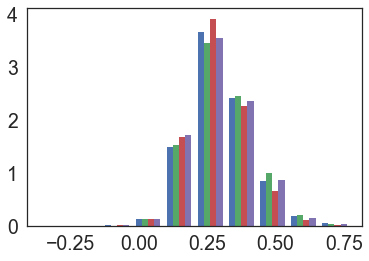

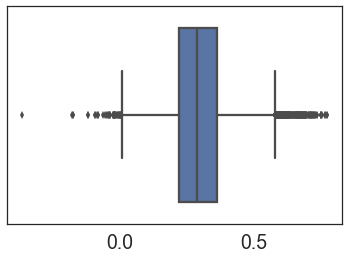

In [133]:
import pandas

sns.set_context('talk',font_scale=1.5)
sns.set_style('white')

plt.hist([combined_popcorr_diff_ori,combined_popcorr_diff_tf,combined_popcorr_nodiff_ori,combined_popcorr_nodiff_tf],normed=True)

d = {'diff_ori':combined_popcorr_diff_ori,'nodiff_ori':combined_popcorr_nodiff_ori,'diff_tf':combined_popcorr_diff_tf,'nodiff_tf':combined_popcorr_nodiff_tf,'diff_vis':combined_popcorr_diff_vis,'nodiff_vis':combined_popcorr_nodiff_vis}
combined_popcorr_data =  pandas.DataFrame(dict([ (k,pandas.Series(v)) for k,v in d.iteritems() ]))

plt.figure()
sns.boxplot(combined_popcorr_data)
print scipy.stats.ks_2samp(np.array(combined_popcorr_diff_ori[combined_popcorr_diff_ori]),np.array(combined_popcorr_nodiff_ori))
print scipy.stats.ks_2samp(combined_popcorr_diff_tf,combined_popcorr_nodiff_tf)
print scipy.stats.ks_2samp(combined_popcorr_diff_sf,combined_popcorr_nodiff_sf)

print (np.mean(combined_popcorr_diff_ori)-np.mean(combined_popcorr_nodiff_ori))/(np.std(combined_popcorr_diff_ori)+np.std(combined_popcorr_nodiff_ori))
print (np.mean(combined_popcorr_diff_tf)-np.mean(combined_popcorr_nodiff_tf))/(np.std(combined_popcorr_diff_tf)+np.std(combined_popcorr_nodiff_tf))

plt.figure()
plt.hist([combined_popcorr_diff_ori,combined_popcorr_nodiff_ori,combined_popcorr_diff_tf,combined_popcorr_nodiff_tf],range=(0.1,0.55),label=['ori_change','ori_same','tf_change','tf_same'],cumulative=True,normed=True,histtype='step',bins=200,lw=4)
plt.legend()
sns.despine()


plt.figure()
plt.hist([combined_popcorr_diff_ori,combined_popcorr_nodiff_ori],range=(0.1,0.55),label=['ori_change','ori_same'],cumulative=True,normed=True,histtype='step',bins=200,lw=4)
#plt.legend()
plt.xlim(0,0.53)
plt.ylim(0,1.0)

sns.despine()


plt.figure()
plt.hist([combined_popcorr_diff_tf,combined_popcorr_nodiff_tf],range=(0.1,0.55),label=['tf_change','tf_same'],cumulative=True,normed=True,histtype='step',bins=200,lw=4)
#plt.legend()
plt.xlim(0,0.53)
plt.ylim(0,1.0)
sns.despine()

plt.figure()
plt.hist([combined_popcorr_diff_sf,combined_popcorr_nodiff_sf],range=(0.1,0.55),label=['tf_change','tf_same'],cumulative=True,normed=True,histtype='step',bins=200,lw=4)
#plt.legend()
plt.xlim(0,0.53)
plt.ylim(0,1.0)
sns.despine()

print np.sum(np.array(combined_popcorr_diff_ori)>0.5)/float(len(combined_popcorr_diff_ori))
print np.sum(np.array(combined_popcorr_nodiff_ori)>0.5)/float(len(combined_popcorr_nodiff_ori))


print np.sum(np.array(combined_popcorr_diff_sf)>0.5)/float(len(combined_popcorr_diff_sf))
print np.sum(np.array(combined_popcorr_nodiff_sf)>0.5)/float(len(combined_popcorr_nodiff_sf))

print np.sum(np.array(combined_popcorr_diff_tf)>0.5)/float(len(combined_popcorr_diff_tf))
print np.sum(np.array(combined_popcorr_nodiff_tf)>0.5)/float(len(combined_popcorr_nodiff_tf))

print np.sum(np.array(combined_popcorr_diff_ori)>0.5)/float(len(combined_popcorr_diff_ori))
print np.sum(np.array(combined_popcorr_nodiff_ori)>0.5)/float(len(combined_popcorr_nodiff_ori))

print np.sum(np.array(combined_popcorr_diff_sf)>0.5)/float(len(combined_popcorr_diff_sf))
print np.sum(np.array(combined_popcorr_nodiff_sf)>0.5)/float(len(combined_popcorr_nodiff_sf))

print np.sum(np.array(combined_popcorr_diff_tf)>0.5)/float(len(combined_popcorr_diff_tf))
print np.sum(np.array(combined_popcorr_nodiff_tf)>0.5)/float(len(combined_popcorr_nodiff_tf))

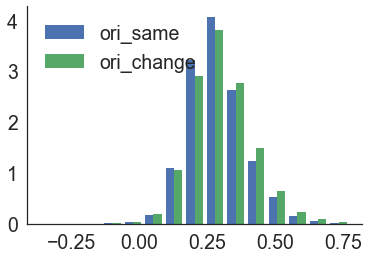

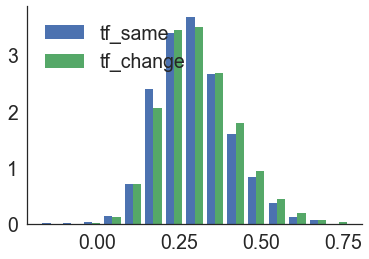

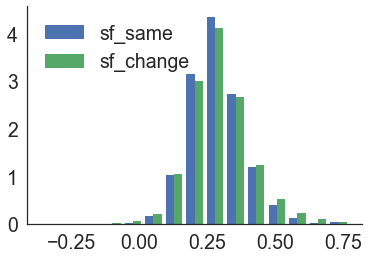

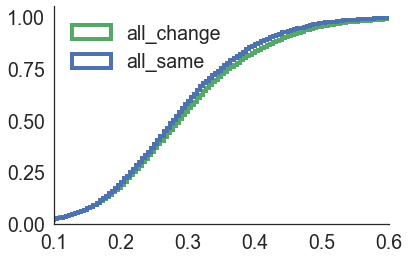

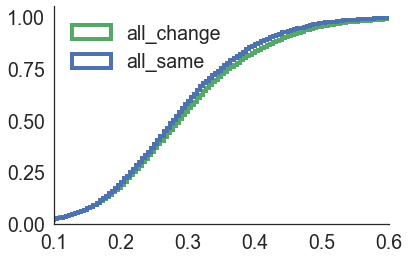

In [134]:

plt.figure()
plt.hist([np.array(combined_popcorr_nodiff_ori),np.array(combined_popcorr_diff_ori)],label=['ori_same','ori_change'],cumulative=False,normed=True,histtype='bar',bins=15,lw=4)
plt.legend(loc='upper left')
sns.despine()

plt.figure()
plt.hist([np.array(combined_popcorr_nodiff_tf),np.array(combined_popcorr_diff_tf)],label=['tf_same','tf_change'],cumulative=False,normed=True,histtype='bar',bins=15,lw=4)
plt.legend(loc='upper left')
sns.despine()


plt.figure()
plt.hist([np.array(combined_popcorr_nodiff_sf),np.array(combined_popcorr_diff_sf)],label=['sf_same','sf_change'],cumulative=False,normed=True,histtype='bar',bins=15,lw=4)
plt.legend(loc='upper left')
sns.despine()


plt.figure()
plt.hist([combined_popcorr_nodiff_sf+combined_popcorr_nodiff_tf+combined_popcorr_nodiff_ori,combined_popcorr_diff_sf+combined_popcorr_diff_ori+combined_popcorr_diff_tf],label=['all_same','all_change'],cumulative=True,normed=True,histtype='step',bins=250,lw=4)
plt.xlim(0.1,0.6)
plt.legend(loc='upper left')
sns.despine()

plt.figure()
plt.hist([combined_popcorr_nodiff_sf+combined_popcorr_nodiff_tf+combined_popcorr_nodiff_ori,combined_popcorr_diff_sf+combined_popcorr_diff_ori+combined_popcorr_diff_tf],label=['all_same','all_change'],cumulative=True,normed=True,histtype='step',bins=250,lw=4)
plt.xlim(0.1,0.6)
plt.legend(loc='upper left')
sns.despine()


In [67]:
scipy.stats.ks_2samp(np.array(combined_popcorr_diff_ori),np.array(combined_popcorr_nodiff_ori))

Ks_2sampResult(statistic=0.059047970313471754, pvalue=2.2328819747118754e-10)

In [54]:
scipy.stats.anderson_ksamp(np.array(combined_popcorr_diff_ori),np.array(combined_popcorr_nodiff_ori))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [204]:
scipy.stats.anderson_ksamp([np.array(combined_popcorr_nodiff_ori),np.array(combined_popcorr_diff_ori)])

Anderson_ksampResult(statistic=24.598627109421336, critical_values=array([ 0.325,  1.226,  1.961,  2.718,  3.752]), significance_level=1.1915710260416589e-05)

In [212]:
scipy.stats.ttest_ind(np.array(combined_popcorr_diff_ori),np.array(combined_popcorr_nodiff_ori))[0]

6.1360830711798338

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

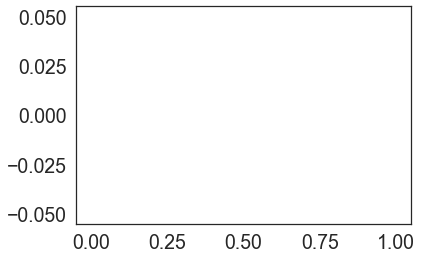

In [487]:
plt.hist([combined_popcorr_diff_ori,combined_popcorr_nodiff_ori])

0.890625
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
0.890625


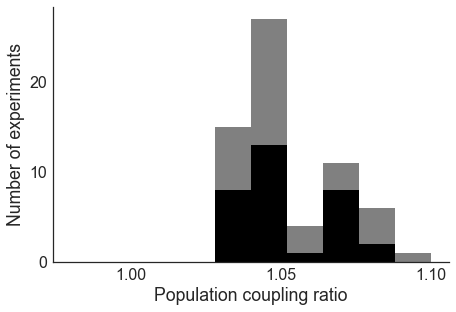

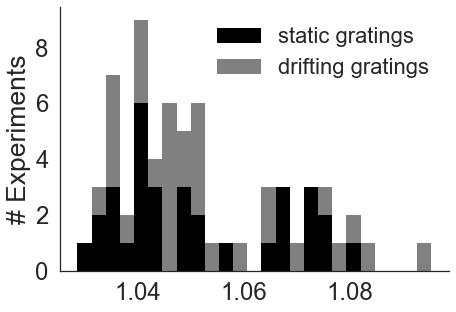

In [340]:
save_fig=True

f, ax = plt.subplots(figsize=(7, 5))

sns.set_color_codes("deep")
sns.set(style="white",context='poster',font_scale=1.5)

ax.hist([np.array(ttest_stats)[N_50_idcs],np.array(ttest_stats)[N_250_idcs]],color=['black','gray'],histtype='barstacked',range=(0.98,1.1),bins=10)

print float(sum(np.array(ttest_pval)<0.0005))/len((np.array(ttest_pval)))
ax.set_ylabel('Number of experiments')
#ax.set_xlabel(r'$\Delta ORI_{pref}^ {high PC} - \Delta ORI_{pref}^{low PC}$')
ax.set_xlabel('Population coupling ratio')

sns.despine(left=False, bottom=False)

#ax.legend(['static gratings', 'drifting gratings'],loc='upper left',fontsize=22)
#ax.legend(['*', 'n.s.'],loc='upper left')
plt.tight_layout()

if save_fig:
    tikz_save('manuscript/figures/summary_stats_ABI.tex',
           figureheight = '\\figureheight',
           figurewidth = '\\figurewidth')
    plt.savefig('manuscript/figures/summary_stats_PC_ratio.png',dpi=600)


f, ax = plt.subplots(figsize=(7, 5))

sns.set_color_codes("deep")
sns.set(style="white",context='poster',font_scale=1.5)

ax.hist([np.array(ttest_stats_rates)[N_50_idcs],np.array(ttest_stats_rates)[N_250_idcs]],color=['black','gray'],histtype='barstacked',bins=25)
print float(sum(np.array(ttest_pval)<0.0005))/len((np.array(ttest_pval)))
ax.set_ylabel('# Experiments')
sns.despine(left=False, bottom=False)

ax.legend(['static gratings', 'drifting gratings'],loc='upper right',fontsize=22)
#ax.legend(['*', 'n.s.'],loc='upper left')
plt.tight_layout()





#plt.figure()
#plt.scatter(ttest_stats,[[x,x] for x in Ncells_exp])

(array([ 5081.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  9192.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

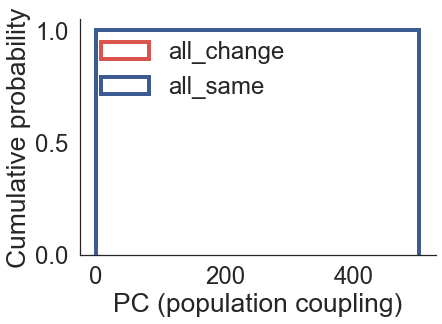

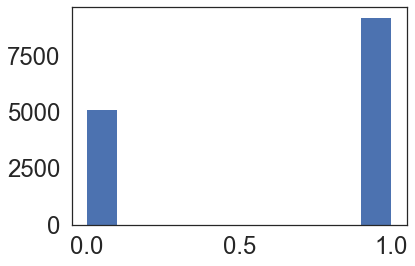

In [700]:
save_fig=False

f, ax = plt.subplots(figsize=(7, 5))

sns.set_color_codes("deep")
sns.set(style="white",context='poster',font_scale=1.5)

ax.hist([combined_popcorr_nodiff_ori,combined_popcorr_diff_ori],range=(0.1,501),label=['all_same','all_change'],color=[sns.xkcd_rgb["denim blue"],sns.xkcd_rgb["pale red"]],cumulative=True,normed=True,histtype='step',bins=50,lw=4)
#ax.set_xlim(0.1,0.4)
ax.legend(loc='upper left')
ax.set_xlabel('PC (population coupling)')
ax.set_ylabel('Cumulative probability')

sns.despine()
plt.tight_layout()

if save_fig:
    tikz_save('manuscript/figures/example_ORI.tex',
           figureheight = '\\figureheight',
           figurewidth = '\\figurewidth')
    plt.savefig('manuscript/figures/summaryexample_ORI_stats_ABI.png',dpi=600)

sns.despine()

plt.figure()
plt.hist(combined_ori_change)

In [169]:
scipy.stats.mannwhitneyu(combined_popcorr_nodiff_sf+combined_popcorr_nodiff_tf+combined_popcorr_nodiff_ori,combined_popcorr_diff_sf+combined_popcorr_diff_ori+combined_popcorr_diff_tf)[1]*len(data_sets)

1.3710333094336303e-09

In [172]:
scipy.stats.ttest_1samp(ttest_stats,0)

Ttest_1sampResult(statistic=533.71770589480684, pvalue=7.1806470447300339e-117)

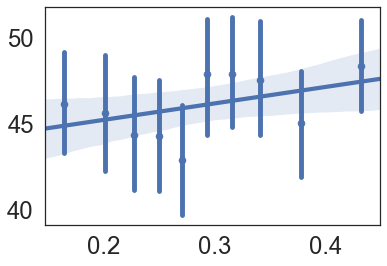

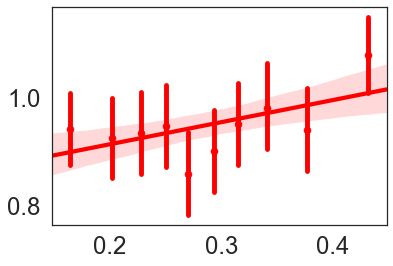

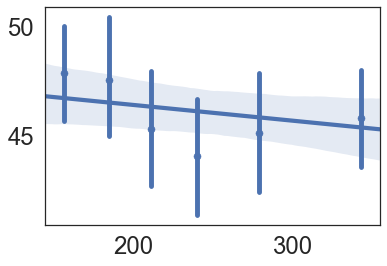

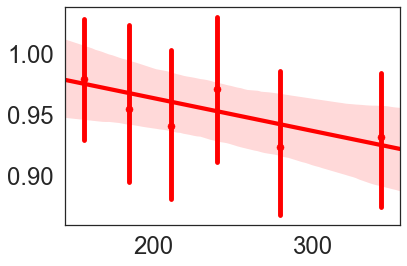

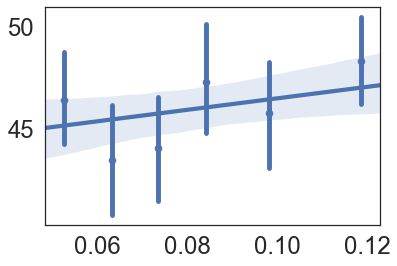

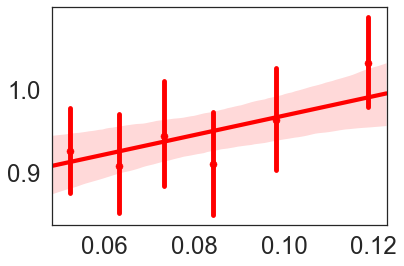

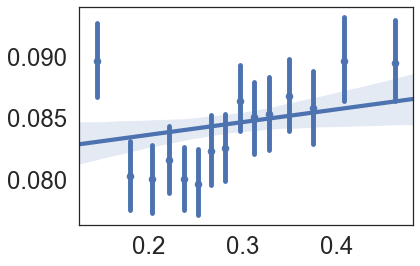

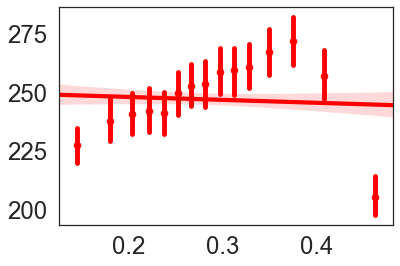

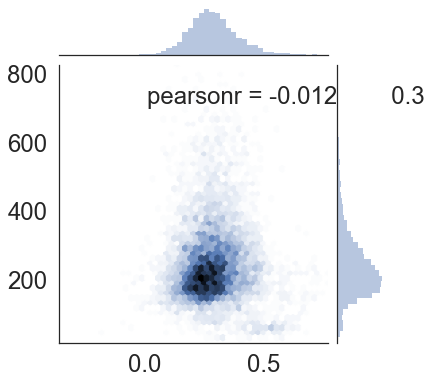

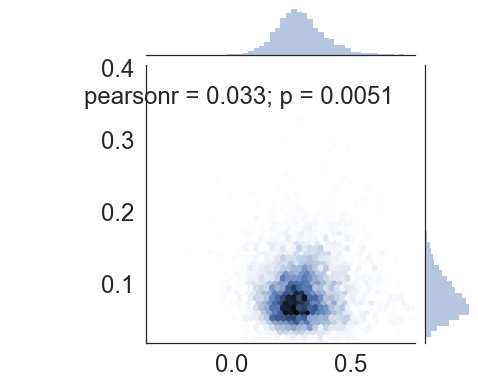

In [292]:
#sns.regplot(np.array(combined_rates_mean),np.array(combined_ori_change),x_bins=6,logistic=False)#,kind='hex')#,ylim=(-100,100))
#sns.regplot(np.array(combined_rates_mean),np.array(combined_sf_tf_change),x_bins=6,logistic=False,color='red')#,kind='hex')#,ylim=(-100,100))

plt.figure()
sns.regplot(np.array(combined_popcorrs_mean),np.array(combined_ori_change),x_partial=np.array(combined_rates_mean),x_bins=10,logistic=False)#,kind='hex')#,ylim=(-100,100))
#sns.regplot(np.array(combined_popcorrs_mean),np.array(combined_ori_change),x_bins=10,logistic=False,color='gray')#,kind='hex')#,ylim=(-100,100))

plt.figure()
sns.regplot(np.array(combined_popcorrs_mean),np.array(combined_sf_tf_change),x_bins=10,logistic=False,color='red')#,kind='hex')#,ylim=(-100,100))

plt.figure()
sns.regplot(np.array(combined_rates_mean),np.array(combined_ori_change),x_bins=6,logistic=False)#,kind='hex')#,ylim=(-100,100))
plt.figure()
sns.regplot(np.array(combined_rates_mean),np.array(combined_sf_tf_change),x_bins=6,logistic=False,color='red')#,kind='hex')#,ylim=(-100,100))


plt.figure()
sns.regplot(np.array(combined_popcorrs_std),np.array(combined_ori_change),x_bins=6,logistic=False)#,kind='hex')#,ylim=(-100,100))
plt.figure()
sns.regplot(np.array(combined_popcorrs_std),np.array(combined_sf_tf_change),x_bins=6,logistic=False,color='red')#,kind='hex')#,ylim=(-100,100))


plt.figure()
sns.regplot(np.array(combined_popcorrs_mean),np.array(combined_popcorrs_std),x_bins=15,logistic=False)#,kind='hex')#,ylim=(-100,100))
plt.figure()
sns.regplot(np.array(combined_popcorrs_mean),np.array(combined_rates_mean),x_bins=15,logistic=False,color='red')#,kind='hex')#,ylim=(-100,100))


sns.jointplot(np.array(combined_popcorrs_mean),np.array(combined_rates_mean),kind='hex')
sns.jointplot(np.array(combined_popcorrs_mean),np.array(combined_popcorrs_std),kind='hex')


gathering decoding results  None
gathering decoding results  /home/ysweeney/CNL-brain3/data/topdown_learning/diverse_rates_net_runs/129/ None
gathering decoding results  /home/ysweeney/CNL-brain3/data/topdown_learning/diverse_rates_net_runs/128/ None
gathering decoding results  /home/ysweeney/CNL-brain3/data/topdown_learning/diverse_rates_net_runs/127/ None


/home/ysweeney/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


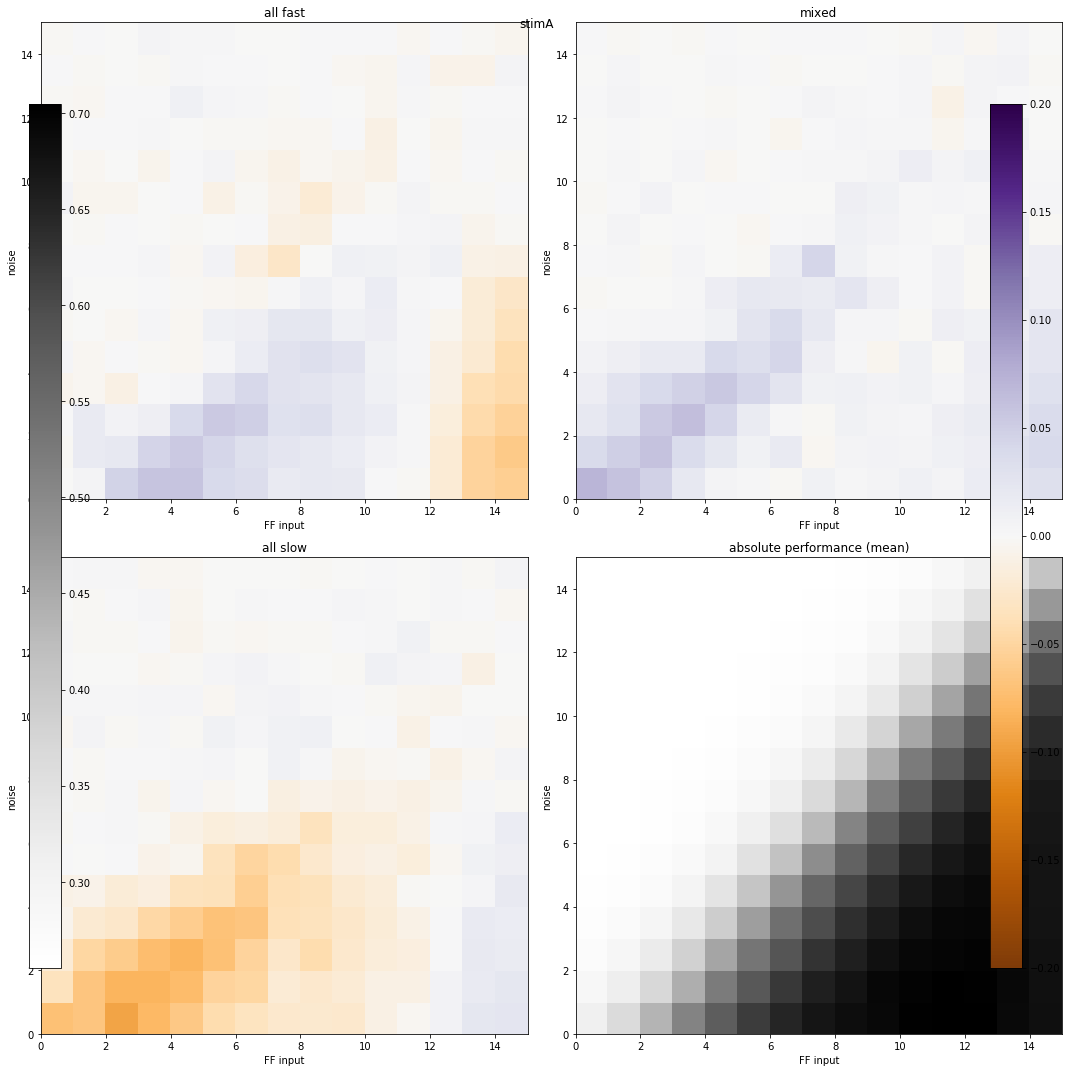

In [4]:
from launch_diverse_learning_rates_multiproc import gather_multiple_decoding_measures

save_fig=True

def plot_summary_multiple_decoding_measures(file_dir_fast,file_dir_slow,file_dir_mixed,save_str=None):     
    print 'gathering decoding results ', save_str
    #import glob
    #files_fast = glob.glob(file_dir_fast+'*.pkl*')                                                   
    #files_slow = glob.glob(file_dir_slow+'*.pkl*')                                                   
    #files_mixed = glob.glob(file_dir_mixed+'*.pkl*')                                                 
    
    decoding_results_fast = gather_multiple_decoding_measures(file_dir_fast)                          
    decoding_results_slow = gather_multiple_decoding_measures(file_dir_slow)                          
    decoding_results_mixed = gather_multiple_decoding_measures(file_dir_mixed)                        
    
    #decoding_results_slow = {'pairs': [], 'stimA_alone': []}                                         
    #decoding_results_mixed = {'pairs': [], 'stimA_alone': []}                                        
    
    for key in decoding_results_fast.keys():                                                          
        fig,ax = plt.subplots(2,2,figsize=(15,15))
        #vmax_k = np.max(decoding_results_slow_global_highrange_4_v2[key])                            
        #vmin_k = np.min(decoding_results_slow_global_highrange_4_v2[key])                            
        vmean_k = np.mean(np.mean(np.array([decoding_results_slow[key],decoding_results_fast[key],decoding_results_mixed[key]]),axis=0),axis=0)
        vmin_k =-0.2
        vmax_k = 0.2
        ax[0][0].pcolor((np.mean(np.array(decoding_results_fast[key]),axis=0)-vmean_k)/vmean_k,vmin=vmin_k,vmax=vmax_k,cmap='PuOr')                                                                         
        ax[0][0].set_title('all fast')                                                                
        ax[1][0].pcolor((np.mean(np.array(decoding_results_slow[key]),axis=0)-vmean_k)/vmean_k,vmin=vmin_k,vmax=vmax_k,cmap='PuOr')                                                                         
        ax[1][0].set_title('all slow')                                                                
        im = ax[0][1].pcolor((np.mean(np.array(decoding_results_mixed[key]),axis=0)-vmean_k)/vmean_k,vmax=vmax_k,vmin=vmin_k,cmap='PuOr')
        ax[0][1].set_title('mixed')
        im_2 = ax[1][1].pcolor(vmean_k,cmap='Greys')                                                  
        ax[1][1].set_title('absolute performance (mean)')                                             
        cax = fig.add_axes([0.92, 0.1, 0.03, 0.8])
        cax_2 = fig.add_axes([0.03, 0.1, 0.03, 0.8])                                                  
        for ax_i in ax.flatten():
            ax_i.set_xlabel('FF input')
            ax_i.set_ylabel('noise')
        
        fig.colorbar(im, cax=cax)
        fig.colorbar(im_2, cax=cax_2)                                                                 
        fig.suptitle(key)
        
        plt.tight_layout()
        fig.savefig('manuscript/figures/decoding.png',dpi=600)
        
        return decoding_results_fast,decoding_results_slow,decoding_results_mixed
        
        
decoding_results_fast,decoding_results_slow,decoding_results_mixed = plot_summary_multiple_decoding_measures('/home/ysweeney/CNL-brain3/data/topdown_learning/diverse_rates_net_runs/129/','/home/ysweeney/CNL-brain3/data/topdown_learning/diverse_rates_net_runs/128/','/home/ysweeney/CNL-brain3/data/topdown_learning/diverse_rates_net_runs/127/')

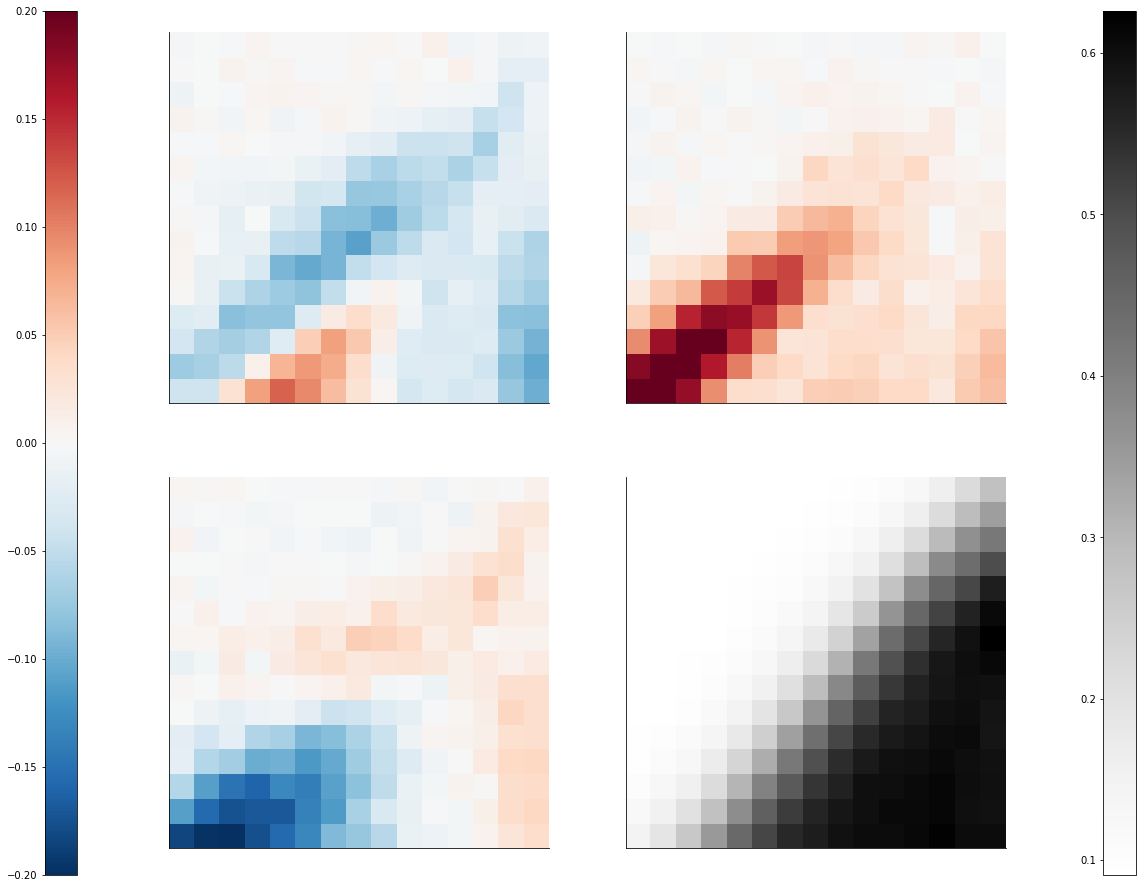

In [13]:
fig,ax = plt.subplots(2,2,figsize=(15,15))

vmean_k = np.mean(np.mean(np.array([decoding_results_slow['pairs'],decoding_results_fast['pairs'],decoding_results_mixed['pairs']]),axis=0),axis=0)
vmin_k =-0.2
vmax_k = 0.2
ax[0][0].pcolor((np.mean(np.array(decoding_results_fast['pairs']),axis=0)-vmean_k)/vmean_k,vmin=vmin_k,vmax=vmax_k,cmap='RdBu_r')                                                                         
#ax[0][0].set_title('Uniform ' + r'$\alpha$' + '( fast)' )                                                                
ax[1][0].pcolor((np.mean(np.array(decoding_results_slow['pairs']),axis=0)-vmean_k)/vmean_k,vmin=vmin_k,vmax=vmax_k,cmap='RdBu_r')                                                                         
#ax[1][0].set_title('Uniform ' + r'$\alpha$' + '( slow)')                                                       
im = ax[0][1].pcolor((np.mean(np.array(decoding_results_mixed['pairs']),axis=0)-vmean_k)/vmean_k,vmax=vmax_k,vmin=vmin_k,cmap='RdBu_r')
#ax[0][1].set_title('Diverse ' + r'$\alpha$')
im_2 = ax[1][1].pcolor(vmean_k,cmap='Greys')                                                  
#ax[1][1].set_title('Baseline performance')               

cax_2 = fig.add_axes([0.99, 0.1, 0.03, 0.8])
cax = fig.add_axes([0.01, 0.1, 0.03, 0.8])

for ax_i in ax.flatten():
    ax_i.set_xticks([])
    ax_i.set_yticks([])

fig.colorbar(im, cax=cax)
fig.colorbar(im_2, cax=cax_2)                                                      
        
#plt.tight_layout()
sns.despine()
fig.savefig('manuscript/figures/decoding.png',dpi=350,bbox_extra_artists=(cax,cax_2), bbox_inches='tight')



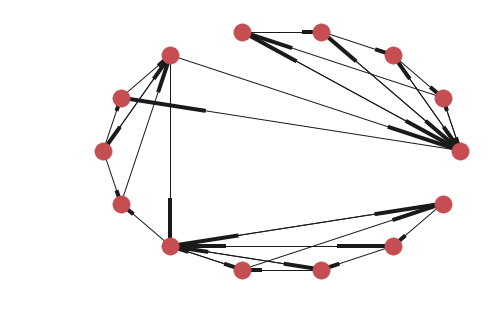

In [482]:
Z=[[0,1,1,1,1,0,1,0,0,0,0,0,0,0],[1,0,0,0,1,0,0,0,0,0,0,0,0,0],    [1,1,0,0,0,0,0,0,0,0,0,0,0,0],[1,0,1,0,0,0,0,0,0,0,0,0,0,0],[1,0,0,1,0,0,0,0,0,0,0,0,0,0],[1,0,0,0,0,0,0,1,0,1,0,0,0,0],[0,0,0,0,0,1,0,0,0,0,0,0,0,0],[0,0,0,0,0,1,1,0,1,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,1,0,1,1,1,1],[0,0,0,0,0,0,0,0,0,1,0,0,0,1],[0,0,0,0,0,0,0,0,0,1,1,0,0,0],[0,0,0,0,0,0,0,0,0,1,0,1,0,0],[0,0,0,0,0,0,0,0,0,1,0,0,1,0]]
A=np.matrix(Z)
G=nx.from_numpy_matrix(A,create_using=nx.MultiDiGraph())
pos=nx.spring_layout(G)
labels={}
#N= 20
#for i in range (N):
#    labels[i]=i+1
nx.draw_circular(G)
#nx.draw_networkx_labels(G,pos,labels,font_size=15)

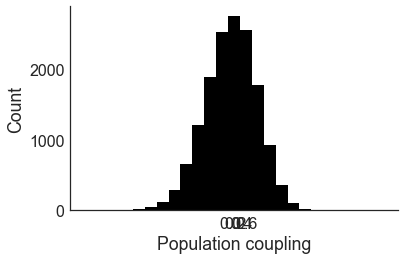

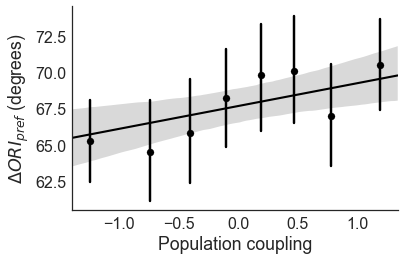

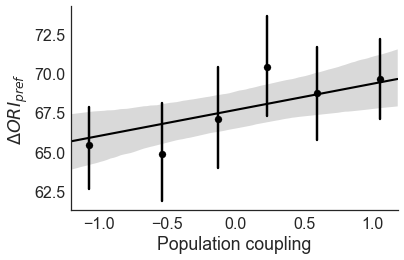

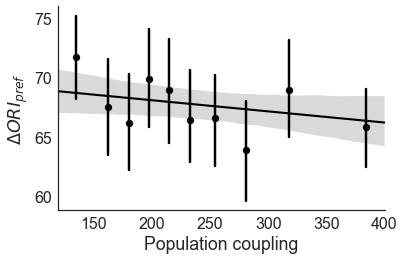

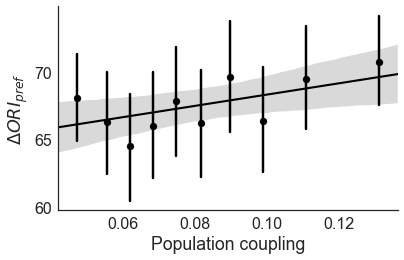

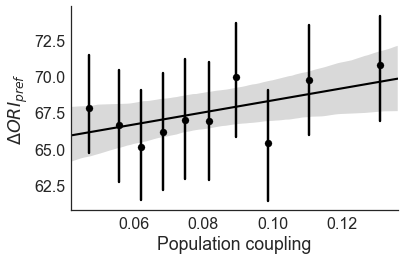

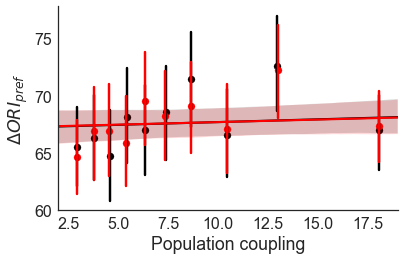

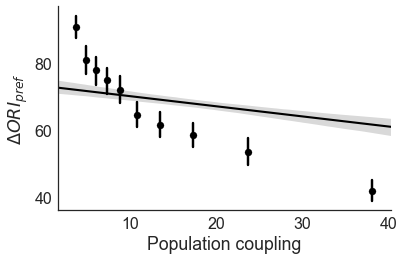

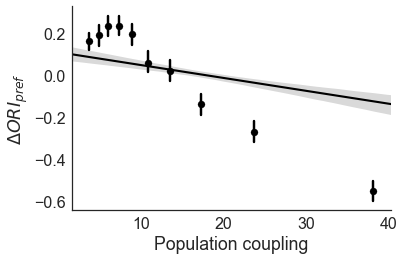

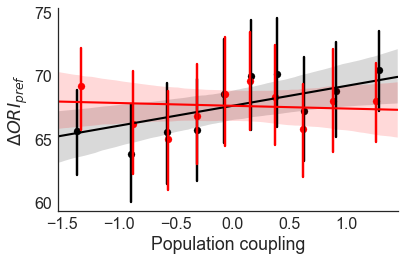

In [353]:
PC_dists = [combined_popcorrs_mean]
N_idx = 0
for i in xrange(4):
    PC_dists.append(combined_popcorrs_mean[N_idx:(N_idx+Ncells_exp[i])])
    N_idx += Ncells_exp[i]

sns.set_context('paper',font_scale=2.0)
#PC_dists.append(combined_popcorrs_mean)
#plt.hist(PC_dists,25,histtype='step',lw=3,normed=True);
plt.hist(PC_dists[0],25,lw=3,color='black',normed=False);
sns.despine()
plt.xlabel('Population coupling')
plt.xticks([0.0,0.2,0.4,0.6])
plt.yticks([0.0,1000,2000])
plt.ylabel('Count')
plt.tight_layout()
#plt.savefig('manuscript/figures/PC_hist_ABI.png')


plt.figure()
sns.regplot(np.array(combined_popcorrs_mean),np.array(combined_ori_change),x_bins=8,color='black',logistic=False)
sns.despine()
plt.xlabel('Population coupling')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel(r'$\Delta ORI_{pref}$' + ' (degrees)')
plt.tight_layout()
#plt.savefig('manuscript/figures/PC_Vs_varORIpref.png')

plt.figure()
sns.regplot(np.array(combined_popcorrs_mean),np.array(combined_ori_change),x_partial=np.array(combined_rates_mean),x_bins=6,color='black',logistic=False)
sns.despine()
plt.xlabel('Population coupling')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel(r'$\Delta ORI_{pref}$')
plt.tight_layout()


plt.figure()
sns.regplot(np.array(combined_rates_mean),np.array(combined_ori_change),x_bins=10,color='black',logistic=False)
sns.despine()
plt.xlabel('Population coupling')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel(r'$\Delta ORI_{pref}$')
plt.tight_layout()

plt.figure()
sns.regplot(np.array(combined_popcorrs_std),np.array(combined_ori_change),x_bins=10,color='black',logistic=False)
sns.despine()
plt.xlabel('Population coupling')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel(r'$\Delta ORI_{pref}$')
plt.tight_layout()

plt.figure()
sns.regplot(np.array(combined_popcorrs_std),np.array(combined_ori_change),x_partial=np.array(combined_popcorrs_mean),x_bins=10,color='black',logistic=False)
sns.despine()
plt.xlabel('Population coupling')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel(r'$\Delta ORI_{pref}$')
plt.tight_layout()

plt.figure()
sns.regplot(np.array(combined_rates_std),np.array(combined_ori_change),x_partial=np.array(combined_popcorrs_mean),x_bins=10,color='black',logistic=False)
sns.despine()
plt.xlabel('Population coupling')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel(r'$\Delta ORI_{pref}$')
plt.tight_layout()
#plt.figure()
sns.regplot(np.array(combined_rates_std),np.array(combined_ori_change),x_bins=10,color='red',logistic=False)
sns.despine()
plt.xlabel('Population coupling')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel(r'$\Delta ORI_{pref}$')
plt.tight_layout()


plt.figure()
sns.regplot(np.array(combined_peak_sf),np.array(combined_ori_change),x_bins=10,color='black',logistic=False)
sns.despine()
plt.xlabel('Population coupling')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel(r'$\Delta ORI_{pref}$')
plt.tight_layout()

plt.figure()
sns.regplot(np.array(combined_peak_sf),np.array(combined_popcorrs_mean),x_bins=10,color='black',logistic=False)
sns.despine()
plt.xlabel('Population coupling')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel(r'$\Delta ORI_{pref}$')
plt.tight_layout()

plt.figure()
sns.regplot(np.array(combined_popcorrs_mean),np.array(combined_ori_change),x_bins=10,color='black',logistic=False)
sns.regplot(np.array(combined_popcorrs_mean),np.array(combined_ori_change),x_partial=np.array(combined_peak_sf),x_bins=10,color='red',logistic=False)
sns.despine()
plt.xlabel('Population coupling')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel(r'$\Delta ORI_{pref}$')
plt.tight_layout()

#plt.savefig('manuscript/figures/PC_Vs_varORIpref.pdf')

In [2]:
def partial_corr(x,y,z,plot=True,color='b',xlabel='x',ylabel='y ',title='network'):
    beta_i = scipy.stats.linregress(z, x)
    beta_j = scipy.stats.linregress(z, y)

    line_x = beta_i[1] + np.multiply(beta_i[0],z)
    line_y =  beta_j[1] + np.multiply(beta_j[0],z)

    #print beta_i,beta_j

    #plt.scatter(x,line_x)
    #plt.scatter(y,line_y,color='r')

    res_j = np.subtract(y,line_y)
    res_i = np.subtract(x,line_x)

    corr = scipy.stats.spearmanr(res_i, res_j)
    print 'partial correlation', corr

    if plot:
        fig,axes=plt.subplots()
        plt.scatter(res_j,res_i,color=color)
        plt.title('Residuals ,' + title + ' ; ' + str(corr[0])+ ' ' + str(corr[1]))
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)

def bootstrap_resample(X, n=None):
    """ Bootstrap resample an array_like
    Parameters
    ----------
    X : array_like
      data to resample
    n : int, optional
      length of resampled array, equal to len(X) if n==None
    Results
    -------
    returns X_resamples
    """
    if n == None:
        n = len(X)
        
    resample_i = np.floor(np.random.rand(n)*len(X)).astype(int)
    X_resample = X[resample_i]
    return X_resample

print scipy.stats.spearmanr(np.array(combined_popcorrs_mean)[np.array(combined_popcorrs_mean)>0.25],np.array(combined_ori_change)[np.array(combined_popcorrs_mean)>0.25])
print scipy.stats.spearmanr(np.array(combined_popcorrs_mean),np.array(combined_ori_change))
print scipy.stats.pearsonr(np.array(combined_popcorrs_std),np.array(combined_ori_change))
print scipy.stats.pearsonr(np.array(combined_popcorrs_mean),np.array(combined_rates_mean))
print scipy.stats.pearsonr(np.array(combined_popcorrs_mean),np.array(combined_rates_std))
print scipy.stats.spearmanr(np.array(combined_rates_mean),np.array(combined_ori_change))
print scipy.stats.spearmanr(np.array(combined_peak_sf),np.array(combined_ori_change))
print partial_corr(np.array(combined_popcorrs_mean),np.array(combined_ori_change),np.array(combined_peak_sf),False)

print np.std(bootstrap_resample(np.array(combined_ori_change),1e6))
print np.percentile(bootstrap_resample(np.array(combined_ori_change),1e6),90)
print np.percentile(bootstrap_resample(np.array(combined_ori_change),1e6),10)
print np.mean(bootstrap_resample(np.array(combined_ori_change),1e6))
print np.std(bootstrap_resample(np.array(combined_ori_before),1e6))
print np.std(bootstrap_resample(np.array(combined_ori_after),1e6))


print np.percentile(bootstrap_resample(np.array(combined_ori_before),1e6),35)


NameError: name 'combined_popcorrs_mean' is not defined

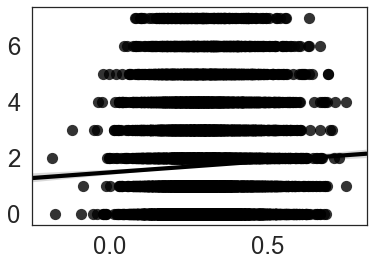

In [874]:
sns.regplot(np.array(combined_popcorrs_mean),np.array(combined_ori_change),x_partial=np.array(combined_rates_mean),color='black',logistic=False)


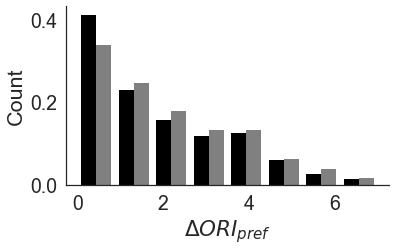

In [165]:
plt.hist([np.array(combined_ori_change)[np.array(combined_popcorrs_mean)<0.4],np.array(combined_ori_change)[np.array(combined_popcorrs_mean)>0.4]],8,color=['black','gray'],stacked=False,normed=True)
plt.ylabel('Count')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.xlabel(r'$\Delta ORI_{pref}$')
sns.despine()
plt.tight_layout()
#plt.savefig('manuscript/figures/Delta_ORIpref.png')


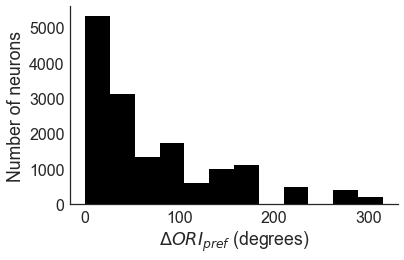

In [338]:
plt.hist(combined_ori_change,12,color='black',normed=False)
plt.ylabel('Number of neurons')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.xlabel(r'$\Delta ORI_{pref}$' + ' (degrees)')
sns.despine()
plt.tight_layout()
plt.savefig('manuscript/figures/Delta_ORIpref.png')


In [26]:
from glob import glob

import seaborn as sns
sns.set(style="white",context='poster',font_scale=1.5)

f, ax = plt.subplots(figsize=(10, 6))


import py_scripts_yann
res_files = glob('/home/ysweeney/CNL-brain1/repos/topdown_learning/coupling_link_swee_*')

couplings = np.zeros((10,10,len(res_files)))

for res_idx in xrange(len(res_files)):
    couplings[:,:,res_idx] = py_scripts_yann.load_pickle(res_files[res_idx])
    
plt.pcolor(np.mean(couplings,axis=2))
cbar = plt.colorbar()
ax.set_xticklabels(np.arange(0,1.1,0.2))
ax.set_yticklabels(np.arange(0,1.1,0.2))
ax.set_ylabel('Noise')
ax.set_xlabel('Synaptic scaling rate')
#ax.set_title('Plasticity-coupling link')
cbar.set_label('Plasticity-coupling link')
plt.tight_layout()

plt.savefig('manuscript/figures/plasticity_coupling_link.pdf')


In [4]:
res_slow = py_scripts_yann.load_pickle('/home/ysweeney/CNL-brain1/data/topdown_learning/diverse_rates_net_runs/127/broad_tuning_scaling_rate_2e-5_Wmax_scale_5_8_orientatations_8_stimuli_48N_slow_p1_ind_OU_15_15nets_reward_switch_250k_0.pkl')
res_mix = py_scripts_yann.load_pickle('/home/ysweeney/CNL-brain1/data/topdown_learning/diverse_rates_net_runs/128/broad_tuning_scaling_rate_2e-5_Wmax_scale_5_8_orientatations_8_stimuli_48N_mix_p1_ind_OU_15_15nets_reward_switch_250k_0.pkl')
res_fast = py_scripts_yann.load_pickle('/home/ysweeney/CNL-brain1/data/topdown_learning/diverse_rates_net_runs/126/broad_tuning_scaling_rate_2e-5_Wmax_scale_5_8_orientatations_8_stimuli_48N_fast_p1_ind_OU_15_15nets_reward_switch_250k_0.pkl')

import run_single_neuron_associative_learning

/home/ysweeney/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/home/ysweeney/anaconda2/lib/python2.7/site-packages/NeuroTools/__init__.py:125: DependencyWarning: ** interval ** package is not installed.
To have functions using interval please install the package.
website : http://pypi.python.org/pypi/interval/1.0.0

  warnings.warn(get_import_warning(name), DependencyWarning)


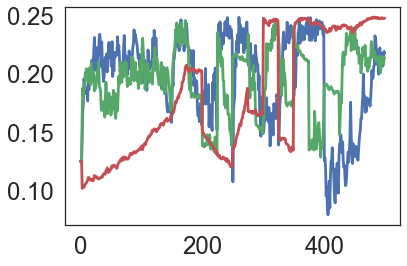

In [232]:
arg_s = np.argsort(res_mix[0]['sim_pars']['alpha_i'].flatten())
 
reload(run_single_neuron_associative_learning)
    
selectivities = run_single_neuron_associative_learning.plot_diverse_rates_selectivity_evolution(res_fast[0],8,48)
#plt.pcolor(np.transpose(selectivities[0][:,:]))
#plt.colorbar()
#plt.show()
#plt.pcolor(np.transpose(selectivities[1][:,:]))
#plt.colorbar()
#plt.show()

#plt.pcolor(res_fast[0]['weights_rec'][270].reshape((48,48)))
#plt.colorbar()
#plt.show()

#plt.plot(np.percentile(selectivities[0],50,axis=1))
plt.plot(np.max(selectivities[1],axis=1))
#plt.show()


selectivities = run_single_neuron_associative_learning.plot_diverse_rates_selectivity_evolution(res_mix[0],8,48)
#plt.pcolor(np.transpose(selectivities[0][:,arg_s]))
#plt.colorbar()
#plt.show()
#plt.pcolor(np.transpose(selectivities[1][:,arg_s]))
#plt.colorbar()
#plt.show()

#plt.pcolor(res_mix[0]['weights_rec'][370].reshape((48,48)))
#plt.colorbar()
#plt.show()

#plt.plot(np.percentile(selectivities[0],50,axis=1))
plt.plot(np.max(selectivities[1],axis=1))
#plt.show()

selectivities = run_single_neuron_associative_learning.plot_diverse_rates_selectivity_evolution(res_slow[0],8,48)
#plt.pcolor(np.transpose(selectivities[0][:,:]))
#plt.colorbar()
#plt.show()
#plt.pcolor(np.transpose(selectivities[1][:,:]))
#plt.colorbar()
#plt.show()

#plt.pcolor(res_slow[0]['weights_rec'][370].reshape((48,48)))
#plt.colorbar()
#plt.show()

#plt.plot(np.percentile(selectivities[0],50,axis=1))
plt.plot(np.max(selectivities[1],axis=1))
plt.show()



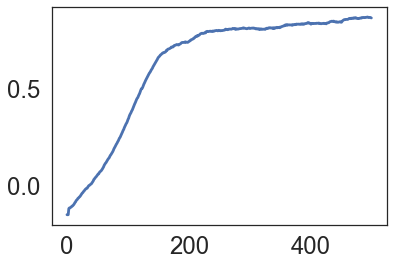

In [54]:
plt.plot(np.mean(selectivities[0],axis=1))
plt.show()

In [5]:
selectivities_slow = np.zeros((2,8,1000,48))
selectivities_mix = np.zeros((2,8,1000,48))
selectivities_fast = np.zeros((2,8,1000,48))

reload(run_single_neuron_associative_learning)

for file_idx in xrange(8):
    #res_mix = py_scripts_yann.load_pickle('/home/ysweeney/CNL-brain1/data/topdown_learning/diverse_rates_net_runs/136/broad_tuning_scaling_rate_2e-5_Wmax_scale_5_8_orientatations_8_stimuli_48N_mix_p1_ind_OU_15_8nets_reward_exp_iter_500k_'+str(file_idx)+'.pkl')
    #res_slow = py_scripts_yann.load_pickle('/home/ysweeney/CNL-brain1/data/topdown_learning/diverse_rates_net_runs/137/broad_tuning_scaling_rate_2e-5_Wmax_scale_5_8_orientatations_8_stimuli_48N_slow_p1_ind_OU_15_8nets_reward_exp_iter_500k_'+str(file_idx)+'.pkl')
    #res_fast = py_scripts_yann.load_pickle('/home/ysweeney/CNL-brain1/data/topdown_learning/diverse_rates_net_runs/138/broad_tuning_scaling_rate_2e-5_Wmax_scale_5_8_orientatations_8_stimuli_48N_fast_p1_ind_OU_15_8nets_reward_exp_iter_500k_'+str(file_idx)+'.pkl')

    #res_mix = py_scripts_yann.load_pickle('/home/ysweeney/CNL-brain1/data/topdown_learning/diverse_rates_net_runs/128/broad_tuning_scaling_rate_2e-5_Wmax_scale_5_8_orientatations_8_stimuli_48N_mix_p1_ind_OU_15_15nets_reward_switch_250k_'+str(file_idx)+'.pkl')
    #res_slow = py_scripts_yann.load_pickle('/home/ysweeney/CNL-brain1/data/topdown_learning/diverse_rates_net_runs/127/broad_tuning_scaling_rate_2e-5_Wmax_scale_5_8_orientatations_8_stimuli_48N_slow_p1_ind_OU_15_15nets_reward_switch_250k_'+str(file_idx)+'.pkl')
    #res_fast = py_scripts_yann.load_pickle('/home/ysweeney/CNL-brain1/data/topdown_learning/diverse_rates_net_runs/126/broad_tuning_scaling_rate_2e-5_Wmax_scale_5_8_orientatations_8_stimuli_48N_fast_p1_ind_OU_15_15nets_reward_switch_250k_'+str(file_idx)+'.pkl')
     
    #res_fast = py_scripts_yann.load_pickle('/home/ysweeney/CNL-brain1/data/topdown_learning/diverse_rates_net_runs/147/broad_tuning_scaling_rate_2e-5_Wmax_scale_5_8_orientatations_8_stimuli_48N_fast_p1_p5_ind_OU_15_8nets_reward_iter_250k_'+str(file_idx)+'.pkl')
    #res_mix = py_scripts_yann.load_pickle('/home/ysweeney/CNL-brain1/data/topdown_learning/diverse_rates_net_runs/148/broad_tuning_scaling_rate_2e-5_Wmax_scale_5_8_orientatations_8_stimuli_48N_mix_p1_p5_ind_OU_15_8nets_reward_iter_250k_'+str(file_idx)+'.pkl')
    #res_slow = py_scripts_yann.load_pickle('/home/ysweeney/CNL-brain1/data/topdown_learning/diverse_rates_net_runs/149/broad_tuning_scaling_rate_2e-5_Wmax_scale_5_8_orientatations_8_stimuli_48N_slow_p1_p5_ind_OU_15_8nets_reward_iter_250k_'+str(file_idx)+'.pkl')
    
    res_slow = py_scripts_yann.load_pickle('/home/ysweeney/CNL-brain1/data/topdown_learning/diverse_rates_net_runs/150/broad_tuning_scaling_rate_2e-5_Wmax_scale_5_8_orientatations_8_stimuli_48N_slow_p1_p5_ind_OU_15_8nets_reward_iter_250k_'+str(file_idx)+'.pkl')
    res_fast = py_scripts_yann.load_pickle('/home/ysweeney/CNL-brain1/data/topdown_learning/diverse_rates_net_runs/154/broad_tuning_scaling_rate_2e-5_Wmax_scale_5_8_orientatations_8_stimuli_48N_fast_p1_p5_ind_OU_15_8nets_reward_iter_250k_'+str(file_idx)+'.pkl')
    res_mix = py_scripts_yann.load_pickle('/home/ysweeney/CNL-brain1/data/topdown_learning/diverse_rates_net_runs/152/broad_tuning_scaling_rate_2e-5_Wmax_scale_5_8_orientatations_8_stimuli_48N_mix_p1_p5_ind_OU_15_8nets_reward_iter_250k_'+str(file_idx)+'.pkl')

    
    selectivities_temp = run_single_neuron_associative_learning.plot_diverse_rates_selectivity_evolution(res_slow[0],8,48)
    selectivities_slow[0,file_idx] = selectivities_temp[0]
    selectivities_slow[1,file_idx] = selectivities_temp[1]
    selectivities_temp = run_single_neuron_associative_learning.plot_diverse_rates_selectivity_evolution(res_mix[0],8,48)
    selectivities_mix[0,file_idx] = selectivities_temp[0]
    selectivities_mix[1,file_idx] = selectivities_temp[1]
    selectivities_temp = run_single_neuron_associative_learning.plot_diverse_rates_selectivity_evolution(res_fast[0],8,48)
    selectivities_fast[0,file_idx] = selectivities_temp[0]
    selectivities_fast[1,file_idx] = selectivities_temp[1]



In [14]:
plt.figure()
plt.plot(np.mean(np.mean(selectivities_slow[0],axis=2),axis=0),color='black')
plt.plot(np.mean(np.mean(selectivities_mix[0],axis=2),axis=0),'--',color='black')
plt.plot(np.mean(np.mean(selectivities_fast[0],axis=2),axis=0),color='gray')
plt.xlim(0,450)
sns.despine()
#plt.legend(['fast','slow','mixed'])
#plt.show()
plt.savefig('manuscript/figures/homog_V_heter_FF_selectivity.png')

#plt.plot(np.transpose(np.max(selectivities_slow[1],axis=2)))
plt.figure()
plt.plot(np.mean(np.mean(selectivities_slow[1],axis=2),axis=0),color='black')
plt.plot(np.mean(np.mean(selectivities_fast[1],axis=2),axis=0),color='gray')
plt.plot(np.mean(np.mean(selectivities_mix[1],axis=2),axis=0),'--',color='black')
plt.xlim(250,450)
plt.legend(['slow','fast','mixed'],loc='upper left')
sns.despine()
#plt.show()
plt.savefig('manuscript/figures/homog_V_heter_reward_selectivity.png')


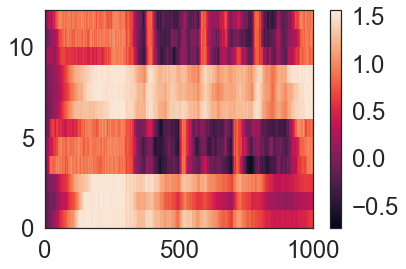

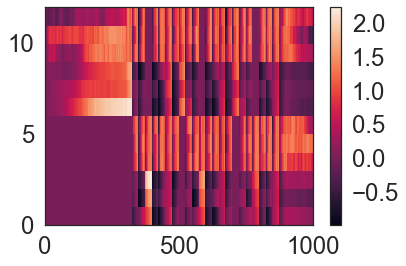

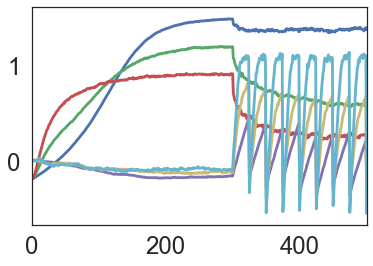

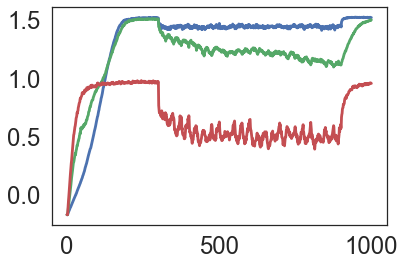

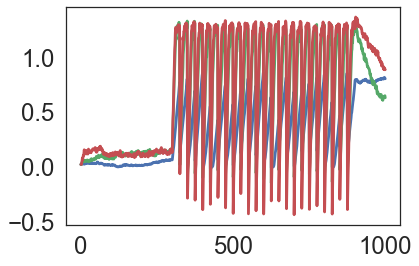

In [373]:
#plt.pcolor(np.transpose(selectivities_slow[0,0]))
#plt.colorbar()
#plt.show()

plt.pcolor(np.transpose(selectivities_mix[0,0]))
plt.ylim(0,12)
plt.colorbar()
plt.show()


plt.pcolor(np.transpose(selectivities_mix[1,0]))
plt.ylim(0,12)
plt.colorbar()
plt.show()



plt.plot(np.mean(np.mean(selectivities_slow[0],axis=2),axis=0))
plt.plot(np.mean(np.mean(selectivities_mix[0],axis=2),axis=0))
plt.plot(np.mean(np.mean(selectivities_fast[0],axis=2),axis=0))
#plt.xlim(200,500)
#plt.show()

#plt.plot(np.transpose(np.max(selectivities_slow[1],axis=2)))
plt.plot(np.mean(np.mean(selectivities_slow[1],axis=2),axis=0))
plt.plot(np.mean(np.mean(selectivities_mix[1],axis=2),axis=0))
plt.plot(np.mean(np.mean(selectivities_fast[1],axis=2),axis=0))
plt.xlim(0,500)
plt.show()


plt.plot(np.mean(np.percentile(selectivities_slow[0],75,axis=2),axis=0))
plt.plot(np.mean(np.percentile(selectivities_mix[0],75,axis=2),axis=0))
plt.plot(np.mean(np.percentile(selectivities_fast[0],75,axis=2),axis=0))
plt.show()

plt.plot(np.mean(np.percentile(selectivities_slow[1],75,axis=2),axis=0))
plt.plot(np.mean(np.percentile(selectivities_mix[1],75,axis=2),axis=0))
plt.plot(np.mean(np.percentile(selectivities_fast[1],75,axis=2),axis=0))
#plt.plot(selectivities_temp[2]*1.0/25)

plt.show()

In [164]:
plt.scatter([range(15),np.transpose(np.mean(selectivities_fast[1],axis=2))[199,:]],color='blue',alpha=0.5)
#plt.plot(np.transpose(np.mean(selectivities_fast[1],axis=2))[299,:],color='blue',alpha=0.5)
#plt.plot(np.transpose(np.mean(selectivities_fast[1],axis=2))[399,:],color='blue',alpha=0.5)

plt.plot(np.transpose(np.mean(selectivities_slow[1],axis=2))[199,299,399,:],color='red',alpha=0.5)
plt.plot(np.transpose(np.mean(selectivities_mix[1],axis=2))[199,299,399,:],color='green',alpha=0.5)
plt.show()

TypeError: scatter() takes at least 2 arguments (2 given)

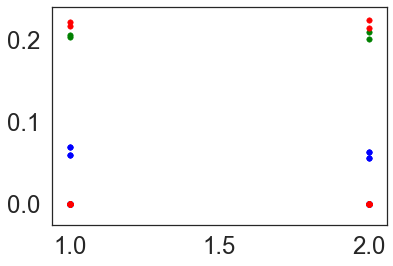

In [340]:
plt.scatter([1]*15,np.transpose(np.percentile(selectivities_slow[1],70,axis=2))[159,:],color='b',s=30)
plt.scatter([2]*15,np.transpose(np.percentile(selectivities_slow[1],70,axis=2))[259,:],color='b',s=30)
plt.scatter([3]*15,np.transpose(np.percentile(selectivities_slow[1],70,axis=2))[359,:],color='b',s=30)
plt.scatter([4]*15,np.transpose(np.percentile(selectivities_slow[1],70,axis=2))[459,:],color='b',s=30)

plt.scatter([1]*15,np.transpose(np.percentile(selectivities_mix[1],70,axis=2))[159,:],color='g',s=30)
plt.scatter([2]*15,np.transpose(np.percentile(selectivities_mix[1],70,axis=2))[259,:],color='g',s=30)
plt.scatter([3]*15,np.transpose(np.percentile(selectivities_mix[1],70,axis=2))[359,:],color='g',s=30)
plt.scatter([4]*15,np.transpose(np.percentile(selectivities_mix[1],70,axis=2))[459,:],color='g',s=30)

plt.scatter([1]*15,np.transpose(np.percentile(selectivities_fast[1],70,axis=2))[159,:],color='r',s=30)
plt.scatter([2]*15,np.transpose(np.percentile(selectivities_fast[1],70,axis=2))[259,:],color='r',s=30)
plt.scatter([3]*15,np.transpose(np.percentile(selectivities_fast[1],70,axis=2))[359,:],color='r',s=30)
plt.scatter([4]*15,np.transpose(np.percentile(selectivities_fast[1],70,axis=2))[459,:],color='r',s=30)
plt.show()


In [245]:
#res_slow = py_scripts_yann.load_pickle('/home/ysweeney/CNL-brain1/data/topdown_learning/diverse_rates_net_runs/144/broad_tuning_scaling_rate_2e-5_Wmax_scale_5_8_orientatations_8_stimuli_48N_slow_p1_ind_OU_15_8nets_pairs_switch_500k_0.pkl')
#res_mix = py_scripts_yann.load_pickle('/home/ysweeney/CNL-brain1/data/topdown_learning/diverse_rates_net_runs/145/broad_tuning_scaling_rate_2e-5_Wmax_scale_5_8_orientatations_8_stimuli_48N_mix_p1_p5_ind_OU_15_8nets_pairs_switch_500k_1.pkl')
#res_fast = py_scripts_yann.load_pickle('/home/ysweeney/CNL-brain1/data/topdown_learning/diverse_rates_net_runs/146/broad_tuning_scaling_rate_2e-5_Wmax_scale_5_8_orientatations_8_stimuli_48N_fast_p1_p5_ind_OU_15_8nets_pairs_switch_500k_2.pkl')

#res_mix = py_scripts_yann.load_pickle('/home/ysweeney/CNL-brain1/data/topdown_learning/diverse_rates_net_runs/136/broad_tuning_scaling_rate_2e-5_Wmax_scale_5_8_orientatations_8_stimuli_48N_mix_p1_ind_OU_15_8nets_reward_exp_iter_500k_0.pkl')
#res_slow = py_scripts_yann.load_pickle('/home/ysweeney/CNL-brain1/data/topdown_learning/diverse_rates_net_runs/137/broad_tuning_scaling_rate_2e-5_Wmax_scale_5_8_orientatations_8_stimuli_48N_slow_p1_ind_OU_15_8nets_reward_exp_iter_500k_0.pkl')
#res_fast = py_scripts_yann.load_pickle('/home/ysweeney/CNL-brain1/data/topdown_learning/diverse_rates_net_runs/138/broad_tuning_scaling_rate_2e-5_Wmax_scale_5_8_orientatations_8_stimuli_48N_fast_p1_ind_OU_15_8nets_reward_exp_iter_500k_0.pkl')

res_fast = py_scripts_yann.load_pickle('/home/ysweeney/CNL-brain1/data/topdown_learning/diverse_rates_net_runs/147/broad_tuning_scaling_rate_2e-5_Wmax_scale_5_8_orientatations_8_stimuli_48N_fast_p1_p5_ind_OU_15_8nets_reward_iter_250k_0.pkl')
res_mix = py_scripts_yann.load_pickle('/home/ysweeney/CNL-brain1/data/topdown_learning/diverse_rates_net_runs/148/broad_tuning_scaling_rate_2e-5_Wmax_scale_5_8_orientatations_8_stimuli_48N_mix_p1_p5_ind_OU_15_8nets_reward_iter_250k_1.pkl')
res_slow = py_scripts_yann.load_pickle('/home/ysweeney/CNL-brain1/data/topdown_learning/diverse_rates_net_runs/149/broad_tuning_scaling_rate_2e-5_Wmax_scale_5_8_orientatations_8_stimuli_48N_slow_p1_p5_ind_OU_15_8nets_reward_iter_250k_1.pkl')

In [250]:
run_single_neuron_associative_learning.make_W_evolution_animation(res_slow[0]['weights_rec'],'/home/ysweeney/Desktop/')

(array([[-0.16666667, -0.16666667, -0.16666667, ..., -0.16666667,
         -0.16666667, -0.16666667],
        [-0.16666667, -0.16666667, -0.16666667, ..., -0.16666667,
         -0.16666667, -0.16666667],
        [-0.16666667, -0.16666667, -0.16666667, ..., -0.16666667,
         -0.16666667, -0.16666667],
        ..., 
        [ 0.98049188,  0.99887518,  0.95256151, ...,  0.87630256,
          0.85347209,  0.97284998],
        [ 0.92136423,  1.01182215,  0.9901537 , ...,  0.96273024,
          0.90383206,  0.93537608],
        [ 0.92119159,  0.87698208,  0.92541434, ...,  0.9400468 ,
          0.87947587,  0.93932173]]),
 array([[ 0.        ,  0.        ,  0.        , ...,  0.125     ,
          0.125     ,  0.125     ],
        [ 0.        ,  0.        ,  0.        , ...,  0.125     ,
          0.125     ,  0.125     ],
        [ 0.        ,  0.        ,  0.        , ...,  0.125     ,
          0.125     ,  0.125     ],
        ..., 
        [ 0.06388611,  0.09137469,  0.11401209, ...,

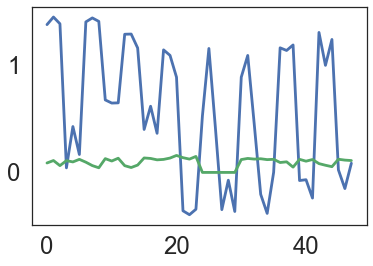

In [276]:
plt.plot(run_single_neuron_associative_learning.get_selectivity(res_mix[0]['weights_rec'][250].reshape((48,48)),8,3)[0])
plt.plot(run_single_neuron_associative_learning.get_selectivity(res_mix[0]['weights_rec'][290].reshape((48,48)),8,4)[1])
plt.show()

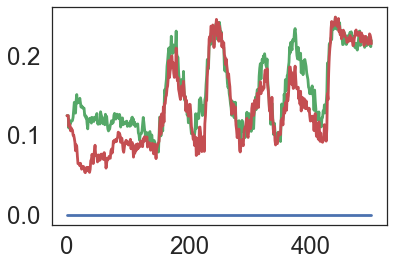

In [328]:
sel_t1 = [] 
sel_t2 = []
sel_t3 = []

for t_idx in xrange(500):
    sel_t1.append(run_single_neuron_associative_learning.get_selectivity(res_fast[0]['weights_rec'][t_idx].reshape((48,48)),8,)[1][2])
    sel_t2.append(run_single_neuron_associative_learning.get_selectivity(res_fast[0]['weights_rec'][t_idx].reshape((48,48)),8,1)[1][3])
    sel_t3.append(run_single_neuron_associative_learning.get_selectivity(res_fast[0]['weights_rec'][t_idx].reshape((48,48)),8,1)[1][5])

plt.plot(sel_t1)
plt.plot(sel_t2)
plt.plot(sel_t3)
plt.show()

In [326]:
np.where(res_fast[0]['sim_pars']['phi_rec']==res_fast[0]['presented_reward'][(int(390)*100)])[0][0]/8

2

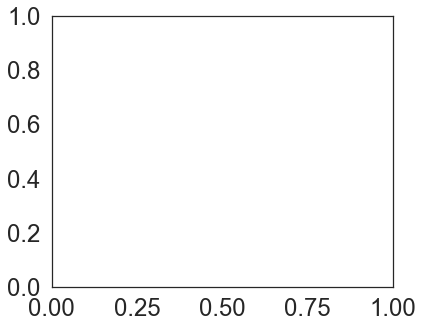

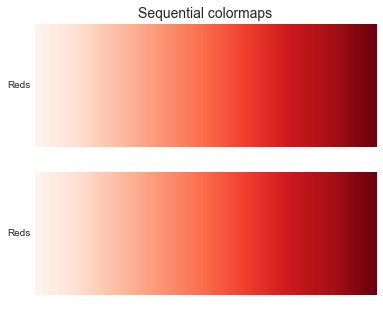

In [398]:
import numpy as np
import matplotlib.pyplot as plt


cmaps = [('Sequential',     ['Reds','Reds']),
]


nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

def plot_color_gradients(cmap_category, cmap_list):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()

for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list)

plt.show()

In [8]:
res = pd.read_pickle('/home/ysweeney/CNL-brain3/data/topdown_learning/ABI_data/analysis/'+str(501729039)+'_preserved_pc.pkl')    


In [88]:
sum(Ncells_exp)

15281